# set up

In [ ]:
# set up and import libraries--------------------------------
library(dplyr)
library(igraph)
library(ggplot2)
library(org.Mm.eg.db)
library(clusterProfiler)
library(data.table)
library(RColorBrewer)
library(xlsx)
# par(family = "sans")
# source('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/scripts/function/gsea.R')
# source('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/scripts/function/utils.R')
# source('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/scripts/function/unpairedtTest.R')



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:igraph’:

    normalize, path, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, c

In [1]:
sample <- "TexTerm"
# sample <- "TRM"

In [2]:
maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)
getwd()
source('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/scripts/function/gsea.R')
source('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/scripts/function/utils.R')
source('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/scripts/function/unpairedtTest.R')
func <- 'shrinkage'

[1] "/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/TexTerm"

In [3]:
# read copula output-------------------------
tag <- 'subset_TFs_v2'
out.npn <- readRDS(paste0('result_copula_',func,'_',tag,'.rds'))
# read TF names
# df.TF <- read.csv('TF_corr.csv', row.names = 1)
# df.TF <- read.csv('TF_corr_subset.csv', row.names = 1)
df.TF <- read.csv(paste0("TF_corr_",tag,".csv"), row.names = 1)

In [28]:
# df.TF['Klf6','Hic1']
# df.TF['Irf2','Hic1']
df.TF['Klf6','Prdm1']
df.TF['Smad4','Prdm1']


# str(out.npn)
# m['Klf6','Hic1']
# m['Hic1','Klf6']
# out.npn$icov[19]
# df.TF[,'Hic1']

[1] 0.2145882

[1] 0.2149371

In [44]:
out.npn$sparsity

[1] 0.0000000 0.1317786 0.2465019 0.2768535 0.2772363 0.2676645 0.2559346
 [8] 0.2457710 0.2338322 0.2233206 0.2129133 0.2010442 0.1919944 0.1848242
[15] 0.1769579 0.1692656 0.1644274 0.1609467 0.1571180 0.1563174 0.1577097
[22] 0.1613992 0.1668639 0.1708667 0.1804038 0.1899408 0.2028890 0.2144796
[29] 0.2288897 0.2465367

In [104]:
# select precision matrix based on sparsity
sparsity = 0.15

idx = which(out.npn$sparsity>=sparsity & out.npn$sparsity<=sparsity+0.01)[1]
print(idx)
print(paste0("lambda: ", out.npn$lambda[idx]))
print(paste0("sparsity: ", out.npn$sparsity[idx]))                       
m = out.npn$icov[[idx]]
rownames(m) <- rownames(df.TF)
colnames(m) <- colnames(df.TF)
head(m[,1:10])

[1] 19
[1] "lambda: 0.0572582995483069"
[1] "sparsity: 0.157117995127045"


Ahr         Arid3a     Arnt       Arntl      Atf1        Atf2       
Ahr     3.12263097 0.01439882 -0.0456422  0.0000000 -0.12338835  0.00000000
Arid3a  0.01421635 4.91569180  0.0000000  0.0000000  0.00000000  0.00000000
Arnt   -0.04572457 0.00000000  7.0673992 -0.9341928  0.00000000  0.00000000
Arntl   0.00000000 0.00000000 -0.9345756  7.2953688  0.00000000  0.00000000
Atf1   -0.12342368 0.00000000  0.0000000  0.0000000  5.76696473 -0.03115523
Atf2    0.00000000 0.00000000  0.0000000  0.0000000 -0.03090581  5.59251743
       Atf7       Batf Bbx        Bcl6
Ahr     0.0000000 0     0.0000000 0   
Arid3a  0.0000000 0    -0.6900294 0   
Arnt    0.0000000 0     0.0000000 0   
Arntl   0.0000000 0     0.0000000 0   
Atf1   -0.5549663 0     0.0000000 0   
Atf2   -2.2086610 0     0.0000000 0

In [93]:
# ## write to file
# write.csv(m, paste0("precision_copula_",func,"_sparsity_",sparsity,"_",tag,".csv"))

In [105]:
# create correlation dataframe
df <- data.frame(row=rownames(m)[row(m)[upper.tri(m)]], 
                 col=colnames(m)[col(m)[upper.tri(m)]], 
                 corr=m[upper.tri(m)])
### remove zero entries
df <- df[df$corr!=0,]
head(df)
dim(df)
print(paste('percent of correlation score >','0',':',sum(df$corr > 0) *100 / nrow(df),"%"))
print(paste('percent of correlation score <','0',':',sum(df$corr < 0) *100 / nrow(df),"%"))

row  col    corr       
1  Ahr  Arid3a  0.01439882
2  Ahr  Arnt   -0.04564220
6  Arnt Arntl  -0.93419276
7  Ahr  Atf1   -0.12338835
15 Atf1 Atf2   -0.03115523
20 Atf1 Atf7   -0.55496631

[1] 2257    3

[1] "percent of correlation score > 0 : 13.4692069118299 %"
[1] "percent of correlation score < 0 : 86.5307930881701 %"


In [102]:
df |> dplyr::filter(row=='Klf6' | col=='Klf6') |> dplyr::filter(row=='Hic1' | col=='Hic1')
df |> dplyr::filter(row=='Klf6' | col=='Klf6') |> dplyr::filter(row=='Prdm1' | col=='Prdm1')
# df |> dplyr::filter(row=='Hic1' | col=='Hic1')

row col corr

row col corr

In [444]:
df$corr = abs(df$corr)
write.csv(df, paste0("correlation_intensity_table_copula_",func,"_sparsity_",sparsity,"_",tag,".csv"))

# generate graph

In [11]:
nodes <- read.xlsx('../../TRM_Tex_TF_list_20240121.xlsx', sheetName = sample) %>% tidyr::drop_na(TF) %>% dplyr::mutate(group=ifelse(is.na(Specificity), Important, Specificity)) %>% select(TF, group)
names(nodes) <- c('name','group')
head(nodes)
dim(nodes)

name    group  
1 Bhlhe40 TRM_Tex
2 Nr4a2   TRM_Tex
3 Snai3   TRM_Tex
4 Xbp1    TRM_Tex
5 Egr1    TRM_Tex
6 Nfil3   TRM_Tex

[1] 170   2

In [446]:
# Graph generation
g = graph_from_data_frame(df, directed=FALSE, vertices = nodes)
print(g, e=TRUE, v=TRUE)

IGRAPH 4df7110 UN-- 170 2257 -- 
+ attr: name (v/c), group (v/c), corr (e/n)
+ edges from 4df7110 (vertex names):
 [1] Ahr    --Arid3a  Ahr    --Arnt    Arnt   --Arntl   Ahr    --Atf1   
 [5] Atf2   --Atf1    Atf1   --Atf7    Atf2   --Atf7    Arid3a --Bbx    
 [9] Bhlhe40--Arnt    Bhlhe40--Arntl   Bhlhe41--Arid3a  Bhlhe41--Arnt   
[13] Bhlhe41--Arntl   Bhlhe40--Bhlhe41 Ahr    --Cbfb    Cbfb   --Atf1   
[17] Batf   --Cbfb    Cebpb  --Atf2    Ahr    --Creb1   Creb1  --Atf1   
[21] Creb1  --Atf2    Creb1  --Atf7    Bhlhe41--Creb1   Crem   --Ahr    
[25] Crem   --Atf1    Crem   --Atf2    Crem   --Atf7    Crem   --Bhlhe41
[29] Crem   --Creb1   Ctcf   --Atf1    Ctcf   --Bbx     Cebpb  --Ctcf   
+ ... omitted several edges


# community detection

In [8]:
res = 0.9

In [448]:
# Leiden clustering
set.seed(42)
clustering = cluster_leiden(g, objective_function="modularity",resolution_parameter=res)
print(clustering)
print(sizes(clustering))
print(paste0('modularity:',modularity(g, membership(clustering))))

IGRAPH clustering leiden, groups: 5, mod: NA
+ groups:
  $`1`
   [1] "Bhlhe40" "Xbp1"    "Max"     "Setbp1"  "Mxd1"    "Tigd2"   "Heyl"   
   [8] "Bhlhe41" "Tfeb"    "Usf1"    "Arnt"    "Mlx"     "Srebf1"  "Arntl"  
  [15] "Tfe3"   
  
  $`2`
   [1] "Nr4a2"   "Nfil3"   "Gfi1"    "Crem"    "Tef"     "Zbtb3"   "Homez"  
   [8] "Thrb"    "Ddit3"   "Jun"     "Irf4"    "Meox2"   "Fos"     "Isl2"   
  [15] "Prdm1"   "Nfe2l1"  "Dmrt2"   "Eomes"   "Zbtb20"  "Irf8"    "Arid3a" 
  [22] "Foxj2"   "Batf"    "Nfatc1"  "Jund"    "Cebpb"   "Vax2"    "Foxd2"  
  + ... omitted several groups/vertices
Community sizes
 1  2  3  4  5 
15 66 24 45 20 
[1] "modularity:0.372509275038383"


In [449]:
saveRDS(clustering,paste0('clustering_copula_',func,'_res',res,'_s',sparsity,'_',tag,'.rds'))
saveRDS(g, paste0("graph_",func,'_res',res,"_s",sparsity,"_",sample,"_",tag,".rds"))

In [450]:
## write clustering results
clust <- data.frame(name = names(membership(clustering)),cluster = as.numeric(membership(clustering))) %>%
        dplyr::inner_join(nodes, by = "name") %>%
        dplyr::arrange(group, cluster)
head(clust)
write.csv(clust,paste0('clustering_membership_copula_',func,'_res',res,'_s',sparsity,'_',tag,'.csv'), row.names=F)

name  cluster group       
1 Creb1 2       Housekeeping
2 Stat6 2       Housekeeping
3 Irf3  2       Housekeeping
4 Stat4 2       Housekeeping
5 Gata3 2       Housekeeping
6 Irf1  2       Housekeeping

# plot

In [20]:
sample <- 'TRM'
# sample <- 'TexTerm'

In [22]:
# set up argumants
maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)
getwd()
label_targets <- readLines(paste0('../../',sample,'_gene_annotation.txt'))
common_targets <- readLines('../../common_TFs_for_network.txt')

print("Loading graph and clustering...done")
g <- readRDS(paste0("graph_",func,'_res',res,"_s",sparsity,"_",sample,"_",tag,".rds"))
clustering <- readRDS(paste0('clustering_copula_',func,'_res',res,'_s',sparsity,'_',tag,'.rds'))

[1] "/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/TRM"

[1] "Loading graph and clustering...done"


In [23]:
# generate top degree nodes for each community
clust <- data.frame(name = names(membership(clustering)),
                    cluster = as.numeric(membership(clustering)),
                    degree=degree(g)) %>%
        dplyr::inner_join(nodes, by = "name") %>%
        dplyr::group_by(cluster) %>% slice_max(order_by=degree, n = 5) %>% pull(name) %>% 
        writeLines(paste0('top_degree_nodes_per_community_',func,'_res',res,"_s",sparsity,"_",sample,"_",tag,'.txt'))

In [24]:
# combine top degree nodes to labeled list as well
tmp <- readLines(paste0('top_degree_nodes_per_community_',func,'_res',res,"_s",sparsity,"_",sample,"_",tag,'.txt'))
label_targets <- union(label_targets, tmp)

In [25]:
# load the overall network
# print("Loading graph and clustering...done")
# g <- readRDS(paste0("graph_",func,'_res',res,"_s",sparsity,"_",tag,".rds"))
# clustering <- readRDS(paste0('clustering_copula_',func,'_res',res,'_s',sparsity,'_',tag,'.rds'))

V(g)$cluster <- clustering$membership # add community info to graph
# V(g)$group <- ifelse(V(g)$name %in% specific_TFs[[sample]],sample,"other")
V(g)$group <- ifelse(V(g)$name %in% label_targets,sample,"other")
V(g)$group2 <- ifelse(V(g)$name %in% common_targets,"common","specific")


In [26]:
cut_off <- 0.9
print(unname(quantile(E(g)$corr, cut_off)))

[1] 0.5297752


In [27]:
# generate colors based on cluster
# colors <- RColorBrewer::brewer.pal(length(clustering),"Set2") 
# colors <- RColorBrewer::brewer.pal(length(clustering),"Set2")[c(1,2,6,5,4,3)] # adjust TRM community color to align with TexTerm
colors <- RColorBrewer::brewer.pal(length(clustering),"Set2")[c(3,2,1,4,5)] # adjust TRM community color to align with TexTerm

V(g)$color <- colors[V(g)$cluster]
V(g)$color <- ifelse(V(g)$group2=='common',V(g)$color,paste0(V(g)$color,'7f')) # if unique TFs, use lighter shade

V(g)$frame.color <- "gray"

# # set node and label size based on group, highlight specific TFs
# V(g)$size <- ifelse(V(g)$group=="other",2,3)
# V(g)$label.cex <- ifelse(V(g)$group=="other",.8,1.2)

# set node and label size based on group, only show texterm-specific and common TFs
# V(g)$size <- ifelse(V(g)$group == "other",1,ifelse(V(g)$group == "TexTerm", 3, 5))
# V(g)$size <- ifelse(V(g)$group=="other",1.5,5)
# V(g)$size <- log2(degree(g))


## size is non-linearly proportional to node degree
# V(g)$size <- ifelse(degree(g)<=84,log10(degree(g)), log2(degree(g)))
# V(g)$label.cex <- ifelse(V(g)$group == "other",NA,ifelse(V(g)$group == "TexTerm", 1, 2))
# V(g)$label.cex <- ifelse(V(g)$group == "other",NA,1.5)
# V(g)$label.cex <- ifelse(V(g)$group == "other",NA,ifelse(V(g)$group == sample, 1, 2))

# # generate network for part of the nodes 
# V(g)$label <- ifelse(V(g)$group == "other",NA,V(g)$name)

# generate label for all nodes
V(g)$label <- V(g)$name

V(g)$label.color <- 'black'
V(g)$size <- 0.3*degree(g)
# V(g)$label.cex <- 0.75 # part label
V(g)$label.cex <- 0.5 # all label

# set distance of label
V(g)$label.dist <- 0.4

# set edge color
E(g)$color <- "gray80"
# E(g)$size <- 0.1
E(g)$width <- 1.5*E(g)$corr
E(g)$lty <- ifelse(E(g)$corr>=unname(quantile(E(g)$corr, cut_off)), 1, 0) # only show top edges

# # only show edges that between labeled TFs
# # lty=0 means that the edge won't be shown, default is 1
# E(g)$lty <- unlist(lapply(E(g), function(x) {
#     ifelse(V(g)$group[V(g)$name == ends(g, x)[1]] == "other" | V(g)$group[V(g)$name == ends(g, x)[2]] == "other", 0, 1)
# }))

# set the within-module edges to some large weight, and the between module edges to some small weight
# and then choose 'layout_with_fr' to make the grouped layout 
edge.weights <- function(community, network, weight.within = 10, weight.between = 1) {
    bridges <- crossing(communities = community, graph = network)
    weights <- ifelse(test = bridges, yes = weight.between, no = weight.within)
    return(weights) 
}
E(g)$weight <- edge.weights(clustering, g)

In [28]:
# set.seed(18)  # TexTerm 
set.seed(9)  # TRM 
# pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_",sample,"_total_network_reduced_edges.pdf"), width = 8, height = 8)
# pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_",sample,"_",tag,"_top_degree.pdf"), width = 8, height = 8)
pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_",sample,"_",tag,"_top_degree_all_labeled.pdf"), width = 8, height = 8)

plot(g, layout=layout_with_fr)
dev.off()

png 
  2

In [663]:
saveRDS(g, paste0("graph_",func,'_res',res,"_s",sparsity,"_",sample,"_",tag,".rds"))

# single TF's neighborhood

In [5]:
get_individual_TF_neighborhood <- function(id, g){
    idx = as.numeric(V(g)[id])
    g1 <- induced_subgraph(g, c(id, names(neighbors(g, idx))))
    print(id)
    print(g1)
    writeLines(names(neighbors(g,idx)),paste0(id,'_neighbors_',func,'_res',res,"_s",sparsity,"_",sample,"_",tag,'.txt'))
}

get_common_neighbors <- function(id){

    # load TexTerm network
    sample <- 'TexTerm'
    maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
    setwd(maindir)
    g <- readRDS(paste0("graph_",func,'_res',res,"_s",sparsity,"_",sample,"_",tag,".rds"))
    get_individual_TF_neighborhood(id, g)
    
    # load TRM network
    sample <- 'TRM'
    maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
    setwd(maindir)
    g <- readRDS(paste0("graph_",func,'_res',res,"_s",sparsity,"_",sample,"_",tag,".rds"))
    clustering <- readRDS(paste0('clustering_copula_',func,'_res',res,'_s',sparsity,'_',tag,'.rds'))
    get_individual_TF_neighborhood(id, g)

    idir <- '/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/'
    f1 <- paste0(idir,'TRM/',id,'_neighbors_',func,'_res',res,'_s',sparsity,"_TRM_",tag,'.txt')
    f2 <- paste0(idir,'TexTerm/',id,'_neighbors_',func,'_res',res,'_s',sparsity,"_TexTerm_",tag,'.txt')
    of <- paste0(idir,'compare/',id,'_neighbors_in_common_',func,'_res',res,'_s',sparsity,"_",tag,'.txt')    
    writeLines(intersect(readLines(f1),readLines(f2)), of)
}

In [615]:
lapply(c('Hic1', 'Gfi1', 'Prdm1'), get_common_neighbors)

[1] "Hic1"
IGRAPH dc9a835 UNW- 22 102 -- 
+ attr: name (v/c), group (v/c), cluster (v/n), group2 (v/c), color
| (v/c), frame.color (v/c), label (v/c), label.color (v/c), size (v/n),
| label.cex (v/n), label.dist (v/n), corr (e/n), color (e/c), width
| (e/n), lty (e/n), weight (e/n)
+ edges from dc9a835 (vertex names):
 [1] Snai3 --Hic1   Tigd2 --Hic1   Snai3 --Zfp768 Tigd2 --Zfp768 Hic1  --Zfp768
 [6] Hic1  --Smad4  Zfp768--Smad4  Tigd2 --Prdm16 Hic1  --Prdm16 Zfp768--Prdm16
[11] Tigd2 --Prdm4  Hic1  --Prdm4  Zfp768--Prdm4  Smad4 --Prdm4  Tigd2 --Zfp324
[16] Hic1  --Zfp324 Zfp768--Zfp324 Smad4 --Zfp324 Prdm4 --Zfp324 Tigd2 --Sp110 
[21] Hic1  --Sp110  Prdm16--Sp110  Zfp324--Sp110  Hic1  --Elf2   Prdm4 --Elf2  
+ ... omitted several edges
[1] "Hic1"
IGRAPH 128e2ef UNW- 24 112 -- 
+ attr: name (v/c), group (v/c), cluster (v/n), group2 (v/c), color
| (v/c), frame.color (v/c), label (v/c), label.color (v/c), size (v/n),
| label.cex (v/n), label.dist (v/n), corr (e/n), color (e/c), width
| 

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

In [10]:
# load TexTerm network
sample <- 'TexTerm'
maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)
g <- readRDS(paste0("graph_",func,'_res',res,"_s",sparsity,"_",sample,"_",tag,".rds"))
clustering <- readRDS(paste0('clustering_copula_',func,'_res',res,'_s',sparsity,'_',tag,'.rds'))

In [946]:
# load TRM network
sample <- 'TRM'
maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)
g <- readRDS(paste0("graph_",func,'_res',res,"_s",sparsity,"_",sample,"_",tag,".rds"))
clustering <- readRDS(paste0('clustering_copula_',func,'_res',res,'_s',sparsity,'_',tag,'.rds'))

In [11]:
modify_plot_stats <- function(g2,file,id){
    # color common neighbors as purple and specific as gray
    V(g2)$label.color <- "black"

    # V(g2)$label <- V(g2)$name
#     V(g2)$frame.color <- "NA"
    V(g2)$frame.color <- "gray"
    common <- c(readLines(file),id)
    V(g2)$color <- ifelse(!V(g2)$name %in% common & !grepl('7f$',V(g2)$color),paste0(V(g2)$color,'7f'),V(g2)$color) # if common TFs, use darker shade

    # bold label if important, color if specific
    V(g2)$label <- V(g2)$name

    ## size is non-linearly proportional to node degree
    V(g2)$size <- 0.8*degree(g2)
    V(g2)$label.cex <- 0.6

    # set distance of label
    V(g2)$label.dist <- 0.5

    # set edge color
    E(g2)$color <- "gray80"
    E(g2)$width <- 4*E(g2)$corr
    E(g2)$lty <- 1
    
    edge.weights <- function(community, network, weight.within = 1, weight.between = 1) {
        bridges <- crossing(communities = community, graph = network)
        weights <- ifelse(test = bridges, yes = weight.between, no = weight.within)
        return(weights) 
    }
    E(g2)$weight <- edge.weights(clustering, g2)
    
    return(g2)
}

get_individual_TF_graph <- function(id, g){
    idx = as.numeric(V(g)[id])
    g1 <- induced_subgraph(g, c(id, names(neighbors(g, idx))))
    file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/',id,'_neighbors_in_common_',func,'_res',res,'_s',sparsity,"_",tag,'.txt')
    g2 <- modify_plot_stats(g1,file,id)
    set.seed(1)
    pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_",sample,"_",id,"_",tag,"_all_labels.pdf"), width = 5, height = 5)
    plot(g2, layout=layout_with_fr)
    dev.off()

}


In [665]:
lapply(c('Gfi1','Hic1','Prdm1'), function(x) get_individual_TF_graph(id=x, g=g))

[[1]]
png 
  2 

[[2]]
png 
  2 

[[3]]
png 
  2

In [12]:
get_individual_TF_graph(id='Gfi1', g=g)

png 
  2

# each community regulatees

In [ ]:
# first run script get_community_copula.r part 4
### further filter

# adjacency matrix

In [163]:
library(RColorBrewer)
library(pheatmap)
# sample <- 'TexTerm'
sample <- 'TRM'

maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)
# # df <- read.csv(paste0("correlation_intensity_table_copula_",func,"_sparsity_",sparsity,"_",tag,".csv"), row.names = 1)
# df <- as.matrix(abs(read.csv(paste0("precision_copula_",func,"_sparsity_",sparsity,"_",tag,".csv"), row.names = 1)))
# diag(df) <- 0

In [147]:
df

Ahr        Arid3a     Arnt      Arntl      Atf1       Atf2      
Ahr     0.00000000 0.01439882 0.0456422 0.00000000 0.12338835 0.00000000
Arid3a  0.01421635 0.00000000 0.0000000 0.00000000 0.00000000 0.00000000
Arnt    0.04572457 0.00000000 0.0000000 0.93419276 0.00000000 0.00000000
Arntl   0.00000000 0.00000000 0.9345756 0.00000000 0.00000000 0.00000000
Atf1    0.12342368 0.00000000 0.0000000 0.00000000 0.00000000 0.03115523
Atf2    0.00000000 0.00000000 0.0000000 0.00000000 0.03090581 0.00000000
Atf7    0.00000000 0.00000000 0.0000000 0.00000000 0.55505001 2.20893714
Batf    0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.00000000
Bbx     0.00000000 0.69003223 0.0000000 0.00000000 0.00000000 0.00000000
Bcl6    0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.00000000
Bhlhe40 0.00000000 0.00000000 0.7366914 0.57783716 0.00000000 0.00000000
Bhlhe41 0.00000000 0.07236004 0.5811619 0.54193397 0.00000000 0.00000000
Cbfb    0.09698102 0.00000000 0.0000000 0.00000000 0.02395434 0.00000000
Cebpb   0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.05837922
Creb1   0.06477880 0.00000000 0.0000000 0.00000000 1.81710757 0.42728161
Crem    0.07506110 0.00000000 0.0000000 0.00000000 1.37467359 1.03959205
Ctcf    0.00000000 0.00000000 0.0000000 0.00000000 0.06709779 0.00000000
Ddit3   0.00000000 0.17042336 0.0000000 0.00000000 0.00000000 0.56491471
Dmrt2   0.08441842 0.61687809 0.0000000 0.00000000 0.00000000 0.00000000
E2f1    0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.00000000
E2f3    0.01149026 0.00000000 0.0000000 0.00000000 0.00000000 0.00000000
E2f4    0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.00000000
E2f6    0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.00000000
Egr1    0.18876515 0.00000000 0.0000000 0.00000000 0.00000000 0.00000000
Egr2    0.04130947 0.00000000 0.0000000 0.00000000 0.00000000 0.00000000
Elf1    0.00000000 0.00000000 0.0254813 0.00000000 0.00000000 0.00000000
Elf2    0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.00000000
Elf4    0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.00000000
Elk1    0.03065956 0.00000000 0.0000000 0.00000000 0.00000000 0.00000000
Elk3    0.00000000 0.00000000 0.0000000 0.02270504 0.04138326 0.00000000
⋮       ⋮          ⋮          ⋮         ⋮          ⋮          ⋮         
Thrb    0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.5968056 
Tigd2   0.00000000 0.00000000 0.1377290 0.06935950 0.00000000 0.0000000 
Trp53   0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.0000000 
Usf1    0.00000000 0.00000000 0.6765244 0.89519341 0.00000000 0.0000000 
Vax2    0.00000000 0.04620431 0.0000000 0.00000000 0.00000000 0.0000000 
Xbp1    0.00000000 0.00000000 0.2789006 0.37903844 0.46773436 0.0000000 
Zbtb14  0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.0000000 
Zbtb17  0.05746913 0.00000000 0.0000000 0.00000000 0.00000000 0.0000000 
Zbtb20  0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.0000000 
Zbtb3   0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.0000000 
Zbtb49  0.22898244 0.00000000 0.0000000 0.00000000 0.00000000 0.0000000 
Zfp143  0.03912063 0.00000000 0.0000000 0.00000000 0.00000000 0.0000000 
Zfp212  0.00000000 0.00000000 0.0000000 0.00000000 0.02900077 0.0000000 
Zfp213  0.16517491 0.00000000 0.0000000 0.00000000 0.13994470 0.0000000 
Zfp260  0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.0000000 
Zfp263  0.00000000 0.00000000 0.0000000 0.00000000 0.04813026 0.0000000 
Zfp281  0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.0000000 
Zfp287  0.00000000 0.50430497 0.0000000 0.00000000 0.00000000 0.0000000 
Zfp324  0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.0000000 
Zfp335  0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.0000000 
Zfp398  0.00000000 0.00000000 0.0000000 0.00000000 0.00000000 0.0000000 
Zfp410  0.08421583 0.00000000 0.0000000 0.00000000 0.00000000 0.0000000 
Zfp422  0.00000000 0.12410373 0.0000000 0.00000000 0.00000000 0.00

In [151]:
# df2 <- read.csv(paste0("correlation_intensity_table_copula_",func,"_sparsity_",sparsity,"_",tag,".csv"), row.names = 1)
# df2

In [150]:
# range01 <- function(x){(x-min(x))/(max(x)-min(x))}
                    
     
# Data_normed <- range01(df)
# Data_normed
# # #### scale to [0,1]
# # Data_normed_2 <- scaleData(Data)
# # #### scale to [-2,2]
# # tmp <- apply(Data_normed,1:2, function(x) min(x, 2))

In [164]:
file = paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample,'/mean_',sample,'_edge_weight_',tag,'.csv')
df1 <- read.csv(file, row.names = 1)
names(df1) <- firstUp(names(df1))
res <- cor(df1, method = "pearson")
res

Ahr         Arnt       Arntl      Atf1       Atf2       Atf3      
Ahr     1.00000000  0.1549962  0.10362676 0.10561611 0.10130588 0.09726904
Arnt    0.15499615  1.0000000  0.80977891 0.18813579 0.19390997 0.18805449
Arntl   0.10362676  0.8097789  1.00000000 0.17689826 0.16194779 0.16532372
Atf1    0.10561611  0.1881358  0.17689826 1.00000000 0.60300013 0.42666034
Atf2    0.10130588  0.1939100  0.16194779 0.60300013 1.00000000 0.39410933
Atf3    0.09726904  0.1880545  0.16532372 0.42666034 0.39410933 1.00000000
Atf4    0.05107274  0.1170443  0.09470138 0.16487046 0.14964211 0.18515936
Atf7    0.10252537  0.1937894  0.16774411 0.65346162 0.95131773 0.41569670
Batf    0.07973799  0.1565592  0.14215672 0.14032555 0.17390703 0.54884458
Bbx     0.08504802  0.1642756  0.15231399 0.15338462 0.17517993 0.22598415
Bcl6    0.11487364  0.2220834  0.18270896 0.20339835 0.21379856 0.23615062
Bhlhe40 0.05809430  0.6440413  0.68110748 0.12536056 0.11875487 0.13584710
Cbfb    0.04821505  0.1491350  0.12089449 0.12020090 0.13852237 0.17631494
Cdx1    0.03457576  0.0719350  0.06642914 0.08216697 0.08617108 0.13492406
Creb1   0.08851250  0.2021832  0.18079135 0.78161560 0.73548433 0.42999171
Crem    0.09571473  0.1823491  0.16758546 0.66847085 0.71914921 0.44941203
Ctcf    0.08272856  0.2082172  0.15420082 0.15674105 0.18014319 0.15542519
Ddit3   0.05363004  0.1117254  0.09990168 0.11356599 0.18543018 0.16946767
E2f1    0.17016328  0.3375732  0.30684252 0.30197284 0.25068999 0.26967514
E2f3    0.14957183  0.2809196  0.24596094 0.24642051 0.21708016 0.21196643
E2f4    0.16576637  0.3314699  0.29480746 0.29444496 0.24512705 0.22820263
Egr1    0.17963610  0.3119188  0.29695775 0.29766466 0.25276318 0.29950283
Egr2    0.18033169  0.3086960  0.28923621 0.28946522 0.25052593 0.30337726
Elf1    0.16706387  0.2734525  0.23520344 0.25733009 0.22289753 0.24441699
Elf2    0.13809991  0.2757046  0.22958223 0.22870767 0.21579906 0.23068301
Elf4    0.12071757  0.2259215  0.19774691 0.19954728 0.17278751 0.16772084
Elk1    0.14175410  0.2692134  0.22437267 0.23227543 0.20457319 0.21552911
Elk3    0.12469428  0.2508630  0.21810671 0.20337789 0.17815905 0.17613056
Elk4    0.14771969  0.2845960  0.24680974 0.24758079 0.21928368 0.23751096
Ets1    0.13017568  0.2818956  0.24094660 0.23866779 0.23112707 0.25811938
⋮       ⋮           ⋮          ⋮          ⋮          ⋮          ⋮         
Tef     0.036195691 0.07338115 0.06084525 0.12958829 0.12093817 0.11777893
Tfdp1   0.097500407 0.20786476 0.17168378 0.19405343 0.15704701 0.16651506
Tfe3    0.115976827 0.59419743 0.79302411 0.19043967 0.16940501 0.19525174
Tgif1   0.081080168 0.16101026 0.14280696 0.13935680 0.15573446 0.20863064
Thap11  0.112708043 0.18006305 0.15738823 0.18036144 0.17646314 0.20048977
Thrb    0.043294512 0.12695011 0.11569163 0.16126039 0.17517827 0.13424780
Tigd2   0.043437391 0.04259403 0.02466571 0.05596948 0.04460172 0.06447277
Tlx2    0.009686568 0.05826057 0.03875720 0.06052936 0.04772954 0.08088356
Trp53   0.075397835 0.19228325 0.17266930 0.15432551 0.19175534 0.19926225
Usf1    0.105112828 0.66838700 0.81561506 0.18025155 0.16104993 0.17666540
Usf2    0.109458678 0.64822591 0.75395686 0.15901650 0.13693288 0.13608193
Wt1     0.192609648 0.32261899 0.28623603 0.29317122 0.26688531 0.30975476
Xbp1    0.115931853 0.28064432 0.37766617 0.30857400 0.17603023 0.32479174
Zbtb17  0.197717729 0.35479657 0.30629894 0.30782491 0.27795739 0.28833356
Zbtb3   0.055436312 0.15399242 0.12389855 0.13627851 0.14481676 0.16831633
Zfp143  0.113484871 0.19465530 0.16846543 0.16965839 0.16736195 0.16879170
Zfp212  0.074717815 0.15008069 0.12741999 0.11640482 0.14266291 0.16788122
Zfp260  0.103042956 0.21417785 0.18204920 0.19533629 0.18242425 0.17991353
Zfp263  0.085562767 0.19598451 0.15650270 0.15187817 0.16426985 0.16067586
Zfp281  0.162428949 0.32110853 0.27333873 0.26677782 0.26797316 0.24812539
Zfp287  0.046923198 0.13201762 0.12161292 0.10268822 0.13542149 0.14110611
Zfp335  0.118877482 0.21900154 0.

In [167]:
library(corrplot)
pdf(paste0("corr_",ncol(res),"TFs.pdf"))
corrplot(res, order = "hclust", tl.col = "black", col=colorRampPalette(rev(brewer.pal(n = 11, name ="RdBu")))(100),
         tl.srt = 45, addgrid.col=NA)
# corrplot.mixed(res, order = "hclust", tl.col = "black", tl.srt = 45)
# corrplot.mixed(Data_normed, tl.col = "black", tl.srt = 45, 
#                lower.col = colorRampPalette(rev(brewer.pal(n = 11, name ="RdBu")))(100),
#                upper.col = colorRampPalette(rev(brewer.pal(n = 11, name ="RdBu")))(100))
dev.off()

# corrplot.mixed(Data_normed, order = "hclust", tl.col = "black", tl.srt = 45)

png 
  2

In [547]:
for (i in dev.list()[1]:dev.list()[length(dev.list())]) {
   dev.off()
}

In [171]:
# get the hclust order first
## v1 get from pheatmap clustering
p <- pheatmap(res, clustering_distance_rows = 'correlation', clustering_distance_cols = 'correlation', clustering_method = 'average', file='hp_hclust_corr_170TFs.pdf')
colnames(res[,p$tree_col[["order"]]]) %>% writeLines(paste0('hclust_order_',ncol(res),'TFs.txt'))

## v2 get directly from corrplot function
# ord <- colnames(res)[corrMatOrder(res, order="hclust")]
# ord
# writeLines(ord, 'hclust_order_170TFs.txt')

In [179]:
meta

name    cluster
1   Setbp1  1      
2   Thrb    1      
3   Glis3   1      
4   Gmeb1   1      
5   Atf1    1      
6   Creb1   1      
7   Crem    1      
8   Atf2    1      
9   Atf7    1      
10  Xbp1    1      
11  Mxd1    1      
12  Max     1      
13  Srebf1  1      
14  Bhlhe40 1      
15  Arnt    1      
16  Usf2    1      
17  Tfe3    1      
18  Usf1    1      
19  Arntl   1      
20  Mlx     1      
21  Atf4    1      
22  Tef     1      
23  Atf3    1      
24  Isl2    2      
25  Meox2   2      
26  Hlx     2      
27  Tlx2    2      
28  Homez   2      
29  Gfi1    2      
30  Stat4   2      
⋮   ⋮       ⋮      
130 Klf6    4      
131 Klf4    4      
132 Klf5    4      
133 Zfx     4      
134 Zfp566  4      
135 Sp1     4      
136 Sp4     4      
137 Sp2     4      
138 Sp3     4      
139 E2f1    4      
140 E2f4    4      
141 Klf3    4      
142 Patz1   4      
143 Wt1     4      
144 Zbtb17  4      
145 Zfp281  4      
146 Zfp341  4      
147 Stat3   5      
148 Thap11  5      
149 Etv6    5      
150 Elf4    5      
151 Etv3    5      
152 Elk3    5      
153 Elk1    5      
154 Gabpa   5      
155 Elf1    5      
156 Elk4    5      
157 Fli1    5      
158 Elf2    5      
159 Ets1    5

In [178]:
# prepare annotation
ordered_tf <- readLines(paste0('hclust_order_',ncol(res),'TFs.txt'))
meta <- read.csv('clustering_membership_copula_shrinkage_res0.9_s0.15_subset_TFs_v2.csv') %>% 
        mutate(name = factor(name, levels=ordered_tf)) %>% arrange(cluster, name)
if (sample=='TRM'){
    # manually switch cluester 1 and 3
    meta <- meta %>% mutate(cluster2 = ifelse(cluster==1, 3, ifelse(cluster==3, 1, cluster))) %>% arrange(cluster2, name) %>% select(name,cluster2)
    names(meta) <- c('name', 'cluster')
}
new_order <- meta %>% pull(name) %>% as.character

res2 <- res[new_order,new_order]
res2
meta
annotation_col = data.frame(community = meta$cluster)
rownames(annotation_col) = colnames(res2)
mycolors <- list(community = RColorBrewer::brewer.pal(length(unique(meta$cluster)),"Set2"))

Setbp1        Thrb        Glis3       Gmeb1       Atf1       Creb1     
Setbp1   1.0000000000 0.006481742 0.009423459  0.02979250 0.05905772 0.04472876
Thrb     0.0064817417 1.000000000 0.074243489  0.09005731 0.16126039 0.15055681
Glis3    0.0094234593 0.074243489 1.000000000  0.04981941 0.13358967 0.11640116
Gmeb1    0.0297925013 0.090057314 0.049819410  1.00000000 0.29519391 0.16923777
Atf1     0.0590577233 0.161260390 0.133589672  0.29519391 1.00000000 0.78161560
Creb1    0.0447287562 0.150556812 0.116401159  0.16923777 0.78161560 1.00000000
Crem     0.0359843605 0.127763291 0.101044713  0.16324450 0.66847085 0.74138292
Atf2     0.0244716320 0.175178269 0.123990768  0.12565344 0.60300013 0.73548433
Atf7     0.0219507406 0.169070818 0.124101050  0.13432991 0.65346162 0.77921985
Xbp1     0.0499886968 0.126998575 0.090943026  0.09579927 0.30857400 0.22956742
Mxd1     0.0400283676 0.085737954 0.124140956  0.12411174 0.20953993 0.19868334
Max      0.0172218752 0.090833580 0.124611380  0.09457671 0.18890243 0.18929360
Srebf1   0.0397576054 0.145459291 0.118833408  0.09393863 0.21849164 0.19565534
Bhlhe40  0.0230961277 0.085265956 0.080847701  0.06006655 0.12536056 0.14408248
Arnt     0.0184806909 0.126950112 0.127518756  0.10032134 0.18813579 0.20218321
Usf2     0.0207423753 0.101448802 0.110859417  0.07496423 0.15901650 0.15155746
Tfe3     0.0053489990 0.128104114 0.103536539  0.09155420 0.19043967 0.19466635
Usf1     0.0038126778 0.114770005 0.109983703  0.08813460 0.18025155 0.18331769
Arntl    0.0189510634 0.115691634 0.109869291  0.09079074 0.17689826 0.18079135
Mlx      0.0020729639 0.117365086 0.114196112  0.09054407 0.17147307 0.17457735
Atf4     0.0332087974 0.093737544 0.095942480  0.13098931 0.16487046 0.12152778
Tef      0.0234515293 0.043706690 0.040744592  0.03652722 0.12958829 0.11005755
Atf3     0.0321335267 0.134247801 0.121636616  0.16057569 0.42666034 0.42999171
Isl2     0.0222996736 0.041156279 0.056263897  0.04772437 0.07170330 0.06988670
Meox2    0.0433290604 0.050442049 0.004632578  0.04197667 0.04597516 0.04738074
Hlx     -0.0057430896 0.042276538 0.046531504  0.01830444 0.07052711 0.06219503
Tlx2     0.0009489851 0.043101884 0.034934307  0.01999357 0.06052936 0.05270213
Homez   -0.0038564272 0.009201947 0.029110808 -0.01214275 0.03306394 0.03156275
Gfi1     0.0409602879 0.054309918 0.080135016  0.03767707 0.11977852 0.09609405
Stat4    0.0169094202 0.084504570 0.078823859  0.07713144 0.14803404 0.14987413
⋮       ⋮             ⋮           ⋮           ⋮           ⋮          ⋮         
Klf6    0.06286317    0.15979100  0.15596728  0.16539313  0.3073285  0.2952672 
Klf4    0.05727372    0.16404862  0.14532102  0.16930832  0.2957929  0.2924225 
Klf5    0.05609399    0.15422920  0.14869939  0.16525990  0.2975452  0.2928464 
Zfx     0.04285492    0.14819678  0.13450423  0.15047137  0.2600811  0.2587711 
Zfp566  0.04611861    0.13347593  0.13634129  0.14765913  0.2655976  0.2635480 
Sp1     0.05911927    0.15251752  0.15983678  0.13612465  0.2766037  0.2686133 
Sp4     0.06231276    0.16372845  0.16422807  0.15677127  0.2913483  0.2871954 
Sp2     0.06176738    0.17129756  0.15903538  0.15214588  0.3028611  0.2968389 
Sp3     0.05676177    0.17458928  0.16260891  0.15593740  0.3072766  0.3033445 
E2f1    0.05225515    0.15963467  0.15017496  0.17606612  0.3019728  0.2986381 
E2f4    0.05059709    0.15625213  0.14945438  0.15865725  0.2944450  0.2915079 
Klf3    0.05795287    0.16790019  0.16710699  0.17054574  0.3158799  0.3088599 
Patz1   0.04371770    0.16256285  0.16928647  0.14752741  0.2980545  0.2936357 
Wt1     0.07425982    0.16396346  0.15111328  0.15652283  0.2931712  0.2814049 
Zbtb17  0.06172612    0.17211190  0.16963906  0.15856940  0.3078249  0.3017401 
Zfp281  0.04650568    0.17320176  0.17723977  0.12459916  0.2667778  0.2603501 
Zfp341  0.06164687    0.15832196  0.16009995  0.13489655  0.2890774  0.2810590 
Stat3   0.02359803    0.09198688  0.09107187  0.07601245  0.1727555  0.1836211 
Thap11  

name    cluster
1   Setbp1  1      
2   Thrb    1      
3   Glis3   1      
4   Gmeb1   1      
5   Atf1    1      
6   Creb1   1      
7   Crem    1      
8   Atf2    1      
9   Atf7    1      
10  Xbp1    1      
11  Mxd1    1      
12  Max     1      
13  Srebf1  1      
14  Bhlhe40 1      
15  Arnt    1      
16  Usf2    1      
17  Tfe3    1      
18  Usf1    1      
19  Arntl   1      
20  Mlx     1      
21  Atf4    1      
22  Tef     1      
23  Atf3    1      
24  Isl2    2      
25  Meox2   2      
26  Hlx     2      
27  Tlx2    2      
28  Homez   2      
29  Gfi1    2      
30  Stat4   2      
⋮   ⋮       ⋮      
130 Klf6    4      
131 Klf4    4      
132 Klf5    4      
133 Zfx     4      
134 Zfp566  4      
135 Sp1     4      
136 Sp4     4      
137 Sp2     4      
138 Sp3     4      
139 E2f1    4      
140 E2f4    4      
141 Klf3    4      
142 Patz1   4      
143 Wt1     4      
144 Zbtb17  4      
145 Zfp281  4      
146 Zfp341  4      
147 Stat3   5      
148 Thap11  5      
149 Etv6    5      
150 Elf4    5      
151 Etv3    5      
152 Elk3    5      
153 Elk1    5      
154 Gabpa   5      
155 Elf1    5      
156 Elk4    5      
157 Fli1    5      
158 Elf2    5      
159 Ets1    5

In [180]:
pheatmap(res2, file=paste0('hp_corr_',ncol(res),'TFs.pdf'), annotation_col = annotation_col, annotation_row = annotation_col,
         cluster_cols = F, cluster_rows = F, annotation_colors = mycolors, annotation_legend = F, 
         fontsize=3)

# regulatee x TF heatmap for each TF's neighborhood

In [13]:
get_common_neighbors <- function(id){
    idir <- '/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/'
    f1 <- paste0(idir,'TRM/',id,'_neighbors_',func,'_res',res,'_s',sparsity,"_TRM_",tag,'.txt')
    f2 <- paste0(idir,'TexTerm/',id,'_neighbors_',func,'_res',res,'_s',sparsity,"_TexTerm_",tag,'.txt')
    of <- paste0(idir,'compare/',id,'_neighbors_in_common_',func,'_res',res,'_s',sparsity,"_",tag,'.txt')
    
    writeLines(intersect(readLines(f1),readLines(f2)), of)
}

In [473]:
lapply(c('Hic1', 'Gfi1', 'Prdm1'), get_common_neighbors)

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

In [14]:
add_cols <- function(df, cols) {
  add <- cols[!cols %in% names(df)]
  if(length(add) !=0 ) df[add] <- 0
  return(df)
}

In [6]:
tag <- 'subset_TFs_v2'
file = paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/TexTerm/mean_TexTerm_edge_weight_',tag,'.csv')
df1 <- read.csv(file, row.names = 1)
names(df1) <- firstUp(names(df1))

file = paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/TRM/mean_TRM_edge_weight_',tag,'.csv')
df2 <- read.csv(file, row.names = 1)
names(df2) <- firstUp(names(df2))

# head(df1)
# dim(df1)
# head(df2)
# dim(df2)


In [15]:
file = paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/TRM/mean_TRM_edge_weight.csv')
tmp = read.csv(file, row.names=1)
dim(tmp)
head(tmp)

[1] 20228   872

A1JVI6_MOUSE AC168977.1 AHCTF1   AHR       AIRE      ALX1 ALX3
0610005C13RIK 0.00000000   0.00000000 0.000000 0.0000000 0.0000000 0    0   
0610007P14RIK 0.00000000   0.00000000 0.000000 0.0000000 0.0000000 0    0   
0610009B22RIK 0.06737947   0.00000000 0.000000 0.4264933 0.0000000 0    0   
0610009E02RIK 0.00000000   0.00000000 0.000000 0.0000000 0.0000000 0    0   
0610009L18RIK 0.00000000   0.00000000 0.000000 0.0000000 0.0000000 0    0   
0610009O20RIK 0.00000000   0.04936585 2.797383 0.0000000 0.2216296 0    0   
              ALX4      AR        ARID2    ⋯ ZKSCAN6  ZSCAN10   ZSCAN20 
0610005C13RIK 0.0000000 0.0000000 0.000000 ⋯ 2.109688 0.0000000 0.000000
0610007P14RIK 0.0000000 0.5428672 2.030191 ⋯ 1.914221 0.3028223 0.000000
0610009B22RIK 0.0000000 0.5546615 0.000000 ⋯ 2.128467 0.0000000 0.000000
0610009E02RIK 0.0000000 0.0000000 0.000000 ⋯ 0.000000 0.2915476 0.000000
0610009L18RIK 0.1827567 0.4275434 0.000000 ⋯ 2.487413 0.2690590 0.000000
0610009O20RIK 0.0000000 0.3785649 0.000000 ⋯ 0.000000 0.2197646 1.018072
              ZSCAN26 ZSCAN29 ZSCAN4B   ZSCAN4C   ZSCAN4D   ZSCAN4F   ZZZ3    
0610005C13RIK 0       0       0.0000000 0.0000000 0.0000000 0.0000000 0.000000
0610007P14RIK 0       0       0.2033138 0.2033138 0.2417812 0.2417812 0.000000
0610009B22RIK 0       0       0.0000000 0.0000000 0.0000000 0.0000000 0.000000
0610009E02RIK 0       0       0.0000000 0.0000000 0.0000000 0.0000000 0.000000
0610009L18RIK 0       0       0.2300000 0.2300000 0.2735165 0.2735165 2.413667
0610009O20RIK 0       0       0.2813610 0.2813610 0.3345952 0.3345952 0.000000

In [695]:
# make sure the order is not messed up
common_genes = union(rownames(df1), rownames(df2))
union_tfs = union(names(df1), names(df2))
length(common_genes)
length(union_tfs)
# # generate random number, it's easier for future clustering
# d1  <- as.data.frame(matrix(rnorm(length(union_tfs)*length(common_genes), mean=1e-5, sd=1e-6), ncol = length(union_tfs), nrow = length(common_genes), dimnames = list(common_genes, union_tfs)))
# just use 0 if no regulatory relationship
d1  <- as.data.frame(matrix(0, ncol = length(union_tfs), nrow = length(common_genes), dimnames = list(common_genes, union_tfs)))
d1[rownames(d1) %in% rownames(df1),names(d1)%in%names(df1)] <- df1
d1 <- d1[order(rownames(d1)), order(names(d1))]
dim(d1)
head(d1)
tail(d1)

[1] 21585

[1] 198

[1] 21585   198

Ahr Arid3a   Arnt     Arntl    Atf1     Atf2      Atf3 Atf4
0610005C13RIK 0   0.000000 0.000000 0.000000 0.000000  0.000000 0    0   
0610007P14RIK 0   0.000000 0.000000 0.000000 0.000000  8.047992 0    0   
0610009B22RIK 0   0.000000 8.034914 7.755197 7.727369 10.154226 0    0   
0610009E02RIK 0   0.000000 0.000000 0.000000 0.000000  0.000000 0    0   
0610009L18RIK 0   3.535508 8.272055 7.792067 6.186838 12.953496 0    0   
0610009O20RIK 0   2.829764 5.850666 8.250112 5.537141  0.000000 0    0   
              Atf7     Batf     ⋯ Zfp410   Zfp422   Zfp523   Zfp566   Zfp64   
0610005C13RIK 0.000000  0.00000 ⋯ 0.000000 0.000000 0.000000 0.000000 0.000000
0610007P14RIK 4.191211  0.00000 ⋯ 0.000000 0.000000 0.000000 1.574840 0.000000
0610009B22RIK 8.928981 12.02092 ⋯ 4.137407 0.000000 0.000000 0.000000 3.394022
0610009E02RIK 0.000000  0.00000 ⋯ 0.000000 0.000000 0.000000 1.290968 0.000000
0610009L18RIK 6.772344  0.00000 ⋯ 0.000000 3.253367 3.565556 3.087408 7.315779
0610009O20RIK 2.676284 12.32866 ⋯ 0.000000 5.454378 3.319773 1.565702 5.091314
              Zfp692 Zfp740   Zfp768    Zfx       Zscan20
0610005C13RIK 0       0.00000 0.0000000  0.000000 0      
0610007P14RIK 0       0.00000 0.4862167  5.250953 0      
0610009B22RIK 0      18.51342 0.0000000 10.211687 0      
0610009E02RIK 0       0.00000 0.0000000  0.000000 0      
0610009L18RIK 0      16.97179 0.3849736 13.320289 0      
0610009O20RIK 0       0.00000 0.4923388  8.054818 0

Ahr      Arid3a Arnt      Arntl    Atf1 Atf2     Atf3 Atf4 Atf7     Batf
ZXDC   0.000000 0       0.000000 0.000000 0    7.071718 0    0    3.362527 0   
ZYG11A 0.000000 0       0.000000 0.000000 0    0.000000 0    0    0.000000 0   
ZYG11B 0.000000 0       0.000000 0.000000 0    0.000000 0    0    0.000000 0   
ZYX    0.000000 0       0.000000 0.000000 0    0.000000 0    0    0.000000 0   
ZZEF1  0.000000 0       5.850651 0.000000 0    0.000000 0    0    0.000000 0   
ZZZ3   1.523123 0      10.152624 8.366389 0    0.000000 0    0    0.000000 0   
       ⋯ Zfp410 Zfp422 Zfp523   Zfp566   Zfp64    Zfp692 Zfp740   Zfp768   
ZXDC   ⋯ 0      0      0.000000 1.580703 4.003153 0      0.000000 0.0000000
ZYG11A ⋯ 0      0      0.000000 0.000000 0.000000 0      0.000000 0.0000000
ZYG11B ⋯ 0      0      0.000000 0.000000 4.246906 0      6.444615 0.0000000
ZYX    ⋯ 0      0      0.000000 1.940840 4.964722 0      0.000000 0.0000000
ZZEF1  ⋯ 0      0      3.647195 1.717759 4.644601 0      6.271880 0.0000000
ZZZ3   ⋯ 0      0      3.075769 2.305339 2.874990 0      7.730023 0.4435935
       Zfx       Zscan20 
ZXDC    3.647751 2.744414
ZYG11A  0.000000 0.000000
ZYG11B  5.336159 2.137334
ZYX     7.370010 0.000000
ZZEF1  10.342703 0.000000
ZZZ3   12.996193 1.914147

In [696]:
# make sure the order is not messed up
common_genes = union(rownames(df2), rownames(df1))
union_tfs = union(names(df2), names(df1))
length(common_genes)
length(union_tfs)
# # generate random number, it's easier for future clustering
# d2  <- as.data.frame(matrix(rnorm(length(union_tfs)*length(common_genes), mean=1e-5, sd=1e-6), ncol = length(union_tfs), nrow = length(common_genes), dimnames = list(common_genes, union_tfs)))
d2 <- as.data.frame(matrix(0, ncol = length(union_tfs), nrow = length(common_genes), dimnames = list(common_genes, union_tfs)))
d2[rownames(d2) %in% rownames(df2),names(d2)%in%names(df2)] <- df2
d12 <- d2[order(rownames(d2)), order(names(d2))]
dim(d2)
head(d2)
tail(d2)

[1] 21585

[1] 198

[1] 21585   198

Ahr       Arnt     Arntl    Atf1     Atf2     Atf3     Atf4    
0610005C13RIK 0.0000000 5.975511 6.381163 5.022280 6.747390 1.266362 0.000000
0610007P14RIK 0.0000000 4.167121 3.535061 4.735810 4.749356 1.189874 0.000000
0610009B22RIK 0.4264933 5.945785 5.635031 7.543411 9.927795 1.321914 8.794489
0610009E02RIK 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
0610009L18RIK 0.0000000 6.158894 5.560441 6.085988 9.713248 1.449755 0.000000
0610009O20RIK 0.0000000 4.338419 5.924785 5.442499 0.000000 2.146178 0.000000
              Atf7      Batf      Bbx      ⋯ Vax2 Zbtb14 Zbtb20 Zbtb49 Zfp213
0610005C13RIK  6.724229  0.000000 2.389105 ⋯ 0    0      0      0      0     
0610007P14RIK  4.766010 11.851958 0.000000 ⋯ 0    0      0      0      0     
0610009B22RIK 10.223460  6.968299 2.749225 ⋯ 0    0      0      0      0     
0610009E02RIK  0.000000  0.000000 0.000000 ⋯ 0    0      0      0      0     
0610009L18RIK  9.118931  9.105332 2.900007 ⋯ 0    0      0      0      0     
0610009O20RIK  0.000000  8.901524 2.389150 ⋯ 0    0      0      0      0     
              Zfp324 Zfp410 Zfp523 Zfp768 Zscan20
0610005C13RIK 0      0      0      0      0      
0610007P14RIK 0      0      0      0      0      
0610009B22RIK 0      0      0      0      0      
0610009E02RIK 0      0      0      0      0      
0610009L18RIK 0      0      0      0      0      
0610009O20RIK 0      0      0      0      0

Ahr Arnt Arntl Atf1 Atf2 Atf3 Atf4 Atf7 Batf Bbx ⋯ Vax2 Zbtb14 Zbtb20
ZFP354A 0   0    0     0    0    0    0    0    0    0   ⋯ 0    0      0     
ZFP36L3 0   0    0     0    0    0    0    0    0    0   ⋯ 0    0      0     
ZFP572  0   0    0     0    0    0    0    0    0    0   ⋯ 0    0      0     
ZFP873  0   0    0     0    0    0    0    0    0    0   ⋯ 0    0      0     
ZFP931  0   0    0     0    0    0    0    0    0    0   ⋯ 0    0      0     
ZFP937  0   0    0     0    0    0    0    0    0    0   ⋯ 0    0      0     
        Zbtb49 Zfp213 Zfp324 Zfp410 Zfp523 Zfp768 Zscan20
ZFP354A 0      0      0      0      0      0      0      
ZFP36L3 0      0      0      0      0      0      0      
ZFP572  0      0      0      0      0      0      0      
ZFP873  0      0      0      0      0      0      0      
ZFP931  0      0      0      0      0      0      0      
ZFP937  0      0      0      0      0      0      0

In [697]:
d2[,'Zscan20']

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1009] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1045] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1117] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1261] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1369] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1405] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [18

In [698]:
d1[,'Zscan20']

[1] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
    [8] 0.0000000 0.0000000 0.0000000 0.0000000 2.4866756 0.0000000 2.1373340
   [15] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
   [22] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
   [29] 2.1649885 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
   [36] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 2.1649869 0.0000000
   [43] 0.0000000 0.0000000 1.6824394 0.0000000 0.0000000 2.1649960 0.0000000
   [50] 2.1649960 0.0000000 0.0000000 2.2563380 0.0000000 0.0000000 0.0000000
   [57] 0.0000000 2.1613863 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
   [64] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
   [71] 0.0000000 2.1246145 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
   [78] 0.0000000 0.0000000 0.0000000 2.1496696 0.8941433 0.0000000 0.0000000
   [85] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
   [92] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
   [99] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 2.1059088 0.0000000
  [106] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 2.1649777 0.0000000
  [113] 0.0000000 0.0000000 1.8342448 0.0000000 2.8117147 0.0000000 0.0000000
  [120] 0.0000000 0.0000000 0.0000000 0.0000000 2.1649005 0.0000000 2.1649957
  [127] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [134] 0.0000000 0.0000000 1.8105424 0.0000000 0.0000000 0.0000000 0.0000000
  [141] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [148] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [155] 0.0000000 2.1544533 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [162] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [169] 3.5074750 0.0000000 0.0000000 2.0307365 0.0000000 0.0000000 0.0000000
  [176] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [183] 0.0000000 0.0000000 2.1649960 0.0000000 0.0000000 0.0000000 0.0000000
  [190] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [197] 0.0000000 2.0436929 0.0000000 0.0000000 2.1626834 0.0000000 1.7695276
  [204] 0.0000000 0.0000000 1.8721912 0.0000000 0.0000000 0.0000000 0.0000000
  [211] 2.3633200 0.0000000 0.0000000 1.8346923 1.8523593 0.0000000 0.0000000
  [218] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [225] 0.0000000 4.0919415 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [232] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [239] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 3.5073004 0.0000000
  [246] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [253] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [260] 0.0000000 0.0000000 0.0000000 0.0000000 2.1649960 0.0000000 0.0000000
  [267] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [274] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [281] 0.0000000 0.9160717 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [288] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [295] 0.0000000 0.0000000 2.1649960 0.0000000 0.0000000 3.2050724 0.0000000
  [302] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [309] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [316] 2.1126003 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [323] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 1.4173801 1.8060258
  [330] 2.1649960 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [337] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 2.1649960
  [344] 0.0000000 0.0000000 0.0000000 0.0000000 3.5074751 0.0000000 0.0000000
  [351] 0.0000000 0.0000000 0.0000000 0.0000000 2.1639744 0.0000000 0.0000000
  [358] 3.3447040 0.000000

In [184]:
# sum(df2['Atf3'])
head(df1)
head(df2)

Ahr Arid3a   Arnt     Arntl    Atf1     Atf2      Atf7    
0610007P14RIK 0   0.000000 0.000000 0.000000 0.000000  8.047992 4.191211
0610009B22RIK 0   0.000000 8.034914 7.755197 7.727369 10.154226 8.928981
0610009E02RIK 0   0.000000 0.000000 0.000000 0.000000  0.000000 0.000000
0610009L18RIK 0   3.535508 8.272055 7.792067 6.186838 12.953496 6.772344
0610009O20RIK 0   2.829764 5.850666 8.250112 5.537141  0.000000 2.676284
0610010F05RIK 0   2.764324 3.549189 0.000000 6.128912 10.019813 5.624563
              Batf     Bbx      Bcl6     ⋯ Rel Relb Snai1 Tcf7 Tgif1 Tlx2 Usf2
0610007P14RIK  0.00000 4.224679 2.284394 ⋯ 0   0    0     0    0     0    0   
0610009B22RIK 12.02092 4.218905 2.004101 ⋯ 0   0    0     0    0     0    0   
0610009E02RIK  0.00000 0.000000 2.514115 ⋯ 0   0    0     0    0     0    0   
0610009L18RIK  0.00000 4.229038 0.000000 ⋯ 0   0    0     0    0     0    0   
0610009O20RIK 12.32866 4.228595 3.228577 ⋯ 0   0    0     0    0     0    0   
0610010F05RIK  0.00000 5.424690 3.845737 ⋯ 0   0    0     0    0     0    0   
              Wt1 Zfp341 Zfp692
0610007P14RIK 0   0      0     
0610009B22RIK 0   0      0     
0610009E02RIK 0   0      0     
0610009L18RIK 0   0      0     
0610009O20RIK 0   0      0     
0610010F05RIK 0   0      0

Ahr       Arid3a Arnt     Arntl    Atf1     Atf2     Atf7     
0610005C13RIK 0.0000000 0      5.975511 6.381163 5.022280 6.747390  6.724229
0610007P14RIK 0.0000000 0      4.167121 3.535061 4.735810 4.749356  4.766010
0610009B22RIK 0.4264933 0      5.945785 5.635031 7.543411 9.927795 10.223460
0610009E02RIK 0.0000000 0      0.000000 0.000000 0.000000 0.000000  0.000000
0610009L18RIK 0.0000000 0      6.158894 5.560441 6.085988 9.713248  9.118931
0610009O20RIK 0.0000000 0      4.338419 5.924785 5.442499 0.000000  0.000000
              Batf      Bbx      Bcl6     ⋯ Rel      Relb     Snai1    
0610005C13RIK  0.000000 2.389105 3.762576 ⋯ 0.000000 0.000000 0.6693322
0610007P14RIK 11.851958 0.000000 2.784012 ⋯ 2.648729 0.000000 0.6104451
0610009B22RIK  6.968299 2.749225 2.139850 ⋯ 0.000000 3.094237 0.0000000
0610009E02RIK  0.000000 0.000000 2.368062 ⋯ 0.000000 0.000000 0.0000000
0610009L18RIK  9.105332 2.900007 3.076770 ⋯ 3.222847 4.317777 0.7726902
0610009O20RIK  8.901524 2.389150 3.331307 ⋯ 2.670833 4.032758 0.6196597
              Tcf7     Tgif1     Tlx2      Usf2      Wt1       Zfp341  
0610005C13RIK 5.002869  0.000000 0.0000000  8.739879 0.7241013 1.770007
0610007P14RIK 0.000000  3.595946 0.1456268  3.376051 1.1954520 1.965665
0610009B22RIK 8.130250  7.846876 0.0000000  7.430792 1.3069422 2.870961
0610009E02RIK 0.000000  0.000000 0.0000000  8.693763 0.7028586 1.860930
0610009L18RIK 9.152387 12.952816 0.0000000  8.696775 1.5816000 3.361033
0610009O20RIK 3.494170 10.354723 0.0000000 10.999239 1.0941122 2.068304
              Zfp692  
0610005C13RIK 2.709812
0610007P14RIK 0.000000
0610009B22RIK 3.475728
0610009E02RIK 0.000000
0610009L18RIK 3.327339
0610009O20RIK 2.793895

In [703]:
# df_fc = log2((d1+1e-5)/(d2+1e-5))
df_fc = log2((d2+1e-5)/(d1+1e-5))
head(df_fc)

Ahr      Arnt       Arntl       Atf1        Atf2        Atf3     
0610005C13RIK  0.00000 19.1887050 19.28346202 18.93798589  19.3639722 16.950342
0610007P14RIK  0.00000 18.6686951 18.43137976 18.85325478  18.8573754 -2.757810
0610009B22RIK 15.38027 19.1815102 -0.51185839 -0.03994618   0.3614957 -2.941370
0610009E02RIK  0.00000  0.0000000  0.00000000  0.00000000   0.0000000  0.000000
0610009L18RIK  0.00000  0.8007521 -0.57304574 -0.35651400   0.6507507 -3.159451
0610009O20RIK  0.00000  0.6164859  0.01816202 -0.60014368 -19.0787844 17.711417
              Atf4     Atf7     Batf       Bbx       ⋯ Vax2      Zbtb14   
0610005C13RIK  0.00000 19.35901  0.0000000 17.866117 ⋯   0.00000   0.00000
0610007P14RIK  0.00000 18.86243  1.4996841  0.000000 ⋯   0.00000   0.00000
0610009B22RIK 19.74624 19.96345 -0.3576887 -2.128447 ⋯ -18.65837   0.00000
0610009E02RIK  0.00000  0.00000  0.0000000  0.000000 ⋯   0.00000   0.00000
0610009L18RIK  0.00000 19.79851  0.4270557 18.145702 ⋯   0.00000 -18.31158
0610009O20RIK  0.00000  0.00000  1.7338172 -2.367442 ⋯   0.00000 -19.05706
              Zbtb20    Zbtb49    Zfp213    Zfp324 Zfp410    Zfp523   
0610005C13RIK   0.00000   0.00000   0.00000 0        0.00000   0.00000
0610007P14RIK   0.00000 -17.26486   0.00000 0        0.00000 -15.56934
0610009B22RIK   0.00000   0.00000 -18.37264 0      -20.82014   0.00000
0610009E02RIK   0.00000 -16.97810   0.00000 0        0.00000   0.00000
0610009L18RIK -18.44377 -18.23604 -19.48065 0      -20.69471 -15.23251
0610009O20RIK -18.34073 -17.25646 -18.95768 0        0.00000 -15.58739
              Zfp768    Zscan20
0610005C13RIK   0.00000 0      
0610007P14RIK -19.00222 0      
0610009B22RIK -19.96179 0      
0610009E02RIK   0.00000 0      
0610009L18RIK -20.34520 0      
0610009O20RIK -19.61949 0

In [704]:
write.csv(df_fc, paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/log2FC_btw_TRM_and_TEX_mean_edge_weight_',tag,".csv"))
# write.csv(df_fc, paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,".csv"))


## heatmap of fold change

In [9]:
# df_fc <- read.csv(paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/log2FC_btw_TRM_and_TEX_mean_edge_weight_',tag,".csv"), row.names = 1)
# file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/hp_log2FC_btw_TRM_and_TEX_mean_edge_weight_',tag,"_v2.pdf")
tag <- 'subset_TFs_v2'
df_fc <- read.csv(paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,".csv"), row.names = 1)
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/hp_log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,"_v2.pdf")

In [10]:
# filter out rows and columns with only one value
df_fc = df_fc[apply(df_fc,MARGIN = 1, FUN = function(x) length(unique(x)) > 1),apply(df_fc,MARGIN = 2, FUN = function(x) length(unique(x)) > 1)]
df_fc                                                                                     

Ahr       Arid3a      Arnt         Arntl        Atf1        
0610005C13RIK   0.00000 -19.1887050 -19.28346202 -18.93798589 -19.36397217
0610007P14RIK   0.00000 -18.6686951 -18.43137976 -18.85325478 -18.85737542
0610009B22RIK -15.38027 -19.1815102   0.51185839   0.03994618  -0.36149573
0610009E02RIK   0.00000   0.0000000   0.00000000   0.00000000   0.00000000
0610009L18RIK   0.00000  -0.8007521   0.57304574   0.35651400  -0.65075071
0610009O20RIK   0.00000  -0.6164859  -0.01816202   0.60014368  19.07878436
0610010F05RIK   0.00000   0.2461823  18.43713414 -19.11057332   0.03817131
0610010K14RIK   0.00000 -19.0915286   1.09464000  -0.86751151  -0.69010284
0610011F06RIK   0.00000 -18.2406348   0.43374608   0.63962379  -0.07220163
0610012D04RIK   0.00000   0.0000000   0.00000000   0.00000000   0.00000000
0610012G03RIK   0.00000 -18.5443527   0.21877404  19.56330321 -18.56328136
0610025J13RIK   0.00000  -1.0336454 -16.83735889   0.00000000   0.00000000
0610030E20RIK   0.00000 -18.2403401   1.38035640  18.63104728   0.00000000
0610037L13RIK   0.00000   0.0000000   0.00000000   0.00000000 -18.15518048
0610038B21RIK -16.23184  -0.1807648   0.29078929  -0.52235559  -1.61223347
0610039K10RIK   0.00000  18.4327896   0.00000000 -19.56571191   0.34514329
0610040B10RIK   0.00000   0.0000000   0.00000000   0.00000000 -19.16826012
0610040F04RIK   0.00000 -18.5306762   1.55077979  -1.35493465   1.00363016
0610043K17RIK   0.00000 -18.2269605 -17.28964925   0.00000000 -17.76283252
1010001B22RIK   0.00000   0.0000000   0.00000000   0.00000000   0.00000000
1010001N08RIK   0.00000   0.0000000   0.00000000   0.00000000   0.00000000
1110001J03RIK   0.00000   0.0000000   0.00000000 -19.21513435  -0.43071380
1110002E22RIK -16.33704 -17.9507375  19.80138770  -0.13035615  19.95103844
1110002L01RIK  17.36532  18.0911553  18.96642282  19.72532450  19.05029150
1110004E09RIK   0.00000 -18.0284033   0.00000000 -18.31737269   0.00000000
1110004F10RIK   0.00000  -0.3874473  18.46217661   0.00000000  18.44564577
1110007C09RIK   0.00000   0.0000000  19.15569789 -18.16190976 -18.30755128
1110008F13RIK -17.11308 -17.9507140   0.00000000 -18.16111372   0.00000000
1110008L16RIK  18.14139   0.0000000  18.38216468   0.00000000  18.46277050
1110008P14RIK   0.00000   0.0000000   0.00000000   0.00000000   0.00000000
⋮             ⋮         ⋮           ⋮            ⋮            ⋮           
ZRANB3         0.00000  18.68673     0.00000      0.00000      0.00000    
ZRSR1          0.00000   0.00000     0.00000      0.00000      0.00000    
ZRSR2          0.00000   0.00000     0.00000      0.00000     19.39464    
ZSCAN10       17.36510  17.67344    19.31011     19.49040     18.59745    
ZSCAN12        0.00000   0.00000    19.07530     18.10380      0.00000    
ZSCAN18        0.00000   0.00000    18.99391     18.15639     19.23840    
ZSCAN2         0.00000   0.00000    19.15752      0.00000      0.00000    
ZSCAN20        0.00000   0.00000    19.15282     18.95030     18.84591    
ZSCAN21       17.28423   0.00000    18.85395     18.13966     18.47118    
ZSCAN22        0.00000  18.43279     0.00000      0.00000      0.00000    
ZSCAN25       17.25252   0.00000    19.15824      0.00000     19.62331    
ZSCAN26        0.00000   0.00000     0.00000      0.00000      0.00000    
ZSCAN29        0.00000   0.00000     0.00000      0.00000      0.00000    
ZSWIM1         0.00000  17.65845    19.15452     18.69676     19.22270    
ZSWIM2         0.00000   0.00000     0.00000      0.00000      0.00000    
ZSWIM3         0.00000   0.00000    19.06753     18.60977     18.93426    
ZSWIM4         0.00000   0.00000     0.00000      0.00000      0.00000    
ZSWIM5         0.00000  17.38976    19.15824     19.57236     19.49534    
ZSWIM6         0.00000  18.35500     0.00000      0.00000      0.00000    
ZSWIM7        17.56057   0.00000    18.91545     17.89687     19.47163    
ZSWIM8         0.00000   0.00000    19.05792     18.70357      0.00000    
ZUFSP          0.00000   0.00000     0.

### PCA and find optimal k for kmeans clustering

In [11]:
library(cluster)
set.seed(123)

In [267]:
#### select subset of TFs
gtx = c('Tfdp1','Irf8','Arid3a','Jdp2','Etv5','Zfp410','Zscan20','Zfp324','Nfatc1')
gc = c('Nr4a2','Stat3','Nfil3','Hic1','Prdm1','Gfi1','Ikzf3')
gtr = c('Fosb')
gtt = union(gtr,union(gc,gtx))
# set column annotation

group_sorted = data.frame(tf = gtt) %>% mutate(Group=ifelse(tf %in% gc, 'Multi-tasker', ifelse(tf %in% gtx, 'TEX', 'TRM')))
group_sorted$Group = factor(group_sorted$Group, levels = c('TRM','Multi-tasker','TEX'))
group_sorted = group_sorted[order(group_sorted$Group),]

df_fc = df_fc[,group_sorted$tf]
# filter out rows and columns with only one value
df_fc = df_fc[apply(df_fc,MARGIN = 1, FUN = function(x) length(unique(x)) > 1),apply(df_fc,MARGIN = 2, FUN = function(x) length(unique(x)) > 1)]

annotation_col = data.frame(TF = group_sorted$Group)
rownames(annotation_col) = colnames(df_fc)
mycolors <- list(TF = c("#009051","#A020F0","#8AAA75"))
names(mycolors$TF) <- unique(group_sorted$Group)

In [227]:
df_fc

Fosb      Nr4a2      Nfil3       Hic1         Prdm1     
0610005C13RIK   0.00000 -16.030456   0.0000000 -18.89991681 -20.885288
0610007P14RIK -19.05345   4.912637 -18.0149461  19.25993986 -20.024886
0610009B22RIK   0.00000   0.000000   0.0000000 -19.05781514 -20.019711
0610009E02RIK   0.00000   0.000000   0.0000000   0.00000000   0.000000
0610009L18RIK   0.00000 -16.237621 -18.2979805  19.05954364  19.051449
0610009O20RIK   0.00000 -15.919212 -18.0269355  19.12457411 -20.411082
0610010F05RIK   0.00000 -16.037127   0.0000000  19.56561759  18.909731
0610010K14RIK -19.23644  19.571276   0.1136343  -0.54755337  -1.786126
0610011F06RIK -18.28679   0.000000   0.0000000  -0.28610388 -19.913179
0610012D04RIK   0.00000   0.000000   0.0000000  18.90772523  19.157594
0610012G03RIK -17.63213   0.000000   0.0000000 -19.56552467   0.000000
0610025J13RIK -19.82433 -16.107732 -18.2363692 -19.66388367 -20.150545
0610030E20RIK -19.46700 -16.619536   0.0000000   0.11439926   0.000000
0610037L13RIK   0.00000 -16.506385   0.0000000   0.00000000   0.000000
0610038B21RIK -19.11170 -15.851718 -18.2358697  -0.03673888  -1.676779
0610039K10RIK   0.00000 -16.643407   0.0000000   0.00000000   0.000000
0610040B10RIK   0.00000   0.000000   0.0000000   0.00000000   0.000000
0610040F04RIK -19.17020 -16.645915  18.7227996   0.00000000 -20.306182
0610043K17RIK   0.00000 -15.571516  19.1024877  19.86047561 -21.756732
1010001B22RIK   0.00000 -16.223976   0.0000000   0.00000000   0.000000
1010001N08RIK -19.08901   0.000000   0.0000000 -20.62748306 -21.358453
1110001J03RIK   0.00000 -15.883565   0.0000000 -19.82145664 -20.471191
1110002E22RIK -19.28210 -16.666764  18.5686874   0.71657844  -1.868383
1110002L01RIK   0.00000 -14.875123   0.0000000   0.00000000  19.373995
1110004E09RIK   0.00000   0.000000   0.0000000   0.00000000  18.785214
1110004F10RIK   0.00000   3.167627 -18.0876296  19.18736657  18.977850
1110007C09RIK   0.00000   0.000000   0.0000000 -19.08104603 -19.890384
1110008F13RIK   0.00000 -16.055106 -18.7339945 -19.10710416 -20.336308
1110008L16RIK   0.00000  19.606574   0.0000000   0.00000000   0.000000
1110008P14RIK -18.48936  19.600434   0.0000000   0.00000000   0.000000
⋮             ⋮         ⋮          ⋮           ⋮            ⋮         
ZRANB2        0         19.67112    0.00000     0.00000     19.02001  
ZRANB3        0          0.00000    0.00000     0.00000     19.66684  
ZRSR1         0          0.00000    0.00000     0.00000      0.00000  
ZRSR2         0         19.60658    0.00000    18.85349      0.00000  
ZSCAN10       0          0.00000    0.00000    19.35883     19.90113  
ZSCAN12       0         19.27967    0.00000     0.00000     19.09985  
ZSCAN18       0          0.00000    0.00000     0.00000      0.00000  
ZSCAN2        0          0.00000    0.00000    19.08812      0.00000  
ZSCAN20       0         19.60658    0.00000     0.00000     19.68933  
ZSCAN21       0          0.00000    0.00000    19.42752     19.53079  
ZSCAN22       0          0.00000    0.00000    19.39344      0.00000  
ZSCAN25       0          0.00000    0.00000     0.00000     19.13354  
ZSCAN26       0          0.00000    0.00000     0.00000      0.00000  
ZSCAN29       0         20.13595    0.00000     0.00000      0.00000  
ZSWIM1        0          0.00000    0.00000    19.23836     18.99209  
ZSWIM2        0          0.00000   18.59375     0.00000      0.00000  
ZSWIM3        0          0.00000    0.00000    18.94304      0.00000  
ZSWIM5        0         20.18277   18.63145     0.00000     19.37031  
ZSWIM6        0          0.00000    0.00000    19.59734      0.00000  
ZSWIM7        0         19.55070    0.00000     0.00000      0.00000  
ZSWIM8        0          0.00000    0.00000    18.90773      0.00000  
ZUFSP         0         19.38339    0.00000     0.00000     19.16360  
ZW10          0          0.00000    0.00000     0.00000      0.00000  
ZWILCH        0          0.00000    0.00000     0.00000      0.00000  
ZWINT         0          0.00000   18.

In [7]:
setwd('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/')

In [198]:
source('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/scripts/function/findOptimal.R')
findOptimal(df_fc)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning mes

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 itera

png 
  2

In [121]:
max_k = 50
wcss <- numeric(length = max_k)
silhouette <- numeric(length = max_k)

for (i in 2:max_k) {
  kmeans_model <- kmeans(df_fc, centers = i, nstart = 25)
  wcss[i] <- kmeans_model$tot.withinss
  tmp <- cluster::silhouette(kmeans_model$cluster, dist(df_fc))
  silhouette[i] <- summary(tmp)$avg.width
}

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1071600)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did no

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1071600)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1071600)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did no

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1071600)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did no

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1071600)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did no

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 itera

In [126]:
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/kmeans_elbow_silhouette_width_log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,"_v2.pdf")

pdf(file)
plot(2:max_k, wcss[-1], type = "b", xlab = "Number of clusters (k)", ylab = "Within-cluster sum of squares (WCSS)")
plot(2:max_k, silhouette[-1], type = "b", xlab = "Number of clusters (k)", ylab = "Average silhouette width")
dev.off()

png 
  2

In [283]:
# after manually check the plot
set.seed(123)
k=20
kmeans_model <- kmeans(df_fc, centers = k)
print(kmeans_model)

Warning message:
“did not converge in 10 iterations”


K-means clustering with 20 clusters of sizes 880, 1500, 1601, 746, 914, 1040, 1248, 768, 974, 1651, 1037, 788, 970, 872, 998, 1263, 1091, 1202, 814, 779

Cluster means:
         Fosb       Nr4a2       Stat3      Nfil3        Hic1         Prdm1
1  -14.326533  -8.8535677 -12.6439452 -4.8079007 -12.8409636   2.851002707
2   -9.685138 -10.0348008 -17.0824154 -4.8840173  -1.7066939  -4.690150615
3   -3.699020  -4.8719922 -18.3629273 -1.6514284  -0.2555133  -0.006379962
4   -8.514499  -3.0872552  -9.7408806 -1.9857867  12.9497511   1.258081353
5   -7.003420   0.6100276  -6.6278594 -0.8134198  10.1323083  15.963709464
6   -2.163097   6.1605143  12.9143706  3.7983738  13.2098761  13.623373213
7   -2.317038   2.5777768   6.8492541  0.8542982   6.6507994  -0.995516607
8  -11.154783  -6.2145119  -9.1276769 -4.8648697  -7.9033785  -9.290583640
9  -12.663412  -7.4557633 -12.8929678 -4.9445840   5.0345751 -11.964645639
10 -13.312803 -11.3249760 -17.0166937 -7.7675602 -14.5427522 -18.111297008
11  -5

In [284]:
# Perform PCA
pca_result <- prcomp(df_fc)

# Plot PCA plot with cluster assignments
plot(pca_result$x[, 1:2], col = kmeans_model$cluster, pch = 16, 
     xlab = "PC1", ylab = "PC2", main = "PCA Plot with Cluster Assignments")


In [ ]:
# Load required libraries
library(umap)
library(ggplot2)

# Step 2: Compute cluster centers
cluster_centers <- kmeans_model$centers

# Step 3: Apply UMAP to reduce dimensionality
umap_result <- umap(df_fc)

In [147]:
umap_result$layout

[,1]       [,2]       
0610005C13RIK  5.4108934 -0.08386661
0610007P14RIK  4.7882733  1.26662700
0610009B22RIK  2.2462257 -2.78249907
0610009E02RIK -2.6512531 -3.11978569
0610009L18RIK -2.6820057 -0.91241301
0610009O20RIK  3.0052261  0.04789908
0610010F05RIK -3.0971666 -1.93294444
0610010K14RIK  0.3778369  0.54702050
0610011F06RIK  1.8799457 -2.70935230
0610012D04RIK -3.3554548  1.21546741
0610012G03RIK -0.8575608 -2.71067452
0610025J13RIK  2.6759520 -2.14946499
0610030E20RIK -0.6110533 -2.61519203
0610037L13RIK -3.8371642 -3.18910078
0610038B21RIK -1.4250034 -0.75884645
0610039K10RIK -3.9872230 -0.89642046
0610040B10RIK -4.7789220  0.07614090
0610040F04RIK  0.9732241 -1.60599360
0610043K17RIK  2.0065496 -0.21027066
1010001B22RIK -5.3014935 -0.90557495
1010001N08RIK  4.8329681 -2.39075999
1110001J03RIK  3.1580554 -1.32880049
1110002E22RIK  1.8182417  1.45224425
1110002L01RIK -2.6874866  1.75907089
1110004E09RIK -3.6462518 -3.06060052
1110004F10RIK -2.4236559 -1.07226124
1110007C09RIK  2.4046485 -3.09682653
1110008F13RIK  2.3775903 -1.82307732
1110008L16RIK -1.6944597  1.78094016
1110008P14RIK -1.2985949 -3.79609858
⋮             ⋮          ⋮          
ZRANB3        -4.148142   0.6917520 
ZRSR1         -5.191701   0.6298596 
ZRSR2         -3.055448   1.0300261 
ZSCAN10       -3.994007   1.8669818 
ZSCAN12       -2.037157   1.4086160 
ZSCAN18       -4.814328   0.9772540 
ZSCAN2        -3.038696   2.6777026 
ZSCAN20       -3.779543   0.8590649 
ZSCAN21       -2.650030   2.3222499 
ZSCAN22       -3.051292   0.5563061 
ZSCAN25       -3.252713   2.7809274 
ZSCAN26       -5.546319   0.7778721 
ZSCAN29       -4.558468   1.1135553 
ZSWIM1        -3.376918   2.5445704 
ZSWIM2        -4.662304   0.1851910 
ZSWIM3        -2.274309   1.9506190 
ZSWIM4         1.296501  29.9320247 
ZSWIM5        -4.370538   2.1758598 
ZSWIM6        -3.805418   2.0278343 
ZSWIM7        -2.935911   0.9060345 
ZSWIM8        -2.810773   0.2783394 
ZUFSP         -2.496479   1.9818718 
ZW10          -5.396413   1.4383237 
ZWILCH        -1.574775   1.7114339 
ZWINT         -2.207447   2.3057720 
ZXDC          -1.924036   1.4198898 
ZYG11B        -6.359449  -0.4356979 
ZYX           -5.000287   1.5152375 
ZZEF1         -2.409318   2.1448980 
ZZZ3          -4.955894   1.5020886

In [168]:
# Step 4: Visualize UMAP embedding with cluster assignments
getPalette = colorRampPalette(brewer.pal(4, "Dark2"))
ggplot(as.data.frame(umap_result$layout), aes(x = V1, y = V2, color = as.factor(kmeans_model$cluster))) +
  geom_point() +
  scale_color_discrete(name = "Cluster") +
  theme_minimal() +
  xlim(-10,10)+ylim(-10,10)+
#   scale_color_brewer(palette="Dark2") + 
  scale_color_manual(values = getPalette(18))+
  labs(title = "UMAP Visualization of K-means Clustering")

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message:
“Removed 390 rows containing missing values (geom_point).”


In [ ]:
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/PCA_UMAP_k_18_log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,"_v2.pdf")
pdf(file)
# Plot PCA plot with cluster assignments
plot(pca_result$x[, 1:2], col = kmeans_model$cluster, pch = 16, 
     xlab = "PC1", ylab = "PC2", main = "PCA Plot with Cluster Assignments")
ggplot(as.data.frame(umap_result$layout), aes(x = V1, y = V2, color = as.factor(kmeans_model$cluster))) +
  geom_point() +
  scale_color_discrete(name = "Cluster") +
  theme_minimal() +
  xlim(-10,10)+ylim(-10,10)+
#   scale_color_brewer(palette="Dark2") + 
  scale_color_manual(values = getPalette(18))+
  labs(title = "UMAP Visualization of K-means Clustering")

dev.off()


In [285]:
# kmeans_model$cluster[kmeans_model$cluster%in%c(9,50)]
kmeans_model$cluster['PAX3']
kmeans_model$cluster['STAT6']


PAX3 
  15

STAT6 
   15

In [245]:
# heatmap
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/hp_k_',k,'_log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,"_v2.pdf")
p <- pheatmap::pheatmap(kmeans_model$centers,fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              cluster_cols = T,
              annotation_col = annotation_col, annotation_colors = mycolors,
              color = colorRampPalette(rev(brewer.pal(n = 7, name = "BrBG")))(20),  
              filename=file)

In [288]:
# heatmap
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/hp_k_',k,'_log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,"_v2_ordered_by_group.pdf")
p <- pheatmap::pheatmap(kmeans_model$centers,fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              cluster_cols = F, gaps_col=c(1,8),
              annotation_col = annotation_col, annotation_colors = mycolors,
              color = colorRampPalette(rev(brewer.pal(n = 7, name = "BrBG")))(9),  
              filename=file)

In [298]:
# extract kmeans member
output = as.data.frame(kmeans_model$cluster) %>% tibble::rownames_to_column('gene')
names(output) = c('gene','kmeans_cluster')
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/kmeans_cluster_k_',k,'_log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,"_v2_ordered_by_group.csv")
write.csv(output, file)

### add community annotation

In [304]:
# prepare annotation
sample <- 'TexTerm'
maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)                   

meta <- read.csv('clustering_membership_copula_shrinkage_res0.9_s0.15_subset_TFs_v2.csv') %>% select(name,cluster) 

data2 <- df_fc[,meta$name]
# data2 <- d2[top_regulatees,meta[meta$cluster==c,'name']]

annotation_col = data.frame(community = meta$cluster)
rownames(annotation_col) = meta$name
mycolors <- list(community = RColorBrewer::brewer.pal(length(unique(meta$cluster)),"Set2"))


In [307]:
# prepare annotation
sample <- 'TRM'
maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)                   

# manually switch cluester 1 and 3
meta <- read.csv('clustering_membership_copula_shrinkage_res0.9_s0.15_subset_TFs_v2.csv') %>% 
    mutate(cluster2 = ifelse(cluster==1, 3, ifelse(cluster==3, 1, cluster))) %>% arrange(cluster2, name) %>% select(name,cluster2)
names(meta) <- c('name', 'cluster')

data2 <- df_fc[,meta$name]
# data2 <- d2[top_regulatees,meta[meta$cluster==c,'name']]

annotation_col = data.frame(community = meta$cluster)
rownames(annotation_col) = meta$name
mycolors <- list(community = RColorBrewer::brewer.pal(length(unique(meta$cluster)),"Set2"))


ERROR: Error in `[.data.frame`(df_fc, , meta$name): undefined columns selected


In [309]:
length(meta$name)

[1] 159

In [306]:
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/hp_log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,"_v2_TEX_community_anno.pdf")

p <- pheatmap::pheatmap(data2, kmeans=50,, fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              annotation_col = annotation_col, annotation_colors = mycolors,
              color = colorRampPalette(rev(brewer.pal(n = 7, name = "BrBG")))(20),  
              filename=file)

In [ ]:
p <- pheatmap::pheatmap(df_fc, kmeans=50,, fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              annotation_col = annotation_col, annotation_colors = mycolors,
              filename=file)

In [ ]:
group_sorted = data.frame(tf = names(df_fc)) %>% mutate(Group=ifelse(tf %in% common, 'common', ifelse(tf %in% names(df1), 'TEX', 'TRM')))
group_sorted$Group = factor(group_sorted$Group, levels = c('common','TEX', 'TRM'))
group_sorted = group_sorted[order(group_sorted$Group),]

df_fc = df_fc[,group_sorted$tf]

annotation_col = data.frame(TF = group_sorted$Group)
rownames(annotation_col) = colnames(df_fc)
mycolors <- list(TF = c("#A020F0","#8AAA75","#009051"))
names(mycolors$TF) <- unique(group_sorted$Group)

### pheatmap

In [99]:
set.seed(123)  # for reproducibility

In [732]:
p <- pheatmap::pheatmap(df_fc, kmeans=50,
              show_colnames = T, show_rownames = T, 
#               annotation_col = annotation_col, 
#               annotation_row=annotation_row, 
#               annotation_colors=mycolors, 
              border_color = NA,
#               breaks=breaksList, 
#               color = colorRampPalette(brewer.pal(n = 7, name = "YlOrRd"))(length(breaksList)),                        
              cluster_cols = T, cluster_rows=T,
              clustering_distance_cols = 'correlation', 
              clustering_distance_rows = 'correlation',
              clustering_method = 'average', 
              filename=file)

In [574]:
# this looks better visually
p <- pheatmap::pheatmap(df_fc, kmeans=50, fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              filename=file)

In [100]:
# set column annotation 
# it's not right, need to redo this part
common <- intersect(names(df1), names(df2))

group_sorted = data.frame(tf = names(df_fc)) %>% mutate(Group=ifelse(tf %in% common, 'common', ifelse(tf %in% names(df1), 'TEX', 'TRM')))
group_sorted$Group = factor(group_sorted$Group, levels = c('common','TEX', 'TRM'))
group_sorted = group_sorted[order(group_sorted$Group),]

df_fc = df_fc[,group_sorted$tf]

annotation_col = data.frame(TF = group_sorted$Group)
rownames(annotation_col) = colnames(df_fc)
mycolors <- list(TF = c("#A020F0","#8AAA75","#009051"))
names(mycolors$TF) <- unique(group_sorted$Group)

In [754]:
#### scale to [-2,2]
tmp <- apply(df_fc,1:2, function(x) min(x, 1))
Data_normed_3 <- as.data.frame(apply(tmp,1:2, function(x) max(x, -1)))

In [741]:
p <- pheatmap::pheatmap(Data_normed_3, kmeans=50,, fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              annotation_col = annotation_col, annotation_colors = mycolors,
              filename=file)

In [102]:
p <- pheatmap::pheatmap(df_fc, kmeans=50,, fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              annotation_col = annotation_col, annotation_colors = mycolors,
              filename=file)

In [752]:
df_fc

[1] 24.20741

In [88]:
# only show 21 tested targets
tested_targets <- c(readLines('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/test_targets.txt'))
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/hp_log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,"_v2_tested_targets_ordered_by_group.pdf")

p <- pheatmap::pheatmap(df_fc[,tested_targets], kmeans=50,, fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              annotation_col = annotation_col, annotation_colors = mycolors,
              color = colorRampPalette(rev(brewer.pal(n = 7, name = "BrBG")))(20),  
              filename=file)

In [89]:
# order first by group and then by hclust
gtx = c('Tfdp1','Irf8','Zfp324','Zscan20','Nfatc1','Zfp410','Jdp2','Arid3a','Etv5')
gc = c('Prdm1','Hic1','Gfi1','Nfil3','Nr4a2','Ikzf3','Stat3')
gtr = c('Fosb')
gtt = union(gtx,union(gc,gtr))
# set column annotation

group_sorted = data.frame(tf = gtt) %>% mutate(Group=ifelse(tf %in% gc, 'Multi-tasker', ifelse(tf %in% gtx, 'TEX', 'TRM')))
group_sorted$Group = factor(group_sorted$Group, levels = c('Multi-tasker','TEX', 'TRM'))
group_sorted = group_sorted[order(group_sorted$Group),]

df_fc = df_fc[,group_sorted$tf]

annotation_col = data.frame(TF = group_sorted$Group)
rownames(annotation_col) = colnames(df_fc)
mycolors <- list(TF = c("#A020F0","#8AAA75","#009051"))
names(mycolors$TF) <- unique(group_sorted$Group)

In [93]:
p <- pheatmap::pheatmap(df_fc[,gtx], kmeans=50,, fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              annotation_col = annotation_col, annotation_colors = mycolors,
              color = colorRampPalette(rev(brewer.pal(n = 7, name = "BrBG")))(20),  
              filename=file)

In [58]:
otx <- gtx[p$tree_col$order]
otx

In [91]:
p <- pheatmap::pheatmap(df_fc[,gc], kmeans=50,, fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              annotation_col = annotation_col, annotation_colors = mycolors,
              color = colorRampPalette(rev(brewer.pal(n = 7, name = "BrBG")))(20),  
              filename=file)

In [92]:
oc <- gc[p$tree_col$order]
oc

[1] "Ikzf3" "Stat3" "Nfil3" "Nr4a2" "Gfi1"  "Prdm1" "Hic1"

In [79]:
# new_order = c(gtr,oc,otx)
new_order = c(oc,otx,gtr)

new_order

[1] "Ikzf3"   "Gfi1"    "Stat3"   "Prdm1"   "Hic1"    "Nfil3"   "Nr4a2"  
 [8] "Nfatc1"  "Zfp324"  "Zscan20" "Zfp410"  "Tfdp1"   "Jdp2"    "Arid3a" 
[15] "Irf8"    "Etv5"    "Fosb"

In [80]:
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/hp_log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,"_v2_tested_targets_ordered_by_group.pdf")
p <- pheatmap::pheatmap(df_fc[,new_order], kmeans=50,, fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              cluster_cols = F,
              annotation_col = annotation_col, annotation_colors = mycolors,
              color = colorRampPalette(rev(brewer.pal(n = 7, name = "BrBG")))(20),  
              filename=file)

In [78]:
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/hp_log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,"_v2_tested_targets.pdf")

p <- pheatmap::pheatmap(df_fc[,new_order], kmeans=50,, fontsize=5, cellheight=5, cellwidth=5,
              show_colnames = T, show_rownames = T, 
              border_color = NA,
              cluster_cols = T,
              annotation_col = annotation_col, annotation_colors = mycolors,
              color = colorRampPalette(rev(brewer.pal(n = 7, name = "BrBG")))(20),  
              filename=file)

In [74]:
df_fc

Prdm1      Hic1         Gfi1        Nfil3       Nr4a2     
0610005C13RIK -20.885288 -18.89991681 -20.4140300   0.0000000 -16.030456
0610007P14RIK -20.024886  19.25993986 -19.9898863 -18.0149461   4.912637
0610009B22RIK -20.019711 -19.05781514  19.0073926   0.0000000   0.000000
0610009E02RIK   0.000000   0.00000000   0.0000000   0.0000000   0.000000
0610009L18RIK  19.051449  19.05954364  19.6215600 -18.2979805 -16.237621
0610009O20RIK -20.411082  19.12457411 -19.6714095 -18.0269355 -15.919212
0610010F05RIK  18.909731  19.56561759   0.0000000   0.0000000 -16.037127
0610010K14RIK  -1.786126  -0.54755337 -19.8908707   0.1136343  19.571276
0610011F06RIK -19.913179  -0.28610388   0.0000000   0.0000000   0.000000
0610012D04RIK  19.157594  18.90772523   0.0000000   0.0000000   0.000000
0610012G03RIK   0.000000 -19.56552467   0.0000000   0.0000000   0.000000
0610025J13RIK -20.150545 -19.66388367  -0.9713374 -18.2363692 -16.107732
0610030E20RIK   0.000000   0.11439926   0.0000000   0.0000000 -16.619536
0610037L13RIK   0.000000   0.00000000   0.0000000   0.0000000 -16.506385
0610038B21RIK  -1.676779  -0.03673888  -1.8098463 -18.2358697 -15.851718
0610039K10RIK   0.000000   0.00000000   0.0000000   0.0000000 -16.643407
0610040B10RIK   0.000000   0.00000000   0.0000000   0.0000000   0.000000
0610040F04RIK -20.306182   0.00000000   0.0000000  18.7227996 -16.645915
0610043K17RIK -21.756732  19.86047561 -20.3470827  19.1024877 -15.571516
1010001B22RIK   0.000000   0.00000000  19.6303521   0.0000000 -16.223976
1010001N08RIK -21.358453 -20.62748306 -21.0875003   0.0000000   0.000000
1110001J03RIK -20.471191 -19.82145664 -20.4552711   0.0000000 -15.883565
1110002E22RIK  -1.868383   0.71657844 -20.2965535  18.5686874 -16.666764
1110002L01RIK  19.373995   0.00000000   0.0000000   0.0000000 -14.875123
1110004E09RIK  18.785214   0.00000000   0.0000000   0.0000000   0.000000
1110004F10RIK  18.977850  19.18736657   0.0000000 -18.0876296   3.167627
1110007C09RIK -19.890384 -19.08104603   0.0000000   0.0000000   0.000000
1110008F13RIK -20.336308 -19.10710416  -0.9919564 -18.7339945 -16.055106
1110008L16RIK   0.000000   0.00000000   0.0000000   0.0000000  19.606574
1110008P14RIK   0.000000   0.00000000   0.0000000   0.0000000  19.600434
⋮             ⋮          ⋮            ⋮           ⋮           ⋮         
ZRANB3        19.66684    0.00000      0.00000     0.00000     0.00000  
ZRSR1          0.00000    0.00000      0.00000     0.00000     0.00000  
ZRSR2          0.00000   18.85349      0.00000     0.00000    19.60658  
ZSCAN10       19.90113   19.35883      0.00000     0.00000     0.00000  
ZSCAN12       19.09985    0.00000      0.00000     0.00000    19.27967  
ZSCAN18        0.00000    0.00000      0.00000     0.00000     0.00000  
ZSCAN2         0.00000   19.08812      0.00000     0.00000     0.00000  
ZSCAN20       19.68933    0.00000      0.00000     0.00000    19.60658  
ZSCAN21       19.53079   19.42752      0.00000     0.00000     0.00000  
ZSCAN22        0.00000   19.39344      0.00000     0.00000     0.00000  
ZSCAN25       19.13354    0.00000      0.00000     0.00000     0.00000  
ZSCAN26        0.00000    0.00000      0.00000     0.00000     0.00000  
ZSCAN29        0.00000    0.00000      0.00000     0.00000    20.13595  
ZSWIM1        18.99209   19.23836      0.00000     0.00000     0.00000  
ZSWIM2         0.00000    0.00000      0.00000    18.59375     0.00000  
ZSWIM3         0.00000   18.94304      0.00000     0.00000     0.00000  
ZSWIM4         0.00000    0.00000      0.00000     0.00000     0.00000  
ZSWIM5        19.37031    0.00000      0.00000    18.63145    20.18277  
ZSWIM6         0.00000   19.59734     19.48519     0.00000     0.00000  
ZSWIM7         0.00000    0.00000      0.00000     0.00000    19.55070  
ZSWIM8         0.00000   18.90773     19.10578     0.00000     0.00000  
ZUFSP         19.16360    0.00000      0.00000     0.00000    19.38339  
ZW10           0.00000    0.00000      0.00000     0.00000     0.00000  

In [72]:
file <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/kmeans_cluster_log2FC_btw_TEX_and_TRM_mean_edge_weight_',tag,"_v2_tested_targets.csv")
out <- as.data.frame(p$kmeans$cluster)
names(out) <- 'kmeans_cluster'
out <- out %>% arrange(kmeans_cluster)
write.csv(out,file)

In [73]:
out

kmeans_cluster
1700003M07RIK 1             
1700088E04RIK 1             
1700096K18RIK 1             
2010013B24RIK 1             
2200002D01RIK 1             
2210404O09RIK 1             
2700081O15RIK 1             
4930404I05RIK 1             
4930417H01RIK 1             
4930453N24RIK 1             
4930465K10RIK 1             
4930469G21RIK 1             
4930525G20RIK 1             
4930556I23RIK 1             
4930593A02RIK 1             
5031415H12RIK 1             
6030419C18RIK 1             
8030462N17RIK 1             
9030612E09RIK 1             
A230060F14RIK 1             
A230083G16RIK 1             
AC044807.1    1             
AC113029.6    1             
AC151967.1    1             
AC153941.1    1             
ACBD6         1             
AIMP2         1             
AKR1A1        1             
AL589651.2    1             
ANKRD34B      1             
⋮             ⋮             
SLC25A17      50            
SLC35F2       50            
SLC6A16       50            
SNORD1C       50            
SNRNP70       50            
SPEF2         50            
SPIDR         50            
SPN           50            
SPRYD3        50            
STIM2         50            
SUMF1         50            
TAF4A         50            
TCHP          50            
TCRG-V3       50            
TEX264        50            
THEMIS2       50            
THOC1         50            
TLE1          50            
TLE3          50            
TLE4          50            
TMEM184C      50            
TMEM192       50            
TMEM215       50            
TMEM217       50            
TNPO2         50            
TPM4          50            
TRAF3         50            
TRIM30D       50            
TROAP         50            
TRP53I13      50

## heatmap of overall top regulatees

In [523]:
# sample <- 'TexTerm'
sample <- 'TRM'
top_n = 1000
maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)

data2 <- d2 %>% mutate(zero = across(everything(), ~ . == 0) %>% purrr::reduce(`+`),non_zero = length(d1)-zero) %>%  dplyr::filter(non_zero >= 1) %>%  
    dplyr::filter(non_zero >= length(d1)%/%2) %>% select(!c(non_zero, zero)) %>% 
    mutate(mean=rowMeans(.)) %>% top_n(top) %>% select(!mean)
file <- paste0('hp_',sample,'_',func,'_res0.9','_s',sparsity,"_",tag,'_top',top_n,'_genes_overall.pdf')

Selecting by mean


In [744]:
p <- pheatmap::pheatmap(range01(data2),
              show_colnames = T, show_rownames = F, 
#               annotation_col = annotation_col, 
#               annotation_row=annotation_row, 
#               annotation_colors=mycolors, 
              border_color = NA,
#               breaks=breaksList, 
              color = colorRampPalette(brewer.pal(n = 7, name = "YlOrRd"))(length(breaksList)),                        
              cluster_cols = T, cluster_rows=T,
              clustering_distance_cols = 'correlation', 
              clustering_distance_rows = 'correlation',
              clustering_method = 'average', 
              filename=file)

ERROR: Error in color[1]: object of type 'closure' is not subsettable


In [ ]:
# prepare annotation
sample <- 'TRM'
maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)                   


# manually switch cluester 1 and 3
meta <- read.csv('clustering_membership_copula_shrinkage_res0.9_s0.15_subset_TFs_v2.csv') %>% 
    mutate(cluster2 = ifelse(cluster==1, 3, ifelse(cluster==3, 1, cluster))) %>% arrange(cluster2, name) %>% select(name,cluster2)
names(meta) <- c('name', 'cluster')
# manually adjust row order
#     data2 <- d2[kmeans_order,]

data2 <- d2[top_regulatees,meta$name]
# data2 <- d2[top_regulatees,meta[meta$cluster==c,'name']]



annotation_col = data.frame(community = meta$cluster)
rownames(annotation_col) = meta$name
mycolors <- list(community = RColorBrewer::brewer.pal(length(unique(meta$cluster)),"Set2"))

file <- paste0('hp_',sample,'_',func,'_res0.9','_s',sparsity,"_",tag,'_c',c,'_top',top_n,'_genes_predefined_order.pdf')


## heatmap of community top regulatees

In [501]:
library(RColorBrewer)
library(pheatmap)
sample <- 'TexTerm'
# sample <- 'TRM'

maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)

top_n = 100
c = 2
fl <- paste0("c",c,"_community_regulatees_edge_weight_",tag,".csv")
top_regulatees1 <- toupper(read.table(fl, header=T, sep=",") %>% top_n(top_n) %>% pull(name))

Selecting by mean.edge.weight


In [502]:
top_regulatees2 <- toupper(read.table('../TRM/c2_community_regulatees_edge_weight_subset_TFs_v2.csv', header=T, sep=",") %>% top_n(top_n) %>% pull(name))

Selecting by mean.edge.weight


In [503]:
intersect(top_regulatees1, top_regulatees2) %>% length()

[1] 40

In [504]:
top_regulatees <- setdiff(top_regulatees1, top_regulatees2)
length(top_regulatees)

[1] 60

In [505]:
# prepare annotation
meta <- read.csv('clustering_membership_copula_shrinkage_res0.9_s0.15_subset_TFs_v2.csv') %>% arrange(cluster)
data <- d1[top_regulatees,meta$name]
# data <- d1[top_regulatees,meta[meta$cluster==c,'name']]

print(dim(data))

annotation_col = data.frame(community = meta$cluster)
rownames(annotation_col) = meta$name
mycolors <- list(community = RColorBrewer::brewer.pal(length(unique(meta$cluster)),"Set2"))
file <- paste0('hp_',sample,'_',func,'_res0.9','_s',sparsity,"_",tag,'_c',c,'_top',top_n,'_genes.pdf')


[1]  60 170


In [506]:
breaksList = seq(0, 3, by = 0.1)
p <- pheatmap::pheatmap(range01(data),
              show_colnames = T, show_rownames = F, 
              annotation_col = annotation_col, 
#               annotation_row=annotation_row, 
              annotation_colors=mycolors, 
              border_color = NA,
#               breaks=breaksList, 
#               color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYl")))(length(breaksList)),
              color = colorRampPalette(brewer.pal(n = 7, name = "YlOrRd"))(length(breaksList)),                        
              cluster_cols = F, cluster_rows=T,
              clustering_distance_cols = 'correlation', 
              clustering_distance_rows = 'correlation',
              clustering_method = 'average', 
              filename=file)

In [507]:
# use the same order of TEX's rows to plot TRM heatmap
# 1. first extract kmeans order
kmeans_order = rownames(data[p$tree_row$order,])

In [508]:
# prepare annotation
sample <- 'TRM'
maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)                   


# manually switch cluester 1 and 3
meta <- read.csv('clustering_membership_copula_shrinkage_res0.9_s0.15_subset_TFs_v2.csv') %>% 
    mutate(cluster2 = ifelse(cluster==1, 3, ifelse(cluster==3, 1, cluster))) %>% arrange(cluster2, name) %>% select(name,cluster2)
names(meta) <- c('name', 'cluster')
# manually adjust row order
#     data2 <- d2[kmeans_order,]

data2 <- d2[top_regulatees,meta$name]
# data2 <- d2[top_regulatees,meta[meta$cluster==c,'name']]



annotation_col = data.frame(community = meta$cluster)
rownames(annotation_col) = meta$name
mycolors <- list(community = RColorBrewer::brewer.pal(length(unique(meta$cluster)),"Set2"))

file <- paste0('hp_',sample,'_',func,'_res0.9','_s',sparsity,"_",tag,'_c',c,'_top',top_n,'_genes_predefined_order.pdf')


In [509]:
breaksList = seq(0, 3, by = 0.1)
p <- pheatmap::pheatmap(range01(data2),
              show_colnames = T, show_rownames = F, 
              annotation_col = annotation_col, 
#               annotation_row=annotation_row, 
              annotation_colors=mycolors, 
              border_color = NA,
#               breaks=breaksList, 
#               color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYl")))(length(breaksList)),
              color = colorRampPalette(brewer.pal(n = 7, name = "YlOrRd"))(length(breaksList)),                        
              cluster_cols = F, cluster_rows=F,
              clustering_distance_cols = 'correlation', 
              clustering_distance_rows = 'correlation',
              clustering_method = 'average', 
              filename=file)

In [423]:
names(data) <- paste0(names(data),'_TEX')
names(data2) <- paste0(names(data2),'_TRM')

In [424]:
p <- pheatmap::pheatmap(cbind(data,data2),
              show_colnames = T, show_rownames = F, 
#               annotation_col = annotation_col, 
#               annotation_row=annotation_row, 
#               annotation_colors=mycolors, 
              border_color = NA,
#               breaks=breaksList, 
#               color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYl")))(length(breaksList)),
              color = colorRampPalette(brewer.pal(n = 7, name = "YlOrRd"))(length(breaksList)),                        
              cluster_cols = F, cluster_rows=F,
              clustering_distance_cols = 'correlation', 
              clustering_distance_rows = 'correlation',
              clustering_method = 'average', 
              filename='combine.pdf')

## heatmap of all the regulatees

### first TRM and then TEX

In [538]:
# prepare annotation
sample <- 'TRM'
maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)                   

if (sample=='TRM'){
    # manually switch cluester 1 and 3
    meta <- read.csv('clustering_membership_copula_shrinkage_res0.9_s0.15_subset_TFs_v2.csv') %>% 
    mutate(cluster2 = ifelse(cluster==1, 3, ifelse(cluster==3, 1, cluster))) %>% arrange(cluster2, name) %>% select(name,cluster2)
    names(meta) <- c('name', 'cluster')
    data <- d2
}

annotation_col = data.frame(community = meta$cluster)
rownames(annotation_col) = meta$name
mycolors <- list(community = RColorBrewer::brewer.pal(length(unique(meta$cluster)),"Set2"))

file <- paste0('hp_',sample,'_',func,'_res0.9','_s',sparsity,"_",tag,'_all_genes.pdf')


In [541]:
breaksList = seq(0, 3, by = 0.1)
p <- pheatmap::pheatmap(range01(data),kmeans=40,
              show_colnames = T, show_rownames = T, 
              annotation_col = annotation_col, 
#               annotation_row=annotation_row, 
              annotation_colors=mycolors, 
              border_color = NA,
#               breaks=breaksList, 
#               color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYl")))(length(breaksList)),
              color = colorRampPalette(brewer.pal(n = 7, name = "YlOrRd"))(length(breaksList)),                        
              cluster_cols = T, cluster_rows=T,
              clustering_distance_cols = 'correlation', 
              clustering_distance_rows = 'correlation',
              clustering_method = 'average', 
              filename=file)

In [542]:
# use the same order of TEX's rows to plot TRM heatmap
# 1. first extract kmeans order
kmeans_order = p$tree_row$order
# 2. next extract members of each kmeans
new_order = as.data.frame(p$kmeans$cluster) %>% tibble::rownames_to_column('gene')
names(new_order) = c('gene','kmeans_cluster')


In [543]:
# prepare annotation
sample <- 'TexTerm'
maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)
meta <- read.csv('clustering_membership_copula_shrinkage_res0.9_s0.15_subset_TFs_v2.csv')
data <- d1                    

annotation_col = data.frame(community = meta$cluster)
rownames(annotation_col) = meta$name
mycolors <- list(community = RColorBrewer::brewer.pal(length(unique(meta$cluster)),"Set2"))
file <- paste0('hp_',sample,'_',func,'_res0.9','_s',sparsity,"_",tag,'_all_genes_predefined_order.pdf')


In [544]:
data2 = data.frame(matrix(unlist(lapply(kmeans_order, function(x) colMeans(data[new_order[new_order$kmeans_cluster==x,'gene'],]))),nrow=length(kmeans_order), byrow=T))
names(data2) = names(data)

In [549]:
breaksList = seq(0, 3, by = 0.1)
p <- pheatmap::pheatmap(range01(data2),
              show_colnames = T, show_rownames = F, 
              annotation_col = annotation_col, 
#               annotation_row=annotation_row, 
              annotation_colors=mycolors, 
              border_color = NA,
#               breaks=breaksList, 
#               color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYl")))(length(breaksList)),
              color = colorRampPalette(brewer.pal(n = 7, name = "YlOrRd"))(length(breaksList)),                        
              cluster_cols = T, cluster_rows=F,
              clustering_distance_cols = 'correlation', 
              clustering_distance_rows = 'correlation',
              clustering_method = 'average', 
              filename=file)

### first TEX then TRM

In [672]:
library(RColorBrewer)
library(pheatmap)
sample <- 'TexTerm'
# sample <- 'TRM'

maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)
# # df <- read.csv(paste0("correlation_intensity_table_copula_",func,"_sparsity_",sparsity,"_",tag,".csv"), row.names = 1)
# df <- as.matrix(abs(read.csv(paste0("precision_copula_",func,"_sparsity_",sparsity,"_",tag,".csv"), row.names = 1)))
# diag(df) <- 0

In [530]:
range01 <- function(x){(x-min(x))/(max(x)-min(x))}

In [673]:
# prepare annotation
meta <- read.csv('clustering_membership_copula_shrinkage_res0.9_s0.15_subset_TFs_v2.csv')
data <- d1[,meta$name]                    

# %>% 
#         mutate(name = factor(name, levels=ordered_tf)) %>% 
#         arrange(cluster, name)
if (sample=='TRM'){
    # manually switch cluester 1 and 3
    meta <- meta %>% mutate(cluster2 = ifelse(cluster==1, 3, ifelse(cluster==3, 1, cluster))) %>% arrange(cluster2, name) %>% select(name,cluster2)
    names(meta) <- c('name', 'cluster')
    data <- d2
}
# new_order <- meta %>% pull(name) %>% as.character


# group_sorted = group_sorted[order(group_sorted$Group),]

# data = data[,group_sorted$name]


# res2 <- res[new_order,new_order]
# res2
# meta
annotation_col = data.frame(community = meta$cluster)
rownames(annotation_col) = meta$name
mycolors <- list(community = RColorBrewer::brewer.pal(length(unique(meta$cluster)),"Set2"))
file <- paste0('hp_',sample,'_',func,'_res0.9','_s',sparsity,"_",tag,'_all_genes.pdf')


In [677]:
breaksList = seq(0, 3, by = 0.1)
p <- pheatmap::pheatmap(range01(data), kmeans=40,
              show_colnames = T, show_rownames = T, 
              annotation_col = annotation_col, 
#               annotation_row=annotation_row, 
              annotation_colors=mycolors, 
              border_color = NA, cellheight=5, cellwidth=3, fontsize=3,
#               breaks=breaksList, 
#               color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYl")))(length(breaksList)),
#               color = colorRampPalette(brewer.pal(n = 7, name = "YlOrRd"))(length(breaksList)),                        
              cluster_cols = T, cluster_rows=T,
              clustering_distance_cols = 'correlation', 
              clustering_distance_rows = 'correlation',
              clustering_method = 'average', 
              filename=file)

In [681]:
# use the same order of TEX's rows to plot TRM heatmap
# 1. first extract kmeans order
kmeans_order = p$tree_row$order
# 2. next extract members of each kmeans
new_order = as.data.frame(p$kmeans$cluster) %>% tibble::rownames_to_column('gene')
names(new_order) = c('gene','kmeans_cluster')
# new_order$kmeans_cluster = factor(new_order$kmeans_cluster, levels = kmeans_order)
# new_order = new_order %>% arrange(kmeans_cluster)


In [688]:
# new_order
kmeans_order

[1] 16 36  4 25  9 28  8 30 32 20 31 12 38 13 40 35 39  3 15  1 33 34  6 26 27
[26] 11 24 19  5 37 14 21 17 10 18 22 23 29  2  7

In [682]:
# prepare annotation
sample <- 'TRM'
maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)                   

if (sample=='TRM'){
    # manually switch cluester 1 and 3
    meta <- read.csv('clustering_membership_copula_shrinkage_res0.9_s0.15_subset_TFs_v2.csv') %>% mutate(cluster2 = ifelse(cluster==1, 3, ifelse(cluster==3, 1, cluster))) %>% arrange(cluster2, name) %>% select(name,cluster2)
    names(meta) <- c('name', 'cluster')
    data <- d2[,meta$name]
}

annotation_col = data.frame(community = meta$cluster)
rownames(annotation_col) = meta$name
mycolors <- list(community = RColorBrewer::brewer.pal(length(unique(meta$cluster)),"Set2"))

file <- paste0('hp_',sample,'_',func,'_res0.9','_s',sparsity,"_",tag,'_all_genes_predefined_order.pdf')


In [683]:
data2 = data.frame(matrix(unlist(lapply(kmeans_order, function(x) colMeans(data[new_order[new_order$kmeans_cluster==x,'gene'],]))),nrow=length(kmeans_order), byrow=T))
names(data2) = names(data)

In [689]:
breaksList = seq(0, 3, by = 0.1)
p <- pheatmap::pheatmap(range01(data2),
              show_colnames = T, show_rownames = F, 
              annotation_col = annotation_col, 
#               annotation_row=annotation_row, 
              annotation_colors=mycolors, 
              border_color = NA,cellheight=5, cellwidth=3, fontsize=3,
#               breaks=breaksList, 
#               color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYl")))(length(breaksList)),
#               color = colorRampPalette(brewer.pal(n = 7, name = "YlOrRd"))(length(breaksList)),                        
              cluster_cols = T, cluster_rows=F,
              clustering_distance_cols = 'correlation', 
              clustering_distance_rows = 'correlation',
              clustering_method = 'average', 
              filename=file)

## each single TF

In [125]:
id <- 'Hic1'
top <- 1000

In [126]:
res = 0.9
file <- paste0('../compare/',id,'_neighbors_in_common_',func,'_res',res,'_s',sparsity,'_',tag,'.txt')
common_neighbors <- c(readLines(file),id)

file = paste0('../TRM/',id,'_neighbors_',func,'_res',res,"_s",sparsity,"_TRM_",tag,'.txt')
TFs_TRM = c(readLines(file),id)
TFs_TRM_s <- setdiff(TFs_TRM, common_neighbors)

file = paste0('../TexTerm/',id,'_neighbors_',func,'_res',res,"_s",sparsity,"_TexTerm_",tag,'.txt')
TFs_TEX = c(readLines(file),id)
TFs_TEX_s <- setdiff(TFs_TEX, common_neighbors)

TFs <- c(common_neighbors, TFs_TRM_s, TFs_TEX_s)
common_neighbors
TFs_TRM
TFs_TEX

[1] "Sp110"  "Elf2"   "Trp53"  "Tcf12"  "Rfx1"   "Ctcf"   "Zfp335" "Klf8"  
[9] "Hic1"

[1] "Snai1"  "Glis3"  "Zfp692" "Zbtb3"  "Thrb"   "Sp110"  "Elf2"   "Tcf3"  
 [9] "Trp53"  "Ikzf1"  "Tcf12"  "Rfx1"   "Ctcf"   "Zfp740" "Klf10"  "Klf2"  
[17] "Srebf2" "Phox2b" "Zfp398" "Zfp335" "Rora"   "Klf8"   "Zfp263" "Hic1"

[1] "Snai3"  "Tigd2"  "Zfp768" "Smad4"  "Prdm16" "Prdm4"  "Zfp324" "Sp110" 
 [9] "Elf2"   "Pknox1" "Trp53"  "Tcf12"  "Rfx1"   "Ctcf"   "Smad3"  "Nfkb2" 
[17] "Zfp335" "Nfkb1"  "Ets2"   "Klf8"   "Rfx7"   "Hic1"

In [127]:
## only keep regulatees with highest edge weight
## TEX
# df3 <- df1[TFs] %>% mutate(mean=rowMeans(.)) %>% top_n(1000) %>% select(-mean)
# df3 <- d1[,c(common_neighbors, TFs_TEX)] %>% dplyr::slice_max(order_by = eval(parse(text = id)), n = 500)
# df3 <- d1[,c(common_neighbors, TFs_TEX)] %>% mutate(mean=rowMeans(.)) %>% top_n(500) %>% select(-mean)
df3 <- d1[,TFs_TEX] %>% mutate(zero = across(everything(), ~ . == 0) %>% purrr::reduce(`+`),non_zero = length(TFs_TEX)-zero) %>%  dplyr::filter(non_zero >= 1) %>%  
    dplyr::filter(non_zero >= length(TFs_TEX)%/%2) 

df3 <- df3 %>% select(!c(non_zero, zero)) %>% mutate(mean=rowMeans(.)) %>% top_n(top)
# df3 <- df3[rowSums(df3)!=0,]

# df3 <- df3[,colSums(df3)!=0]
# df2 <- df2[!grepl("[0-9]{4}",rownames(df2)),]

print(dim(df3))
print(head(df3))
# write.csv(df3, paste0(id,"_mean_edge_weight_top1000_regulatees_",func,"_sparsity_",sparsity,"_",tag,".csv"))


Selecting by mean


[1] 1000   23
                 Snai3 Tigd2    Zfp768     Smad4   Prdm16 Prdm4   Zfp324
1600020E01RIK 6.580215     0 0.0000000 10.835181 0.000000     0 1.737219
1700016A09RIK 5.836673     0 0.3964135  9.396224 1.087555     0 0.000000
1700018A14RIK 6.633547     0 0.0000000  8.855406 1.608744     0 2.269737
1700019D03RIK 8.641047     0 0.0000000  6.772745 1.634104     0 2.054749
1700034H15RIK 8.298868     0 0.1796470  6.302298 0.000000     0 1.112754
1700041G16RIK 6.896401     0 0.0000000  0.000000 0.000000     0 2.645809
                  Sp110      Elf2    Pknox1    Trp53    Tcf12     Rfx1
1600020E01RIK  0.000000 14.950827  7.232460 9.254738 5.704293 3.550975
1700016A09RIK 13.232470  4.926547  6.866228 0.000000 4.984447 7.363820
1700018A14RIK 15.501416  8.423346  0.000000 7.238530 4.448528 5.123857
1700019D03RIK 11.601009 12.688610  7.563843 0.000000 0.000000 1.601627
1700034H15RIK  0.000000  9.701400 10.338514 6.430599 4.447224 2.808049
1700041G16RIK  9.069465 14.683529  7.711448 6.748

In [67]:
table(df3$zero)


  1   2   3   4   5   6   7   8   9  10  11 
  6  19  61  99 118 101  66  21   6   2   1 

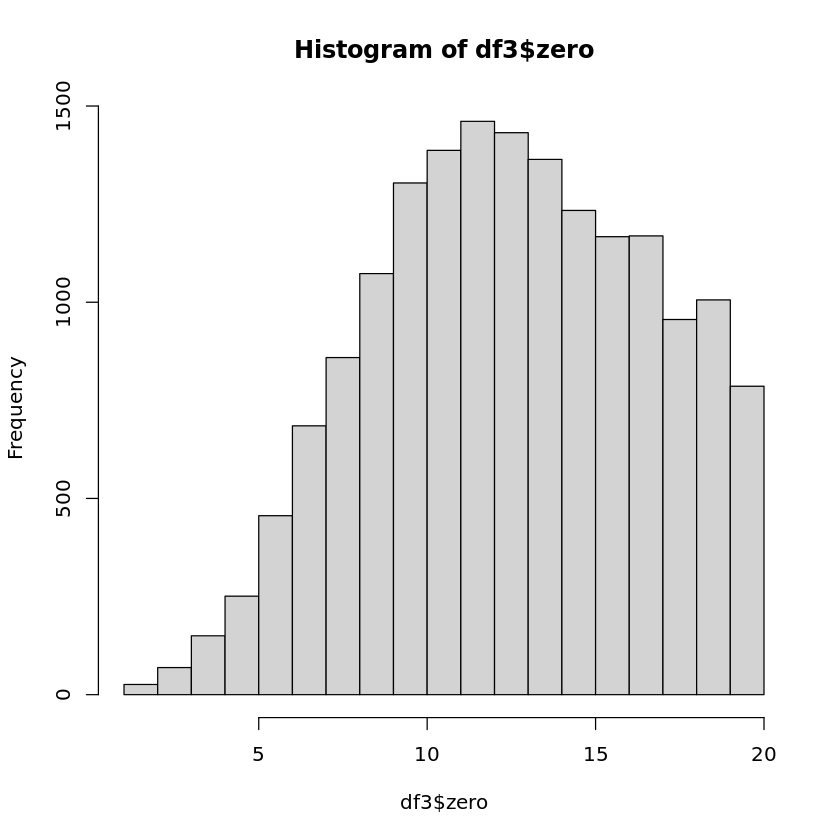

In [62]:
hist(df3$zero)
hist(df4$zero)

In [128]:
## only keep regulatees with highest edge weight
## TRM
# df4 <- d2[,c(common_neighbors, TFs_TRM)] %>% dplyr::slice_max(order_by = eval(parse(text = id)), n = 500)
# df4 <- d2[,c(common_neighbors, TFs_TRM)] %>% mutate(mean=rowMeans(.)) %>% top_n(500) %>% select(-mean)
df4 <- d2[,TFs_TRM] %>% mutate(zero = across(everything(), ~ . == 0) %>% purrr::reduce(`+`),non_zero = length(TFs_TRM)-zero) %>% dplyr::filter(non_zero >= 1) %>% 
    dplyr::filter(non_zero >= length(TFs_TRM)%/%2) 
df4 <- df4 %>% select(!c(non_zero, zero)) %>% mutate(mean=rowMeans(.)) %>% top_n(top)


# df4 <- df4[,colSums(df4)!=0]
# df2 <- df2[!grepl("[0-9]{4}",rownames(df2)),]

print(dim(df4))
print(head(df4))
# write.csv(df3, paste0(id,"_mean_edge_weight_top1000_regulatees_",func,"_sparsity_",sparsity,"_",tag,".csv"))


Selecting by mean


[1] 1000   25
                  Snai1     Glis3   Zfp692     Zbtb3      Thrb     Sp110
1700020N18RIK 0.2821170 0.0000000 0.000000 0.0000000 0.0000000  0.000000
1700022E09RIK 0.6789240 0.7874871 4.853513 0.0000000 0.0000000 11.051146
1700029I15RIK 0.6832872 0.0000000 4.059024 0.6528376 0.0000000 12.582549
2410004B18RIK 0.3516140 0.7603420 3.223008 0.0000000 0.0000000  0.000000
2410015M20RIK 0.0000000 0.4435396 3.083496 0.0000000 0.0000000  7.023673
2900041M22RIK 0.6088741 0.0000000 2.846956 0.0000000 0.2550094  9.701119
                   Elf2      Tcf3     Trp53     Ikzf1    Tcf12     Rfx1
1700020N18RIK  3.224154 13.959910 10.170150  0.000000 8.494398 6.926332
1700022E09RIK  5.262890 11.616805  0.000000  0.000000 6.779163 3.653504
1700029I15RIK  7.178644  5.241161  6.736413  0.000000 5.135565 4.291204
2410004B18RIK 10.875805  6.177352 14.495121 12.139913 7.417356 4.736774
2410015M20RIK  8.736754  7.658686  8.381175 10.052700 3.513650 3.295369
2900041M22RIK 13.132156  5.127942  7.006318

In [129]:
# overlap of top 500 regulatees
common_genes <- intersect(rownames(df3), rownames(df4))
TEX_genes <- setdiff(rownames(df3), rownames(df4))
TRM_genes <- setdiff(rownames(df4), rownames(df3))
length(common_genes)

[1] 44

In [130]:
# write gene list
writeLines(firstUp(rownames(df3)),paste0("TexTerm_",id,'_neighborhood_',func,'_res',res,"_s",sparsity,"_",tag,'_top',top,'_specific_genes.txt'))
writeLines(firstUp(rownames(df4)),paste0("TRM_",id,'_neighborhood_',func,'_res',res,"_s",sparsity,"_",tag,'_top',top,'_specific_genes.txt'))

In [875]:
# # prepare TRM annotation for heatmap
# data <- df4
# group_sorted = data.frame(tf = names(data)) %>% mutate(Group=ifelse(tf %in% common_neighbors, 'common', ifelse(tf %in% TFs_TRM, 'TRM','other'))) 
# group_sorted$Group = factor(group_sorted$Group, levels = c('common','TRM', 'other'))

# group_sorted = group_sorted[order(group_sorted$Group),]

# data = data[,group_sorted$tf]
# n1 = length(unique(group_sorted$Group)) 
# mycolors <- list(subsets = c("#FF0000","#009051", "#A6A6A6"))
# names(mycolors$subsets) <- unique(group_sorted$Group)

# annotation_col = data.frame(
# subsets = group_sorted$Group
# )
# rownames(annotation_col) = colnames(data)


# group_sorted = data.frame(gene = rownames(data)) %>% mutate(Group=ifelse(gene %in% common_genes, 'common', ifelse(gene %in% TRM_genes, 'TRM','other'))) 
# group_sorted$Group = factor(group_sorted$Group, levels = c('common','TRM', 'other'))

# group_sorted = group_sorted[order(group_sorted$Group),]
# data = data[group_sorted$gene,]

# annotation_row = data.frame(subsets = group_sorted$Group)
# rownames(annotation_row) = rownames(data)

# data <- data[common_genes,]
# sample <- "TRM"

In [131]:
# prepare TRM annotation for heatmap
sample <- "TRM"
file <- paste0('hp_',sample,"_",id,'_neighborhood_',func,'_res',res,"_s",sparsity,"_",tag,'_top',top,'_specific_genes.pdf')
data <- d2[c(TEX_genes, TRM_genes),TFs_TRM]
# data <- df3[common_genes,]
# group_sorted = data.frame(tf = names(data)) %>% mutate(Group=ifelse(tf %in% common_neighbors, 'common', ifelse(tf %in% TFs_TEX, 'TEX','TRM'))) 
# group_sorted$Group = factor(group_sorted$Group, levels = c('common','TEX', 'TRM'))
group_sorted = data.frame(tf = names(data)) %>% mutate(Group=ifelse(tf %in% common_neighbors, 'common', 'TRM'))
group_sorted$Group = factor(group_sorted$Group, levels = c('common','TRM'))
group_sorted = group_sorted[order(group_sorted$Group),]

data = data[,group_sorted$tf]

annotation_col = data.frame(TF = group_sorted$Group)
rownames(annotation_col) = colnames(data)


group_sorted2 = data.frame(gene = rownames(data)) %>% mutate(Group= ifelse(gene %in% TEX_genes, 'TEX','TRM'))
group_sorted2$Group = factor(group_sorted2$Group, levels = c('TEX', 'TRM'))

group_sorted2 = group_sorted2[order(group_sorted2$Group),]
data = data[group_sorted2$gene,]

annotation_row = data.frame(gene = group_sorted2$Group)
rownames(annotation_row) = rownames(data)

# assign colors
# mycolors <- list(subsets = c("#FF0000","#8AAA75","#009051"))
mycolors <- list(TF = c("#FF0000","#009051"), gene = c("#8AAA75", "#009051"))
names(mycolors$TF) <- unique(group_sorted$Group)
names(mycolors$gene) <- unique(group_sorted2$Group)

In [138]:
# prepare TEX annotation for heatmap
sample <- "TexTerm"
file <- paste0('hp_',sample,"_",id,'_neighborhood_',func,'_res',res,"_s",sparsity,"_",tag,'_top',top,'_specific_genes.pdf')
data <- d1[c(TEX_genes, TRM_genes),TFs_TEX]
# data <- df3[common_genes,]
# group_sorted = data.frame(tf = names(data)) %>% mutate(Group=ifelse(tf %in% common_neighbors, 'common', ifelse(tf %in% TFs_TEX, 'TEX','TRM'))) 
# group_sorted$Group = factor(group_sorted$Group, levels = c('common','TEX', 'TRM'))
group_sorted = data.frame(tf = names(data)) %>% mutate(Group=ifelse(tf %in% common_neighbors, 'common', 'TEX'))
group_sorted$Group = factor(group_sorted$Group, levels = c('common','TEX'))
group_sorted = group_sorted[order(group_sorted$Group),]

data = data[,group_sorted$tf]

annotation_col = data.frame(TF = group_sorted$Group)
rownames(annotation_col) = colnames(data)


group_sorted2 = data.frame(gene = rownames(data)) %>% mutate(Group= ifelse(gene %in% TEX_genes, 'TEX','TRM'))
group_sorted2$Group = factor(group_sorted2$Group, levels = c('TEX', 'TRM'))

group_sorted2 = group_sorted2[order(group_sorted2$Group),]
data = data[group_sorted2$gene,]

annotation_row = data.frame(gene = group_sorted2$Group)
rownames(annotation_row) = rownames(data)

# assign colors
# mycolors <- list(subsets = c("#FF0000","#8AAA75","#009051"))
mycolors <- list(TF = c("#FF0000","#8AAA75"), gene = c("#8AAA75", "#009051"))
names(mycolors$TF) <- unique(group_sorted$Group)
names(mycolors$gene) <- unique(group_sorted2$Group)

In [118]:
# prepare TEX annotation for heatmap, 3-group genes
sample <- "TexTerm"
file <- paste0('hp_',sample,"_",id,'_neighborhood_',func,'_res',res,"_s",sparsity,"_",tag,'_top',top,'_specific_genes.pdf')
data <- d1[c(TEX_genes, TRM_genes, common_genes),TFs_TEX]
# data <- df3[common_genes,]
# group_sorted = data.frame(tf = names(data)) %>% mutate(Group=ifelse(tf %in% common_neighbors, 'common', ifelse(tf %in% TFs_TEX, 'TEX','TRM'))) 
# group_sorted$Group = factor(group_sorted$Group, levels = c('common','TEX', 'TRM'))
group_sorted = data.frame(tf = names(data)) %>% mutate(Group=ifelse(tf %in% common_neighbors, 'common', 'TEX'))
group_sorted$Group = factor(group_sorted$Group, levels = c('common','TEX'))
group_sorted = group_sorted[order(group_sorted$Group),]

data = data[,group_sorted$tf]

annotation_col = data.frame(TF = group_sorted$Group)
rownames(annotation_col) = colnames(data)


group_sorted2 = data.frame(gene = rownames(data)) %>% mutate(Group= ifelse(gene %in% common_genes, 'common',ifelse(gene %in% TEX_genes, 'TEX','TRM')))
group_sorted2$Group = factor(group_sorted2$Group, levels = c('common','TEX', 'TRM'))

group_sorted2 = group_sorted2[order(group_sorted2$Group),]
data = data[group_sorted2$gene,]

annotation_row = data.frame(gene = group_sorted2$Group)
rownames(annotation_row) = rownames(data)

# assign colors
# mycolors <- list(subsets = c("#FF0000","#8AAA75","#009051"))
mycolors <- list(TF = c("#FF0000","#8AAA75"), gene = c("#FF0000","#8AAA75", "#009051"))
names(mycolors$TF) <- unique(group_sorted$Group)
names(mycolors$gene) <- unique(group_sorted2$Group)

In [141]:
# prepare TEX annotation for heatmap, only common genes
sample <- "TexTerm"
file <- paste0('hp_',sample,"_",id,'_neighborhood_',func,'_res',res,"_s",sparsity,"_",tag,'_top',top,'_common_genes.pdf')
data <- d1[common_genes,TFs_TEX]
# data <- df3[common_genes,]
# group_sorted = data.frame(tf = names(data)) %>% mutate(Group=ifelse(tf %in% common_neighbors, 'common', ifelse(tf %in% TFs_TEX, 'TEX','TRM'))) 
# group_sorted$Group = factor(group_sorted$Group, levels = c('common','TEX', 'TRM'))
group_sorted = data.frame(tf = names(data)) %>% mutate(Group=ifelse(tf %in% common_neighbors, 'common', 'TEX'))
group_sorted$Group = factor(group_sorted$Group, levels = c('common','TEX'))
group_sorted = group_sorted[order(group_sorted$Group),]

data = data[,group_sorted$tf]

annotation_col = data.frame(TF = group_sorted$Group)
rownames(annotation_col) = colnames(data)


group_sorted2 = data.frame(gene = rownames(data)) %>% mutate(Group='common')

annotation_row = data.frame(gene = group_sorted2$Group)
rownames(annotation_row) = rownames(data)

# assign colors
# mycolors <- list(subsets = c("#FF0000","#8AAA75","#009051"))
mycolors <- list(TF = c("#FF0000","#8AAA75"), gene = c("#FF0000"))
names(mycolors$TF) <- unique(group_sorted$Group)
names(mycolors$gene) <- unique(group_sorted2$Group)

In [143]:
# prepare TRM annotation for heatmap, only common genes
sample <- "TRM"
file <- paste0('hp_',sample,"_",id,'_neighborhood_',func,'_res',res,"_s",sparsity,"_",tag,'_top',top,'_common_genes.pdf')
data <- d2[common_genes,TFs_TRM]
group_sorted = data.frame(tf = names(data)) %>% mutate(Group=ifelse(tf %in% common_neighbors, 'common', 'TRM'))
group_sorted$Group = factor(group_sorted$Group, levels = c('common','TRM'))
group_sorted = group_sorted[order(group_sorted$Group),]

data = data[,group_sorted$tf]

annotation_col = data.frame(TF = group_sorted$Group)
rownames(annotation_col) = colnames(data)


group_sorted2 = data.frame(gene = rownames(data)) %>% mutate(Group='common')

annotation_row = data.frame(gene = group_sorted2$Group)
rownames(annotation_row) = rownames(data)

# assign colors
# mycolors <- list(subsets = c("#FF0000","#8AAA75","#009051"))
mycolors <- list(TF = c("#FF0000","#009051"), gene = c("#FF0000"))
names(mycolors$TF) <- unique(group_sorted$Group)
names(mycolors$gene) <- unique(group_sorted2$Group)

In [145]:
# file <- paste0('hp_',sample,"_",id,'_neighborhood_',func,'_res',res,"_s",sparsity,"_",tag,'_top_in_common_genes.pdf')
breaksList = seq(0, 3, by = 0.1)
p <- pheatmap::pheatmap(data, 
              show_colnames = T, show_rownames = T, 
              annotation_col = annotation_col, 
              annotation_row=annotation_row, 
              annotation_colors=mycolors, 
              border_color = NA,
              breaks=breaksList, 
#               color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYl")))(length(breaksList)),
              color = colorRampPalette(brewer.pal(n = 7, name = "YlOrRd"))(length(breaksList)),                        
              cluster_cols = F, cluster_rows=F,
              clustering_distance_cols = 'correlation', 
              clustering_distance_rows = 'correlation',
              clustering_method = 'average', 
              filename=file)

In [883]:
TRM_genes

[1] "1810053B23RIK" "1810059C17RIK" "2610035F20RIK" "4930402H24RIK"
  [5] "9330136K24RIK" "9430020K01RIK" "9530082P21RIK" "A730089K16RIK"
  [9] "A930004D18RIK" "ABLIM1"        "ADAMTS3"       "ADCY9"        
 [13] "ADGRG6"        "ADORA2A"       "AFAP1"         "AHNAK"        
 [17] "ALPK2"         "AMPD3"         "ANGPTL2"       "ANK1"         
 [21] "ANKLE2"        "ANKS1B"        "AP3S1"         "APBA2"        
 [25] "ARAP1"         "ARHGAP12"      "ARHGEF37"      "ARPIN"        
 [29] "ART2A-PS"      "ATP5L"         "ATRIP"         "ATRNL1"       
 [33] "ATXN1"         "B4GALT6"       "B930095G15RIK" "BCL2L11"      
 [37] "BCL9L"         "BEAN1"         "BMP6"          "C530008M17RIK"
 [41] "CACNG3"        "CAPZB"         "CASC4"         "CBX5"         
 [45] "CCDC51"        "CCRN4L"        "CD200R3"       "CD44"         
 [49] "CDC42EP1"      "CDH5"          "CDO1"          "CFAP46"       
 [53] "CIDEA"         "CLIP3"         "CLIP4"         "COCH"         
 [57] "COL9A2"        "CORIN"         "CORO2A"        "COX7A1"       
 [61] "CPM"           "CPSF6"         "CRHR2"         "CRTC3"        
 [65] "CSPG5"         "CTIF"          "CTTN"          "CXCL12"       
 [69] "CYFIP2"        "D15ERTD621E"   "D930015E06RIK" "DAP"          
 [73] "DBN1"          "DDIT4L"        "DDX6"          "DGKD"         
 [77] "DLC1"          "DMWD"          "DNAJB3"        "DSCAML1"      
 [81] "DTX1"          "EFHD1"         "EFHD1OS"       "EIF2AK3"      
 [85] "EIF4E2"        "ELAVL4"        "ELFN1"         "ENAH"         
 [89] "EPB4.1L4A"     "EPC1"          "EPHA2"         "ERG"          
 [93] "ESRRG"         "EZR"           "FAM229B"       "FAM49A"       
 [97] "FAM49B"        "FAM69B"        "FBLIM1"        "FBP1"         
[101] "FGFR4"         "FLNC"          "FLT1"          "FNBP1L"       
[105] "FNDC1"         "FNTB"          "FOXI2"         "FOXI3"        
[109] "FOXL2OS"       "FOXO6"         "G0S2"          "GALNT14"      
[113] "GAS6"          "GGNBP1"        "GIGYF2"        "GLDC"         
[117] "GLIS2"         "GM10083"       "GM10125"       "GM10309"      
[121] "GM10640"       "GM11941"       "GM13161"       "GM13330"      
[125] "GM13420"       "GM14010"       "GM14159"       "GM14486"      
[129] "GM15326"       "GM15800"       "GM15908"       "GM16136"      
[133] "GM16160"       "GM1673"        "GM17181"       "GM17968"      
[137] "GM19582"       "GM20467"       "GM20760"       "GM22270"      
[141] "GM2238"        "GM23062"       "GM24487"       "GM25009"      
[145] "GM25266"       "GM25555"       "GM25605"       "GM25706"      
[149] "GM25888"       "GM25916"       "GM26397"       "GM26693"      
[153] "GM26705"       "GM26766"       "GM27030"       "GM27357"      
[157] "GM28402"       "GM28529"       "GM2885"        "GM28857"      
[161] "GM37359"       "GM37495"       "GM38048"       "GM4675"       
[165] "GM5089"        "GM5441"        "GM7083"        "GM7276"       
[169] "GM8976"        "GM9913"        "GMPR"          "GNAO1"        
[173] "GNAS"          "GNB2L1"        "GNS"           "GPR12"        
[177] "GPR137B-PS"    "GPR6"          "GPR83"         "GRHL2"        
[181] "GSDMD"         "GSE1"          "GSG2"          "H2AFY2"       
[185] "HECW2"         "HJURP"         "HMGA2"         "HUNK"         
[189] "IFNGR1"        "IGF2R"         "INPP5D"        "INPP5F"       
[193] "IQSEC3"        "IRF2BP2"       "IRGM2"         "JADE2"        
[197] "JAKMIP1"       "JARID2"        "JDP2"          "KCNMB4OS2"    
[201] "KCTD17"        "KIF5B"         "KLF13"         "KLF14"        
[205] "KRT72"         "KSR1"          "LAMC2"         "LAPTM5"       
[209] "LHFPL3"        "LIN28A"        "LPIN2"         "LRRC4B"       
[213] "LURAP1L"       "LY6H"          "MAP3K8"        "MAP4"         
[217] "MBP"           "MCTP1"         "MDP1"          "MED13L"       
[221] "MGAT1"         "MIAT"          "MIR1893"       "MIR692-2"     
[225] "MIR7078"       "MIR7655"       "MMP25"         "MPPED1"       
[229] "MSI2"

In [172]:
# further filter to keep regulatees with higher edge weight in specific TFs
# filter out genes that has no proper gene names
df2 <- df2[!grepl("[0-9]{4}",rownames(df2)),]
common_neighbors <- readLines(paste0('../compare/',id,'_neighbors_in_common_',func,'_res',res,"_s",sparsity,"_",tag,'.txt'))
specific_neighbors <- setdiff(TFs,c(common_neighbors,id))

In [187]:
# directly use the mean to filter
# df3 <- df3 %>% mutate(mean_dif=abs(rowMeans(df3[,specific_neighbors])-rowMeans(df3[,common_neighbors]))) %>% top_n(2000) %>% select(-mean_dif)
# df3 <- df3 %>% mutate(mean_dif=rowMeans(df3[,specific_neighbors])-rowMeans(df3[,common_neighbors])) %>% top_n(-1000) %>% select(-mean_dif)
# df3 <- df2 %>% mutate(mean_dif=rowMeans(df2[,specific_neighbors])-rowMeans(df2[,common_neighbors])) %>% top_n(1000) %>% select(-mean_dif)
# df3 <- df2 %>% mutate(mean_dif=abs(rowMeans(df2[,specific_neighbors])-rowMeans(df2[,common_neighbors]))) %>% top_n(1000) %>% select(-mean_dif)
df3 <- df2 %>% mutate(mean=rowMeans(.)) %>% top_n(1000) %>% select(-mean)

head(df3)

Selecting by mean


Zfp324    Prdm4    Prdm16    Zfp653   Zbtb43   Zfp768    Rfx5    
AAED1 2.3469053 0.000000 2.1595027 2.091155 0.000000 0.0000000 0.000000
ABCC4 0.0000000 0.000000 0.7917518 0.000000 0.000000 0.3952493 3.015800
ABHD6 2.8662003 0.000000 0.0000000 2.044017 0.000000 0.6557569 0.000000
ABR   0.0000000 3.873864 0.0000000 0.000000 0.000000 0.7028596 1.449848
ABTB2 0.0000000 0.000000 1.4932486 0.000000 0.000000 0.4078773 0.000000
ACADL 0.9260824 0.000000 1.8457935 0.000000 2.158409 0.0000000 2.452348
      Ctcf     Elf2     Trp53     ⋯ Nfkb2     Zfp335   Zfp263   Nfkb1   
AAED1 26.59626 8.320353  0.000000 ⋯  0.000000 3.398969 0.000000 0.000000
ABCC4 28.22090 8.465657 13.094630 ⋯  3.328016 3.935418 0.000000 3.510919
ABHD6 21.43730 7.301617  8.110659 ⋯ 10.393406 5.336754 8.242048 9.134582
ABR   22.51428 7.770553  0.000000 ⋯  5.391608 5.335751 0.000000 6.536069
ABTB2 20.50244 8.606989  6.737247 ⋯  5.903035 3.766497 4.681528 5.252308
ACADL 25.55604 8.954187  0.000000 ⋯  6.456269 4.223739 0.000000 7.143641
      Ets2     Klf8     Rfx7     Snai3    Smad4     Hic1    
AAED1 0.000000 1.605339 4.251513 0.000000 14.192928 8.504916
ABCC4 1.663176 1.722690 0.000000 0.000000  0.000000 4.728881
ABHD6 2.555906 2.025416 5.356411 6.931344  5.997384 5.761846
ABR   1.785600 1.579206 2.801793 0.000000 11.042394 6.161912
ABTB2 2.004322 2.772322 0.000000 6.194799  9.165265 7.595861
ACADL 2.694944 2.849219 5.133012 0.000000  6.022600 6.844328

In [140]:
# use t test to select differential regulatees
n <- which(names(df3)%in%specific_neighbors)
n

ps <- unpairedtTest(df3,n,p=0.5,d=0,type='log')

[1]  1  2  3  4  5  6  7 11 13 16 20 22 23 24

In [143]:
selected_genes <- rownames(ps)
df3 <- df3[selected_genes,]

In [148]:
df3

Hic1     Ctcf     Elf2     Trp53    Sp110 Tcf12    Rfx1    
RNF152        0        0        0        0        0     0.000000 0.000000
ACOX1         0        0        0        0        0     0.000000 0.000000
TEN1          0        0        0        0        0     0.000000 0.000000
BLMH          0        0        0        0        0     0.000000 0.000000
ZAP70         0        0        0        0        0     0.000000 0.000000
LRP12         0        0        0        0        0     0.000000 0.000000
FAM173A       0        0        0        0        0     0.000000 0.000000
RP24-555P13.2 0        0        0        0        0     0.000000 0.000000
SMARCA2       0        0        0        0        0     0.000000 0.000000
ANKRD12       0        0        0        0        0     0.000000 0.000000
PHACTR4       0        0        0        0        0     4.681163 0.000000
IFIT3         0        0        0        0        0     2.300348 0.000000
SMIM10L2A     0        0        0        0        0     0.000000 0.000000
ZMYM3         0        0        0        0        0     0.000000 0.000000
NFATC2IP      0        0        0        0        0     0.000000 0.000000
BTBD6         0        0        0        0        0     0.000000 0.000000
CTBP2         0        0        0        0        0     0.000000 0.000000
XKR8          0        0        0        0        0     2.475193 0.000000
RP24-554L15.2 0        0        0        0        0     0.000000 0.000000
MROH1         0        0        0        0        0     0.000000 0.000000
MIR146        0        0        0        0        0     0.000000 2.451878
MMD           0        0        0        0        0     0.000000 0.000000
ABHD14B       0        0        0        0        0     0.000000 0.000000
CACTIN        0        0        0        0        0     0.000000 0.000000
LRP1          0        0        0        0        0     0.000000 0.000000
TDGF1         0        0        0        0        0     0.000000 0.000000
CHIA1         0        0        0        0        0     0.000000 0.000000
RP23-307I19.5 0        0        0        0        0     0.000000 0.000000
RP23-307I19.6 0        0        0        0        0     0.000000 0.000000
RP24-565B3.4  0        0        0        0        0     0.000000 0.000000
⋮             ⋮        ⋮        ⋮        ⋮        ⋮     ⋮        ⋮       
QARS          0.000000 0.000000 0.000000 0.000000 0     0.000000 0.000000
PRR14L        0.000000 0.000000 0.000000 0.000000 0     0.000000 0.000000
EIF4A1        0.000000 0.000000 0.000000 0.000000 0     0.000000 0.000000
MIR301        0.000000 0.000000 0.000000 0.000000 0     4.145607 0.000000
PRR11         0.000000 0.000000 0.000000 0.000000 0     4.145607 0.000000
SKA2          0.000000 0.000000 0.000000 0.000000 0     4.145607 0.000000
GUCY1A3       0.000000 0.000000 0.000000 0.000000 0     0.000000 3.710122
HSPA1B        0.000000 0.000000 0.000000 0.000000 0     0.000000 0.000000
NDUFV2        0.000000 0.000000 0.000000 0.000000 0     0.000000 0.000000
MRC2          0.000000 0.000000 0.000000 0.000000 0     2.911264 0.000000
MKS1          0.000000 0.000000 0.000000 0.000000 0     4.338572 7.822690
LRRC7         0.000000 3.885304 0.000000 0.000000 0     0.000000 2.383072
SUZ12         0.000000 0.000000 0.000000 0.000000 0     0.000000 0.000000
TELO2         0.000000 0.000000 0.000000 0.000000 0     0.000000 0.000000
P2RX7         0.000000 0.000000 0.000000 0.000000 0     0.000000 0.000000
KCNJ3         0.000000 0.000000 0.000000 0.000000 0     3.100775 0.000000
CCDC32        0.000000 0.000000 0.000000 0.000000 0     3.475910 0.000000
UQCR10        0.000000 0.000000 4.330342 0.000000 0     0.000000 0.000000
SEC23IP       0.000000 0.000000 0.000000 6.315806 0     0.000000 0.000000
SELPLG        0.000000 0.000000 0.000000 6.487592 0     4.105148 0.000000
LUZP1         4.962369 0.000000 0.000000 0.000000 0     0.000000 1.585416
KIRREL2       0.000000 0.000000 0.000000 0.000000 0     0.000000 0.000000
NPHS1         0.00

In [188]:
group_sorted = data.frame(tf = names(df3)) %>% mutate(Group=ifelse(tf %in% specific_neighbors, 'unique', ifelse(tf %in% common_neighbors, 'common',id))) 
group_sorted$Group = factor(group_sorted$Group, levels = c(id,'common','unique'))
group_sorted = group_sorted[order(group_sorted$Group),]
group_sorted

df3 = df3[,group_sorted$tf]
n1 = length(unique(group_sorted$Group)) 
mycolors <- list(subsets = c("#009051","#A6A6A6", "#FF0000"))
names(mycolors$subsets) <- unique(group_sorted$Group)

annotation_col = data.frame(
  subsets = group_sorted$Group
)
rownames(annotation_col) = colnames(df3)


tf     Group 
25 Hic1   Hic1  
8  Ctcf   common
9  Elf2   common
10 Trp53  common
12 Sp110  common
14 Tcf12  common
15 Rfx1   common
17 Zfp335 common
18 Zfp263 common
19 Nfkb1  common
21 Klf8   common
1  Zfp324 unique
2  Prdm4  unique
3  Prdm16 unique
4  Zfp653 unique
5  Zbtb43 unique
6  Zfp768 unique
7  Rfx5   unique
11 Pknox1 unique
13 Smad3  unique
16 Nfkb2  unique
20 Ets2   unique
22 Rfx7   unique
23 Snai3  unique
24 Smad4  unique

In [145]:
library(pheatmap)
library(RColorBrewer)

In [194]:
dim(df3)

[1] 1000   25

In [189]:
file <- paste0('hp_',id,'_neighborhood_',func,'_res',res,"_s",sparsity,"_",sample,"_",tag,'.pdf')
breaksList = seq(-2, 2, by = 0.1)


In [191]:
file <- paste0('hp_',id,'_neighborhood_',func,'_res',res,"_s",sparsity,"_",sample,"_",tag,'.pdf')
p <- pheatmap(df3, show_colnames = T, show_rownames = F, 
              annotation_col = annotation_col, annotation_colors=mycolors,
              breaks=breaksList, color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(breaksList)),
              cluster_cols = F, clustering_distance_cols = 'correlation', 
              clustering_distance_rows = 'correlation',
              clustering_method = 'average', 
              filename=file)

In [47]:
file = paste0(id,'_neighbors_',func,'_res',res,"_s",sparsity,"_",sample,"_",tag,'.txt')
TFs_2 <- c(readLines(file),id)

In [50]:
writeLines(intersect(TFs,readLines(file)), paste0('../compare/',id,'_neighbors_in_common_',func,'_res',res,"_s",sparsity,"_",tag,'.txt'))

In [51]:
# TexTerm file
print(sample)
file = paste0('mean_',sample,'_edge_weight_',tag,'.csv')
df_tex <- read.csv(file, row.names = 1)
names(df_tex) <- firstUp(names(df_tex))
head(df_tex)

[1] "TexTerm"


Arid3a   Arnt     Arntl    Atf1     Atf2      Atf7     Batf    
0610007P14RIK 0.000000 0.000000 0.000000 0.000000  8.047992 4.191211  0.00000
0610009B22RIK 0.000000 8.034914 7.755197 7.727369 10.154226 8.928981 12.02092
0610009E02RIK 0.000000 0.000000 0.000000 0.000000  0.000000 0.000000  0.00000
0610009L18RIK 3.535508 8.272055 7.792067 6.186838 12.953496 6.772344  0.00000
0610009O20RIK 2.829764 5.850666 8.250112 5.537141  0.000000 2.676284 12.32866
0610010F05RIK 2.764324 3.549189 0.000000 6.128912 10.019813 5.624563  0.00000
              Bbx      Bcl6     Bhlhe40  ⋯ Zfp410   Zfp422   Zfp523   Zfp566  
0610007P14RIK 4.224679 2.284394  0.00000 ⋯ 0.000000 0.000000 0.000000 1.574840
0610009B22RIK 4.218905 2.004101 24.77116 ⋯ 4.137407 0.000000 0.000000 0.000000
0610009E02RIK 0.000000 2.514115  0.00000 ⋯ 0.000000 0.000000 0.000000 1.290968
0610009L18RIK 4.229038 0.000000  0.00000 ⋯ 0.000000 3.253367 3.565556 3.087408
0610009O20RIK 4.228595 3.228577  0.00000 ⋯ 0.000000 5.454378 3.319773 1.565702
0610010F05RIK 5.424690 3.845737  0.00000 ⋯ 0.000000 0.000000 0.000000 1.730611
              Zfp64    Zfp653 Zfp740   Zfp768    Zfx       Zscan20
0610007P14RIK 0.000000 0       0.00000 0.4862167  5.250953 0      
0610009B22RIK 3.394022 0      18.51342 0.0000000 10.211687 0      
0610009E02RIK 0.000000 0       0.00000 0.0000000  0.000000 0      
0610009L18RIK 7.315779 0      16.97179 0.3849736 13.320289 0      
0610009O20RIK 5.091314 0       0.00000 0.4923388  8.054818 0      
0610010F05RIK 4.005657 0       0.00000 0.0000000 10.195432 0

In [52]:
df2_tex <- df_tex[TFs_2]
df2_tex <- df2_tex[rowSums(df2_tex)>0,]
head(df2_tex)
dim(df2_tex)

Zfp324   Prdm4 Prdm16   Zfp653 Zbtb43   Zfp768    Rfx5    
0610007P14RIK 0.000000 0     1.112235 0      0.000000 0.4862167 3.221835
0610009B22RIK 0.000000 0     0.000000 0      0.000000 0.0000000 0.000000
0610009E02RIK 0.000000 0     1.138767 0      0.000000 0.0000000 0.000000
0610009L18RIK 3.106738 0     1.277733 0      0.000000 0.3849736 0.000000
0610009O20RIK 0.000000 0     1.561199 0      1.270542 0.4923388 3.678539
0610010F05RIK 2.649228 0     0.000000 0      0.000000 0.0000000 0.000000
              Ctcf      Elf2      Trp53    ⋯ Nfkb2    Zfp335   Zfp263  
0610007P14RIK 14.611294 10.869197 7.585515 ⋯ 0.000000 0.000000 4.460543
0610009B22RIK 17.217166  5.373933 3.773156 ⋯ 5.223399 0.000000 5.146814
0610009E02RIK  7.602509  0.000000 0.000000 ⋯ 0.000000 0.000000 0.000000
0610009L18RIK 20.617520 11.412944 5.529399 ⋯ 0.000000 3.574074 0.000000
0610009O20RIK 14.211655  6.542976 8.692784 ⋯ 0.000000 0.000000 0.000000
0610010F05RIK 12.125092 11.682214 4.299100 ⋯ 0.000000 3.646716 4.460543
              Nfkb1    Ets2     Klf8     Rfx7     Snai3 Smad4    Hic1    
0610007P14RIK 0.000000 0.000000 1.526166 0.000000 0     0.000000 6.277965
0610009B22RIK 6.939485 0.000000 1.420089 0.000000 0     0.000000 0.000000
0610009E02RIK 0.000000 0.000000 1.334713 0.000000 0     0.000000 0.000000
0610009L18RIK 0.000000 2.336735 2.058185 5.220407 0     6.515750 5.463784
0610009O20RIK 0.000000 0.000000 2.040459 5.244645 0     5.976145 5.715704
0610010F05RIK 0.000000 2.572074 2.173779 6.033400 0     7.952872 7.759562

[1] 16888    25

In [54]:
regulatees_union = union(rownames(df), rownames(df_tex))
length(regulatees_union)
unique_tfs = setdiff(union(TFs, TFs_2), intersect(TFs, TFs_2))
print(unique_tfs)

[1] 21585

 [1] "Snai1"  "Epas1"  "Klf10"  "Tcf3"   "Klf2"   "Srebf2" "Phox2b" "Zfp398"
 [9] "Rora"   "Ikzf1"  "Zfp740" "Zfp692" "Zfp324" "Prdm4"  "Prdm16" "Zfp653"
[17] "Zbtb43" "Zfp768" "Rfx5"   "Pknox1" "Smad3"  "Nfkb2"  "Ets2"   "Rfx7"  
[25] "Snai3"  "Smad4" 


In [55]:
# create df_unique and df_common
df_unique = df[regulatees_union,unique_tfs]

ERROR: Error in `[.data.frame`(df, regulatees_union, unique_tfs): undefined columns selected


# load graph and change metadata

In [20]:
sparsity = 0.05
g <- readRDS("g.rds")
set.seed(123)
clustering = cluster_leiden(g, objective_function="modularity",resolution_parameter=res)
print(clustering)
print(sizes(clustering))
print(paste0('modularity:',modularity(g, membership(clustering))))
clust <- read.csv(paste0("clustering_membership_copula_",func,"_res",res,"_s", sparsity,".csv"))

IGRAPH clustering leiden, groups: 11, mod: NA
+ groups:
  $`1`
    [1] "Egr1"    "Zfp692"  "Klf4"    "Klf6"    "Tfap2b"  "Pbx3"    "Hinfp"  
    [8] "Zfp523"  "Etv5"    "Zbtb49"  "E2f4"    "Tfdp1"   "Nrf1"    "E2f6"   
   [15] "Ahr"     "Dnmt1"   "E2f1"    "E2f2"    "E2f3"    "Dnajc21" "E2f7"   
   [22] "Egr2"    "Egr3"    "Elf1"    "Elf4"    "Elk1"    "Elk3"    "Egr4"   
   [29] "Elk4"    "Epas1"   "Etv1"    "Fev"     "Fli1"    "Foxi1"   "Foxn1"  
   [36] "Foxn2"   "Foxn4"   "Glis1"   "Glis2"   "Hif1a"   "Ikzf3"   "Glis3"  
   [43] "Insm1"   "Gabpa"   "Klf1"    "Klf10"   "Klf11"   "Klf12"   "Klf13"  
   [50] "Klf14"   "Klf15"   "Klf2"    "Klf3"    "Klf5"    "Klf7"    "Klf8"   
   [57] "Jrkl"    "Kmt2a"   "Lin28a"  "Lin28b"  "Maz"     "Mbd2"    "Mecp2"  
  + ... omitted several groups/vertices
Community sizes
  1   2   3   4   5   6   7   8   9  10  11 
144  61  37 118 131  36 119 134  43  29  20 
[1] "modularity:0.500274024671383"


In [48]:
# create vertices meta dataframe
TexTerm_TF <- readLines('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/regulatees/_TexTerm_P005_F05_L58_single.txt')
exp_TF <- c("Nfil3","Jdp2","Prdm1","Zscan20")
other_texterm <- setdiff(TexTerm_TF, exp_TF)
TF <- unique(union(df$row, df$col))
other_TF = setdiff(TF, TexTerm_TF)

nodes <- rbind(data.frame(name = exp_TF, group = 'valid'),
               data.frame(name = other_texterm, group = 'TexTerm'),
               data.frame(name = other_TF, group = 'other'))
nodes <- nodes[order(match(nodes$name, V(g)$name)),]
head(nodes)
dim(nodes)

name    group  
31  Egr1    TexTerm
22  Bhlhe40 TexTerm
1   Nfil3   valid  
3   Prdm1   valid  
91  Atf4    other  
818 Zfp692  other

[1] 872   2

In [49]:
# change vertice attribute "group"
vertex_attr(g) <- list(name = nodes$name,
                       group = nodes$group)

# individual community visualization

In [ ]:
idx <- 7
TF <- "Zscan20"
gc_1 <- induced.subgraph(g,clustering[[idx]])
V(gc_1)$size <- 25
V(gc_1)$frame.color <- "black"
V(gc_1)$label.color <- "black"
V(gc_1)$label.cex <- ifelse(V(gc_1)$group=="other",0.2,0.7)
# V(gc_1)$color <- ifelse(V(gc_1)$name==TF,paste0(V(gc_1)$color,'7f'),V(gc_1)$color)
E(gc_1)$color <- "gray65"

pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_sub",idx,"_",TF,".pdf"), width = 5, height = 5)
plot(gc_1)
dev.off()

In [ ]:
## 3: individual community
idx <- 3
TF <- "Nfil3"
# idx <- 4
# TF <- "Prdm1"
gc_1 <- induced.subgraph(g,clustering[[idx]])
V(gc_1)$size <- 12
V(gc_1)$frame.color <- "black"
V(gc_1)$label.color <- "black"
V(gc_1)$label.cex <- ifelse(V(gc_1)$group=="other",0.5,0.7)
V(gc_1)$color <- ifelse(V(gc_1)$name==TF,paste0(V(gc_1)$color,'7f'),V(gc_1)$color)

E(gc_1)$color <- "gray65"


pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_sub",idx,".pdf"), width = 5, height = 5)
plot(gc_1)
dev.off()

# GO analysis

In [18]:
# GO analysis
createDir("GO")

[1] "/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/GO"


In [19]:
createDir(paste0("GO/cluster_copula_",func,"_res",res,"_s", sparsity))

[1] "/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/GO/cluster_copula_shrinkage_res1.8_s0.05"


In [6]:
clust <- read.csv(paste0("../../clustering_membership_copula_",func,"_res",res,"_s", sparsity,".csv"))

ERROR: Error in paste0("../../clustering_membership_copula_", func, "_res", res, : object 'sparsity' not found


In [21]:
get_GO <- function(x){
    TF <- clust[clust$cluster==x,"name"]
    file <- paste0("c",x,".txt")
    if (length(TF) >= 10){
        writeLines(TF, file)
        gsea(file)
    }

}

In [22]:
lapply(1:length(unique(clust$cluster)), get_GO)

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]
NULL

[[19]]
NULL

[[20]]
NULL

[[21]]
NULL

[[22]]
NULL

[[23]]
NULL

[[24]]
NULL

[[25]]
NULL

[[26]]
NULL

[[27]]
NULL

In [22]:
lapply(1:4, get_GO)

'select()' returned 1:1 mapping between keys and columns

Reading KEGG annotation online:


Warning message in utils::download.file(url, quiet = TRUE, method = method, ...):
“URL 'https://rest.kegg.jp/link/mmu/pathway': status was 'Failure when receiving data from the peer'”
fail to download KEGG data...



ERROR: Error in download.KEGG.Path(species): 'species' should be one of organisms listed in 'http://www.genome.jp/kegg/catalog/org_list.html'...


# visualization 

In [6]:
setwd(maindir)
getwd()

[1] "/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/TexTerm"

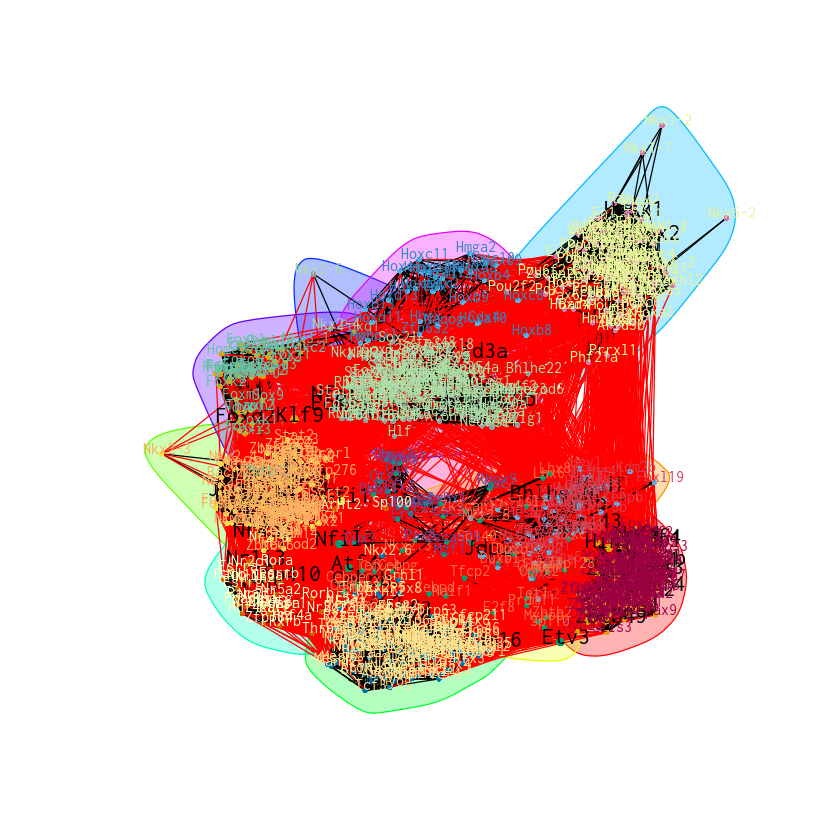

In [7]:
plot(clustering,g)

In [50]:
V(g)$cluster <- clustering$membership

In [51]:
# generate colors based on cluster
colors <- colorRampPalette(RColorBrewer::brewer.pal(11,"Spectral"))(length(clustering))
V(g)$color <- colors[V(g)$cluster]
V(g)$label.color <- ifelse(V(g)$group=="other",colors[V(g)$cluster],"black")
V(g)$frame.color <- "NA"

# # set node and label size based on group, highlight specific TFs
# V(g)$size <- ifelse(V(g)$group=="other",2,3)
# V(g)$label.cex <- ifelse(V(g)$group=="other",.8,1.2)

# set node and label size based on group, only show texterm-specific and common TFs
# V(g)$size <- ifelse(V(g)$group == "other",1,ifelse(V(g)$group == "TexTerm", 3, 5))
V(g)$size <- ifelse(V(g)$group=="other",1.5,5)

## size is non-linearly proportional to node degree
# V(g)$size <- ifelse(degree(g)<=84,log10(degree(g)), log2(degree(g)))
# V(g)$label.cex <- ifelse(V(g)$group == "other",NA,ifelse(V(g)$group == "TexTerm", 1, 2))
# V(g)$label.cex <- ifelse(V(g)$group == "other",NA,1.5)
V(g)$label.cex <- ifelse(V(g)$group == "other",NA,ifelse(V(g)$group == sample, 1, 2))
V(g)$label <- ifelse(V(g)$group == "other",NA,V(g)$name)


# set distance of label
V(g)$label.dist <- 0.4

# set edge color
E(g)$color <- "gray80"
E(g)$size <- 0.1
E(g)$lty <- 2

# only show edges that involve texterm-specific and common TFs
# lty=0 means that the edge won't be shown, default is 1
# it takes 30s
E(g)$lty <- unlist(lapply(E(g), function(x) {
    ifelse(V(g)$group[V(g)$name == ends(g, x)[1]] == "other" | V(g)$group[V(g)$name == ends(g, x)[2]] == "other", 0, 1)
}))

## set the within-module edges to some large weight, and the between module edges to some small weight
## and then choose 'layout_with_fr' to make the grouped layout 
edge.weights <- function(community, network, weight.within = 20, weight.between = 1) {
    bridges <- crossing(communities = community, graph = network)
    weights <- ifelse(test = bridges, yes = weight.between, no = weight.within)
    return(weights) 
}
E(g)$weight <- edge.weights(clustering, g)

In [237]:
# colors
degree(g)[order(degree(g))]
degree(g)["Zscan20"]
degree(g)["Nfil3"]
degree(g)["Jdp2"]
degree(g)["Prdm1"]
degree(g)["Atf4"]

log2(degree(g))

Nkx6-2   Nkx1-2   Nkx1-1   Nkx2-6   Nkx6-3   Nkx2-3   Nkx2.6   Nkx2.3 
       2        3        4        5        7        8        8       10 
    Gsc2   Nkx2-4   Nkx2.4    Homez    Kdm2a   Nkx1.1    Kdm2b    Obox6 
      11       11       11       12       12       12       13       13 
   Obox8   Nkx1.2  Neurod6    Mybl2    Zfp13 Zkscan17    Meox2     Klf9 
      13       13       14       14       14       14       15       15 
     Tef   Fbxl19     Msx1    Pitx2   Barhl2    Hmga2  Neurog1  Bhlhe23 
      15       16       16       16       17       17       17       18 
   Cebpd    Pitx3  Zscan29    Dmbx1    Hoxb5   Hoxc11    Hoxc4   Nkx6-1 
      18       18       18       19       19       19       19       19 
   Sp140  Bhlhe22     Dbx2   Hoxc12   Hoxd12    Hoxd4     Msx2     Hmx1 
      19       20       20       20       20       20       20       21 
    Hmx3     Pax4    Shox2   Nkx6.2    Creb5      Bsx     Hes5   Nkx3-1 
      21       21       21       21       22       22       22       22 
   Obox1   Nkx2.9    Cebpe   Hoxd10     Hsf3     Otx1    Mypop   Setbp1 
      22       22       23       23       23       23       23       23 
   Tead1   Nkx2.2    Hesx1    Cebpb     Emx1     Dlx6     Lbx1   Nkx2-2 
      23       23       24       24       24       24       24       24 
  Mlxipl      Rax    Trps1   Zbtb45   Nkx2.1  Bhlhe40     Atf4      Gsc 
      24       24       24       24       24       25       25       25 
   Hoxa7    Hoxb3   Hoxb13      Isx    Lcorl  Neurog3    Obox3    Ovol2 
      25       25       25       25       25       25       25       25 
  Nkx3-2     Vsx1    Rhox9   Nkx3.2    Nfil3    Cxxc4    Cxxc5   Duxbl1 
      25       25       25       25       26       26       26       26 
   Hsfy2    Mesp1    Mesp2      Mnt   Nkx2-5     Sox7    Tcf21     Tet3 
      26       26       26       26       26       26       26       26 
    Vax2    Cebpa   Crebzf     Hey2   Hoxa13    Hoxc8    Hoxd8    Hoxd1 
      27       27       27       27       27       27       27       27 
    Lhx6     Heyl     Isl1     Otx2     Pax3    Sox18    Sox21    Sp100 
      27       27       27       27       27       27       27       27 
    Sox8   Nkx2.5   Duxbl2   Duxbl3    Gata5     Gbx1   Hoxc13    Gata6 
      27       27       28       28       28       28       28       28 
   Nr2f1    Obox7    Sebox     Hsf2    Atoh1     Dlx1     Dlx2     Dlx4 
      28       28       28       29       29       29       29       29 
    Alx3      En1     Dlx5    Grhl1     Hes6    Hand2   Hoxa11    Hoxa3 
      29       29       29       29       29       29       29       29 
   Hoxb4   Hoxc10    Hoxb6   Nkx2-9    Pitx1     Pax9   Nkx3.1    Arid2 
      29       29       29       29       29       29       29       30 
   Arntl  Creb3l1    Gata2      Hlx    Hoxb1     Hsf4    Glis3     Mnx1 
      30       30       30       30       30       30       30       30 
   Naif1    Lmx1b    Ppard    Rhox6  Zscan26     Alx4      En2    Foxo6 
      30       30       30       30       30       31       31       31 
    Gbx2    Hoxb2    Hoxb9    Hoxd9     Lbx2      Mlx     Msx3     Lhx8 
      31       31       31       31       31       31       31       31 
  Phox2b    Sox12    Prrx1     Gfi1    Cphx1    Cphx2    Clock    Cphx3 
      31       31       31       32       32       32       32       32 
    E2f5    Foxp1    Foxp3    Foxp4    Hoxc9   Hoxd13    Hoxd3     Isl2 
      32       32       32       32       32       32       32       32 
    Hsf5    Meox1    Obox5     Noto     Rorb    Zbtb2   Thap12   Nkx6.1 
      32       32       32       32       32       32       32       32 
  Zfp128    Snai3     Atf2   Barhl1    Barx1    Barx2   Crebl2  Creb3l2 
      32       33       33       33       33       33       33       33 
     Arx    Foxb1    Foxb2    Foxd1    Glis2     Hes2     Lhx4    Mlxip 
      33       33       33       33       33       33       33       33 
  Nkx2-1    Olig1    Nobox   Pou6f1   Prdm11     Rfx4   Nkx6

Zscan20 
     70

Nfil3 
   26

Jdp2 
  38

Prdm1 
   60

Atf4 
  25

Egr1  Bhlhe40    Nfil3    Prdm1     Atf4   Zfp692     Pbx4     Atf3 
6.303781 4.643856 4.700440 5.906891 4.643856 6.375039 5.523562 5.584963 
    Hsf2     Etv3    Nr1i3     Mxd1    Ddit3    Meox2      Rel     Klf4 
4.857981 5.321928 5.832890 6.066089 5.700440 3.906891 5.977280 6.442943 
    Klf6   Hmg20b    Hesx1   Tfap2b   Zfp324     Jdp2  Zscan20   Zfp143 
6.507795 5.807355 4.584963 6.459432 5.977280 5.247928 6.129283 5.882643 
   Foxd2     Vax2     Pbx3    Stat3    Hinfp     Tfeb    Cebpb     Jund 
5.285402 4.754888 5.672425 5.584963 5.807355 5.321928 4.584963 5.554589 
   Prdm4   Zfp523     Batf     Etv5   Nfatc1   Zbtb49   Prdm16     E2f4 
5.643856 6.303781 5.700440 5.857981 6.189825 5.700440 6.108524 6.247928 
   Foxj2    Snai3     Hic1    Nr4a2   Arid3a     Xbp1    Tfdp1     Nrf1 
5.754888 5.044394 6.108524 5.426265 5.754888 5.672425 6.303781 6.442943 
    Irf8     Gfi1    Eomes   Zfp410   Zbtb20    Trp73     Klf9    Smad4 
6.022368 5.000000 5.285402 5.554589 5.247928 5.882643 3.906891 6.266787 
    E2f6     Alx1   Ahctf1    Arid2     Alx4   Arid3b   Arid3c       Ar 
6.189825 5.087463 5.954196 4.906891 4.954196 5.584963 5.169925 6.066089 
    Arnt    Ascl1      Ahr     Atf1     Atf2     Atf6     Aire    Bach1 
5.129283 5.491853 5.643856 5.754888 5.044394 5.977280 5.672425 5.357552 
  Barhl1   Barhl2    Barx1    Atoh7    Bach2    Batf3    Ascl2    Atoh1 
5.044394 4.087463 5.044394 5.247928 5.459432 6.108524 5.169925 4.857981 
  Arid5a  Bhlhe22    Arnt2    Arntl    Barx2     Cdx1  Bhlhe23     Cdx2 
6.266787 4.321928 5.321928 4.906891 5.044394 5.459432 4.169925 5.169925 
  Bcl11b    Cebpa    Cebpd     Atf7    Cebpe     Cbfb    Atf6b  Bhlhe41 
5.882643 4.754888 4.169925 5.209453 4.523562 5.672425 5.523562 5.321928 
   Cphx1    Cphx2    Cenpb    Clock  Creb3l1    Cebpg    Creb1     Cdx4 
5.000000 5.000000 5.459432 5.000000 4.906891 5.129283 5.754888 5.392317 
   Creb5   Crebl2  Bhlha15     Ctcf      Bbx     Bcl6      Crx    Cxxc4 
4.459432 5.044394 5.247928 5.832890 6.339850 5.832890 5.321928 4.700440 
   Cdc5l    Cxxc5      Bsx     Dbx2     Dlx1     Dlx2     Dlx3     Dlx4 
5.807355 4.700440 4.459432 4.321928 4.857981 4.857981 5.491853 4.857981 
 Creb3l2      Cic    Cxxc1    Dmrt1    Dmrt2    Dmrt3     Cux2   Dmrta1 
5.044394 5.672425 5.129283 5.832890 5.781360 5.781360 5.129283 5.554589 
  Dmrta2     Crem   Dmrtc2    Cphx3   Crebzf   Duxbl1   Duxbl2    Dnmt1 
5.807355 5.523562 5.807355 5.000000 4.754888 4.700440 4.807355 6.539159 
    E2f1     E2f2     E2f3  Dnajc21   Duxbl3     E2f5     E2f8     E2f7 
6.285402 5.727920 6.108524 6.392317 4.807355 5.000000 5.321928 6.321928 
   Ctcfl     Egr2     Egr3      Ehf     Elf1   Bcl11a     Elf2     Elf3 
6.087463 6.357552 6.266787 5.857981 6.169925 5.832890 5.727920 5.930737 
    Elf4     Elf5     Dbx1     Elk1     Elk3     Alx3     Emx1     Emx2 
5.807355 5.906891 5.614710 5.857981 6.022368 4.857981 4.584963 5.087463 
     Arx     Dlx6      En1     Egr4     Cux1     Elk4      Erf     Ebf1 
5.044394 4.584963 4.857981 6.169925 5.954196 5.930737 5.614710 5.977280 
   Epas1     Esr1    Esrra    Esrrb      En2      Erg     Ets1     Ets2 
5.459432 5.392317 5.209453 5.129283 4.954196 5.700440 5.807355 6.000000 
    Etv1     Etv2     Etv4     Esx1     Evx1     Etv6    Bcl6b    Fezf1 
5.954196 6.169925 6.129283 5.554589 5.614710 6.129283 6.189825 6.066089 
     Fev      Fos     Fosb    Fosl1    Foxa1   Dmrtb1    Foxa2    Foxa3 
6.087463 5.392317 5.491853 5.209453 5.087463 5.643856 5.321928 5.321928 
   Foxb1    Foxb2    Foxc1    Foxc2    Foxd1    Fosl2    Foxd3    Foxe1 
5.044394 5.044394 5.781360 5.129283 5.044394 5.087463 5.930737 5.727920 
   Foxe3    Foxf1    Foxf2   Arid5b    Foxg1    Foxi2    Fezf2    Foxh1 
5.727920 5.459432 5.459432 5.584963 5.491853 5.392317 6.066089 5.643856 
   Foxj1    Foxi3    Foxj3    Foxk1    Foxk2    Foxl1    Foxl2     Fli1 
5.672425 5.392317 5.906891 5.781360 5.087463 5.426265 5.781360 6.108524 
   Foxm1    Foxi1    Foxn1    Foxn2    Foxn3    Foxo1    Foxo3

In [239]:
df <- data.frame("name"=V(g)$name,"group"=V(g)$group, "degree"=degree(g)) %>% arrange(-degree)
head(df)
dim(df)
write.csv(df, paste0('node_degree_copula_',func,'_res',res,'_s',sparsity,'.csv'), row.names=F)


name   group degree
Zbtb14 Zbtb14 other 108   
Nr1h4  Nr1h4  other 102   
Zbtb6  Zbtb6  other 100   
Zfp566 Zfp566 other  99   
Mecp2  Mecp2  other  98   
Tfap2a Tfap2a other  96

[1] 872   3

Warning message:
“Ignoring unknown aesthetics: xend, yend”


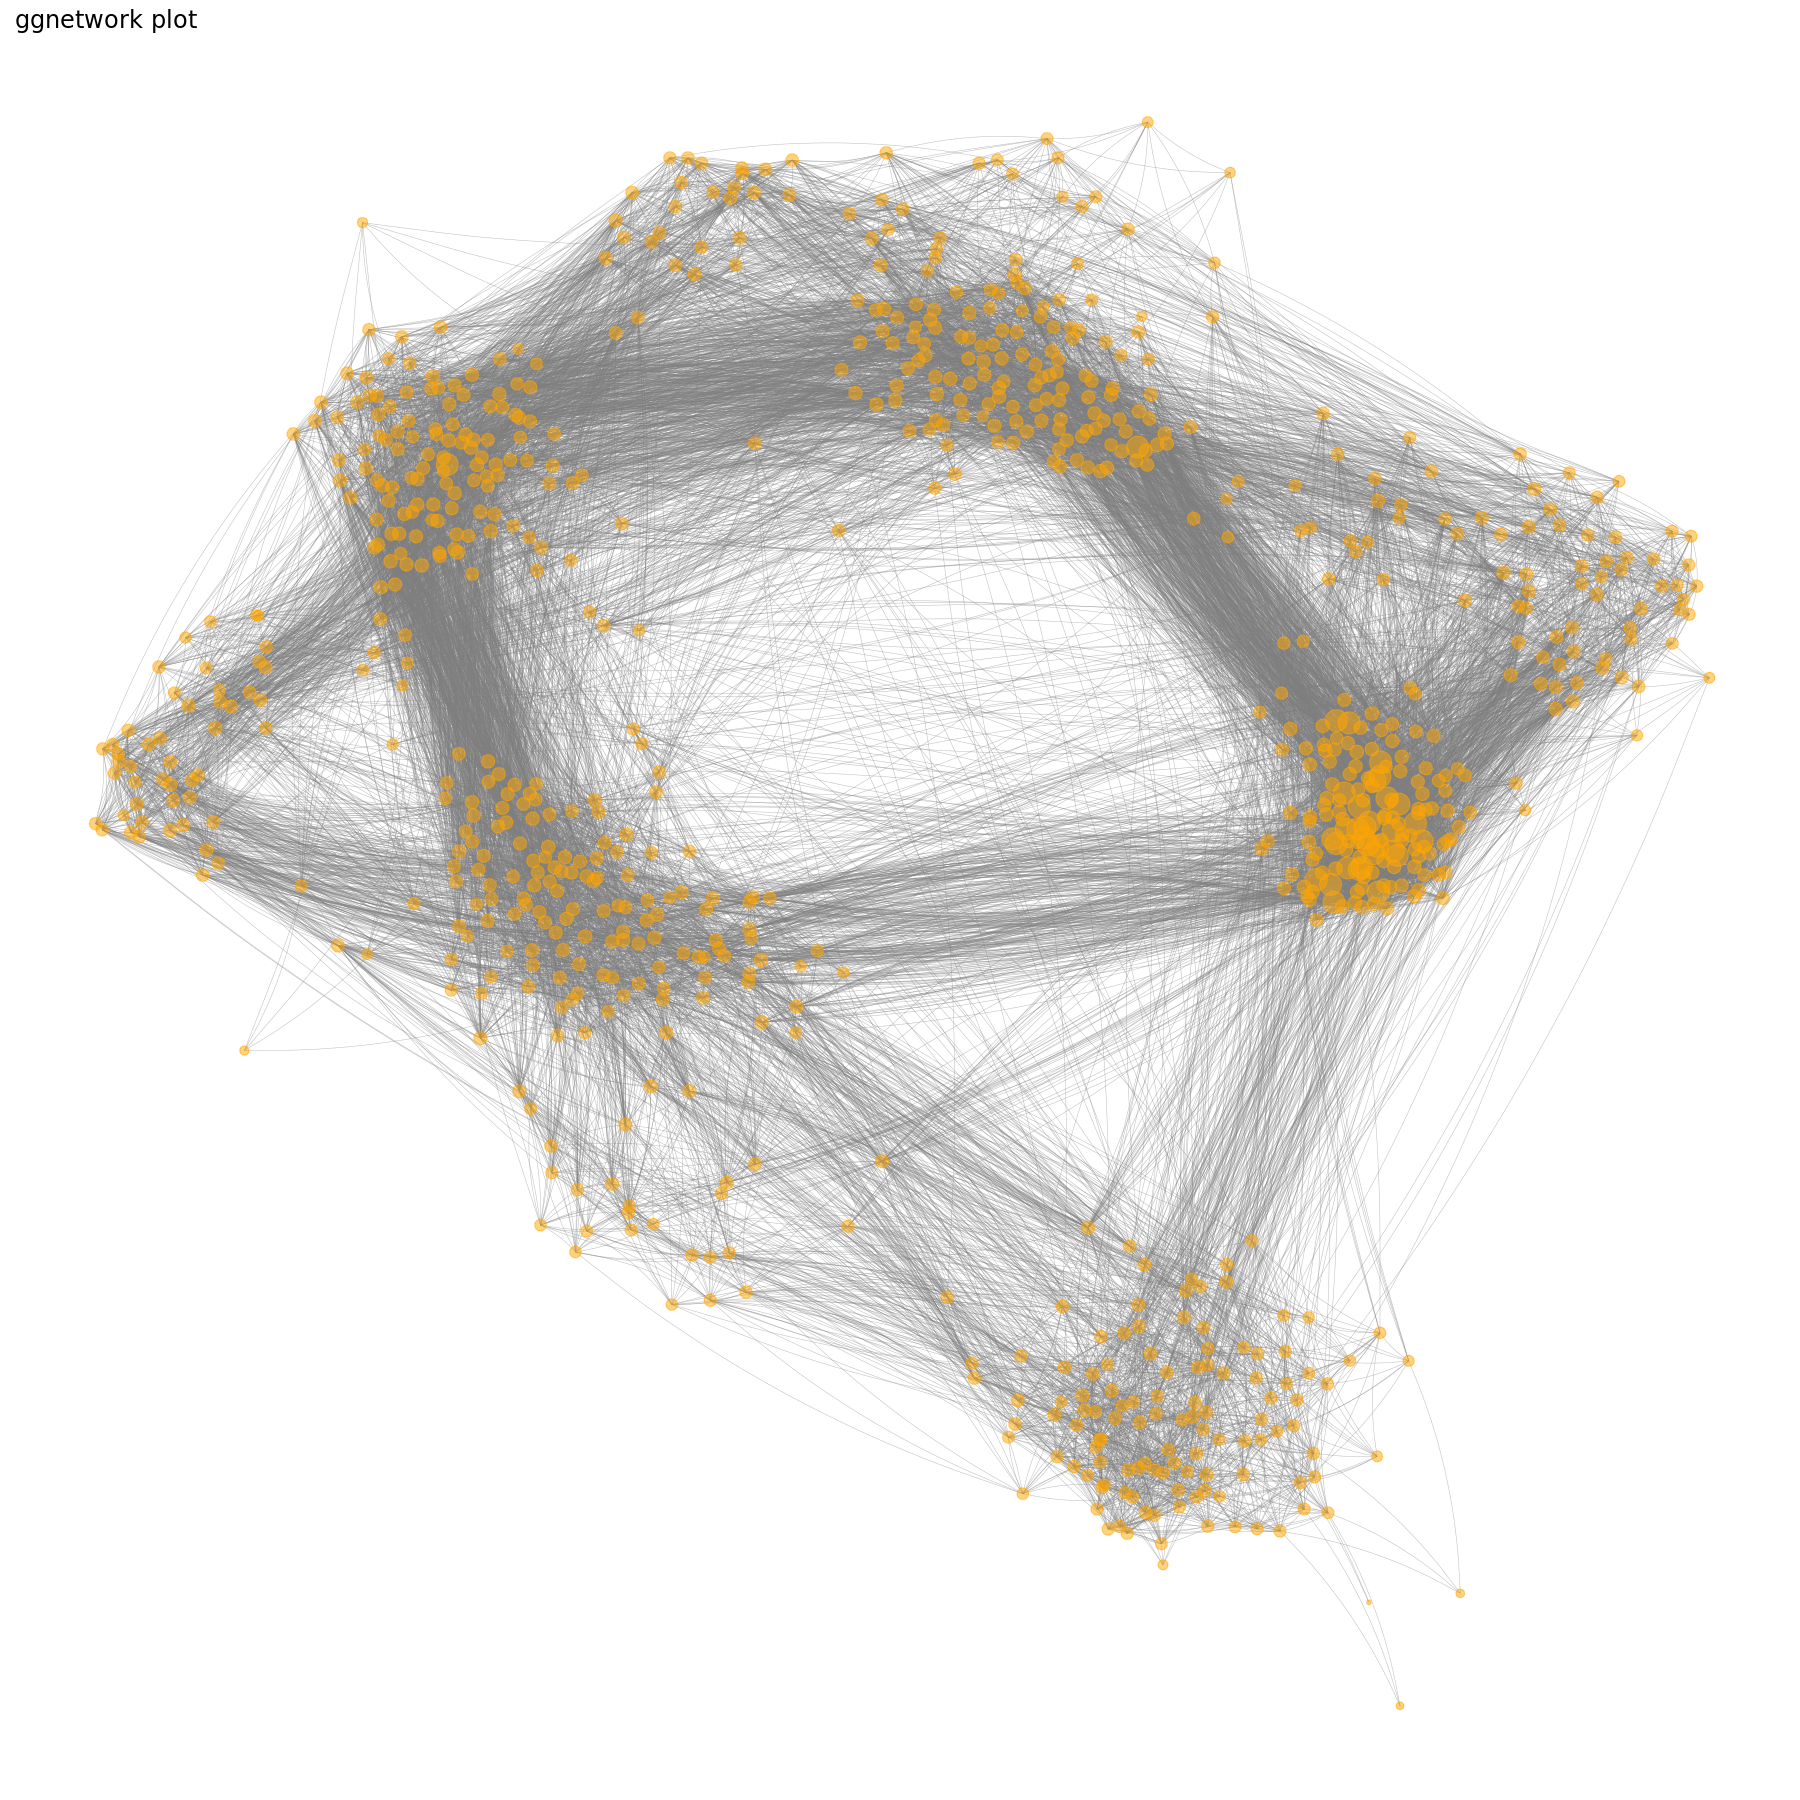

In [274]:
library(igraph)       
library(ggnetwork)     # devtools::install_github("briatte/ggnetwork")
library(ggrepel)
g2 <- igraph::simplify(g)
set.seed(1492)
df <- ggnetwork(g2, layout=with_fr(), arrow.gap=0) 
ggplot() +
  geom_edges(data=df, 
             aes(x=x, y=y, xend=xend, yend=yend),
             color="grey50", curvature=0.1, size=0.15, alpha=1/2) +
  geom_nodes(data=df,
             aes(x=x, y=y, xend=xend, yend=yend, size=size),
             alpha=1/2, color="orange") +
  theme_blank() +
  theme(legend.position="none") +
    labs(title="ggnetwork plot")-> gg
gg

In [278]:
ggplot() +
  geom_edges(data=df, 
             aes(x=x, y=y, xend=xend, yend=yend),
             color="grey50", curvature=0.1, size=0.15, alpha=1/2) +
  geom_nodes(data=df,
             aes(x=x, y=y, xend=xend, yend=yend, size=size),
             alpha=1/2) +
  theme_blank() +
  theme(legend.position="none") +
    labs(title="ggnetwork plot")-> gg3

gg3 +
    geom_nodes(data=df,
             aes(x=x, y=y, xend=xend, yend=yend, size=size),
             alpha=1/2, color=colors[V(g)$cluster]) +
    labs(title="ggnetwork community structure")-> gg4
gg4


Warning message:
“Ignoring unknown aesthetics: xend, yend”
Warning message:
“Ignoring unknown aesthetics: xend, yend”


In [41]:
# # generate colors based on cluster
# colors <- colorRampPalette(RColorBrewer::brewer.pal(11,"Spectral"))(length(clustering))
# V(g)$color <- colors[V(g)$cluster]
# V(g)$label.color <- ifelse(V(g)$group=="other",colors[V(g)$cluster],"black")
# V(g)$frame.color <- "NA"

# # # set node and label size based on group, highlight specific TFs
# # V(g)$size <- ifelse(V(g)$group=="other",2,3)
# # V(g)$label.cex <- ifelse(V(g)$group=="other",.8,1.2)

# # set node and label size based on group, only show texterm-specific and common TFs
# V(g)$size <- ifelse(V(g)$group %in% c("other","TRM"),1,3)
# V(g)$label.cex <- ifelse(V(g)$group%in% c("other","TRM"),NA,0.8)
# V(g)$label <- ifelse(V(g)$group %in% c("other","TRM"),NA,V(g)$name)


# # set distance of label
# V(g)$label.dist <- 0.4

# # set edge color
# E(g)$color <- "gray80"
# E(g)$size <- 0.1
# E(g)$lty <- 2

# # only show edges that involve texterm-specific and common TFs
# # lty=0 means that the edge won't be shown, default is 1
# # it takes 30s
# E(g)$lty <- unlist(lapply(E(g), function(x) {
#     ifelse(V(g)$group[V(g)$name == ends(g, x)[1]]%in% c("other","TRM") | V(g)$group[V(g)$name == ends(g, x)[2]]%in% c("other","TRM"), 0, 1)
# }))

# ## set the within-module edges to some large weight, and the between module edges to some small weight
# ## and then choose 'layout_with_fr' to make the grouped layout 
# edge.weights <- function(community, network, weight.within = 100, weight.between = 1) {
#     bridges <- crossing(communities = community, graph = network)
#     weights <- ifelse(test = bridges, yes = weight.between, no = weight.within)
#     return(weights) 
# }
# E(g)$weight <- edge.weights(clustering, g)

In [88]:
x = E(g)[10]
x
V(g)$group[V(g)$name == ends(g, x)[1]]%in% c("other","TRM") & V(g)$group[V(g)$name == ends(g, x)[2]]%in% c("other","TRM")

+ 1/21073 edge from 3c24a5a (vertex names):
[1] Arid3a--Arid3c

[1] FALSE

In [ ]:
CrossEdges = which(sapply(E(net), function(x) {
    length(unique(V(net)[ends(net, x)]$group_flag)) != 1 }))
SUB = subgraph.edges(net, CrossEdges)

plot(SUB, vertex.color=V(SUB)$group_flag+1)

In [22]:
## write graph to object
# saveRDS(g, "g.rds")

In [4]:
readRDS("g.rds")

IGRAPH 3c24a5a UNW- 872 21073 -- 
+ attr: name (v/c), group (v/c), cluster (v/n), color (v/c),
| label.color (v/c), frame.color (v/c), size (v/n), label.cex (v/n),
| label.dist (v/n), corr (e/n), color (e/c), weight (e/n)
+ edges from 3c24a5a (vertex names):
 [1] Alx1  --Alx4   Alx1  --Arid2  Arid3a--Ahctf1 Arid3a--Alx1   Arid3a--Arid2 
 [6] Arid2 --Arid3b Arid3a--Arid3b Alx1  --Arid3c Alx4  --Arid3c Arid3a--Arid3c
[11] Arid3b--Arid3c Ahctf1--Arid5a Arid3b--Arid5a Arid3c--Arid5a Ahctf1--Arid5b
[16] Ar    --Arid5b Arnt  --Arntl  Alx1  --Arx    Alx4  --Arx    Arid3c--Arx   
[21] Ascl1 --Ascl2  Ahr   --Atf1   Atf1  --Atf2   Atf3  --Atf2   Atf4  --Atf2  
[26] Atf4  --Atf3   Atf1  --Atf6   Atf3  --Atf6   Atf6  --Atf6b  Arnt  --Atf7  
+ ... omitted several edges

In [52]:
## 1: community in single plot
set.seed(100)
# options(repr.plot.width=15, repr.plot.height=15)
# pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,".pdf"), width = 15, height = 15)
pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_Texterm_specific_TFs.pdf"), width = 15, height = 15)

plot(g, layout=layout_with_fr,
     mark.groups = lapply(unique(V(g)$cluster), function(x) V(g)[V(g)$cluster == x]), 
     mark.col = paste0(colors,'7f'), 
     mark.border = colors)
dev.off()

png 
  2

In [10]:
clustering$quality

[1] 0.6493317

In [26]:
## 2: contract the communities
g2 = contract(g, membership(clustering))
summary(g2)

IGRAPH 0e21bec UNW- 11 21073 -- 
+ attr: name (v/x), corr (e/n), color (e/c), weight (e/n)


In [27]:
# generate colors based on cluster
colors <- colorRampPalette(RColorBrewer::brewer.pal(11,"Spectral"))(length(clustering))
V(g2)$color <- colors
V(g2)$label <- seq_along(clustering)
V(g2)$label.cex <- 2
V(g2)$size <- 25

# set edge color
E(g2)$color <- "gray80"
pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_contract.pdf"), width = 5, height = 5)
plot(g2)
dev.off()

png 
  2

In [126]:
## 3: individual community
set.seed(100)
idx <- 4
TF <- "Zscan20"
gc_1 <- induced.subgraph(g,clustering[[idx]])
V(gc_1)$size <- ifelse(V(gc_1)$group == "other",3,ifelse(V(gc_1)$group == "TexTerm", 9, 15))
V(gc_1)$label.cex <- ifelse(V(gc_1)$group == "other",NA,ifelse(V(gc_1)$group == "TexTerm", 0.6, 1))
V(gc_1)$label.dist <- 0.4
E(gc_1)$lty <- 1
# V(gc_1)$frame.color <- "black"
# V(gc_1)$label.color <- "black"
# V(gc_1)$label.cex <- ifelse(V(gc_1)$group=="other",0.4,1)
# # V(gc_1)$color <- ifelse(V(gc_1)$name==TF,paste0(V(gc_1)$color,'7f'),V(gc_1)$color)

E(gc_1)$color <- "gray90"
E(gc_1)$size <- 0.05



pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_sub",idx,"_",TF,".pdf"), width = 5, height = 5)
plot(gc_1)
dev.off()

png 
  2

In [127]:
## 3: individual community
set.seed(100)
idx <- 3
TF <- "Nfil3"
gc_1 <- induced.subgraph(g,clustering[[idx]])
V(gc_1)$size <- ifelse(V(gc_1)$group == "other",3,ifelse(V(gc_1)$group == "TexTerm", 9, 15))
V(gc_1)$label.cex <- ifelse(V(gc_1)$group == "other",NA,ifelse(V(gc_1)$group == "TexTerm", 0.6, 1))
V(gc_1)$label.dist <- 0.4
E(gc_1)$lty <- 1
# V(gc_1)$frame.color <- "black"
# V(gc_1)$label.color <- "black"
# V(gc_1)$label.cex <- ifelse(V(gc_1)$group=="other",0.4,1)
# # V(gc_1)$color <- ifelse(V(gc_1)$name==TF,paste0(V(gc_1)$color,'7f'),V(gc_1)$color)

E(gc_1)$color <- "gray90"
E(gc_1)$size <- 0.05

pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_sub",idx,"_",TF,".pdf"), width = 5, height = 5)
plot(gc_1)
dev.off()

png 
  2

In [128]:
## 3: individual community
set.seed(100)
idx <- 2
TF <- "Jdp2"
gc_1 <- induced.subgraph(g,clustering[[idx]])
V(gc_1)$size <- ifelse(V(gc_1)$group == "other",3,ifelse(V(gc_1)$group == "TexTerm", 9, 15))
V(gc_1)$label.cex <- ifelse(V(gc_1)$group == "other",NA,ifelse(V(gc_1)$group == "TexTerm", 0.6, 1))
V(gc_1)$label.dist <- 0.4
E(gc_1)$lty <- 1
# V(gc_1)$frame.color <- "black"
# V(gc_1)$label.color <- "black"
# V(gc_1)$label.cex <- ifelse(V(gc_1)$group=="other",0.4,1)
# # V(gc_1)$color <- ifelse(V(gc_1)$name==TF,paste0(V(gc_1)$color,'7f'),V(gc_1)$color)

E(gc_1)$color <- "gray90"
E(gc_1)$size <- 0.05

pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_sub",idx,"_",TF,".pdf"), width = 5, height = 5)
plot(gc_1)
dev.off()


png 
  2

In [ ]:
idx <- 7
TF <- "Zscan20"
gc_1 <- induced.subgraph(g,clustering[[idx]])
V(gc_1)$size <- 25
V(gc_1)$frame.color <- "black"
V(gc_1)$label.color <- "black"
V(gc_1)$label.cex <- ifelse(V(gc_1)$group=="other",0.2,0.7)
# V(gc_1)$color <- ifelse(V(gc_1)$name==TF,paste0(V(gc_1)$color,'7f'),V(gc_1)$color)
E(gc_1)$color <- "gray65"

pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_sub",idx,"_",TF,".pdf"), width = 5, height = 5)
plot(gc_1)
dev.off()

In [34]:
summary(gc_1)

IGRAPH 700ecf1 UNW- 52 547 -- 
+ attr: name (v/c), group (v/c), cluster (v/n), color (v/c),
| label.color (v/c), frame.color (v/c), size (v/n), label.cex (v/n),
| label.dist (v/n), corr (e/n), color (e/c), weight (e/n)


# second-round clustering

In [278]:
# Leiden clustering
set.seed(123)
clustering = cluster_leiden(gc_1, objective_function="modularity",resolution_parameter=1)
print(clustering)
print(sizes(clustering))
print(paste0('modularity:',modularity(gc_1, membership(clustering))))

IGRAPH clustering leiden, groups: 3, mod: NA
+ groups:
  $`1`
   [1] "Prdm1"   "Batf3"   "Bbx"     "Fezf1"   "Fezf2"   "Gata3"   "Hdx"    
   [8] "Hbp1"    "Irf1"    "Irf2"    "Irf3"    "Irf5"    "Irf7"    "Irf9"   
  [15] "Lef1"    "Mef2c"   "Prdm6"   "Six1"    "Six2"    "Sox1"    "Sox17"  
  [22] "Sox2"    "Sox3"    "Sox4"    "Sox6"    "Stat1"   "Stat5a"  "Stat5b" 
  [29] "Stat2"   "Tcf7"    "Tcf7l2"  "Zfp24"   "Zfp384"  "Zfp422"  "Zfp90"  
  [36] "Nkx3.1"  "Zkscan2" "Zzz3"   
  
  $`2`
   [1] "Rel"     "Zscan20" "Batf"    "Nfatc1"  "Eomes"   "Cbfb"    "Dmrtb1" 
  + ... omitted several groups/vertices
Community sizes
 1  2  3 
38 39 23 
[1] "modularity:0.210190664595827"


In [279]:
## write clustering results
clust <- data.frame(name = names(membership(clustering)),cluster = as.numeric(membership(clustering))) %>%
        dplyr::inner_join(nodes, by = "name") %>%
        dplyr::arrange(group, cluster)
head(clust)
write.csv(clust,paste0('clustering_sub4_membership_copula_',func,'_res',res,'_s',sparsity,'.csv'), row.names=F)


name  cluster group 
1 Prdm1 1       common
2 Batf3 1       other 
3 Bbx   1       other 
4 Fezf1 1       other 
5 Fezf2 1       other 
6 Gata3 1       other

In [280]:
createDir(paste0("GO/cluster_sub4_copula_",func,"_res",res,"_s", sparsity))
clust <- read.csv(paste0("../../clustering_sub4_membership_copula_",func,"_res",res,"_s", sparsity,".csv"))

get_GO <- function(x){
    TF <- clust[clust$cluster==x,"name"]
    file <- paste0("c",x,".txt")
    writeLines(TF, file)
    gsea(file)
}

lapply(1:length(unique(clust$cluster)), get_GO)


[1] "/stg2/data1/cong/Taiji/mouse_immune/mouse11_allcombn/output/Network/TexTerm_Beltra/GO/cluster_sub4_copula_shrinkage_res1.8_s0.05"


'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

# TRM test

In [5]:
sparsity <- '0.05' 
func <- 'shrinkage' 
res <- '1.8'
sample <- "TRM"
precision_fl <- paste0("precision_copula_",func,"_sparsity_",sparsity,".csv")
m <- read.table(precision_fl, row.names = 1, sep = ",", header = T)

In [6]:
df <- data.frame(row=rownames(m)[row(m)[upper.tri(m)]], 
                 col=colnames(m)[col(m)[upper.tri(m)]], 
                 corr=m[upper.tri(m)])
### remove zero entries
df <- df[df$corr!=0,]
head(df)
dim(df)
print(paste('percent of correlation score >','0',':',sum(df$corr > 0) *100 / nrow(df),"%"))
print(paste('percent of correlation score <','0',':',sum(df$corr < 0) *100 / nrow(df),"%"))


row    col    corr       
14 Alx1   Alx4   -0.23851517
25 Alx1   Arid2  -0.07121393
44 Arid2  Arid3b -0.11299523
49 Alx1   Arid3c -0.06249132
51 Alx4   Arid3c -0.01231791
54 Arid3a Arid3c -0.34627399

[1] 21592     3

[1] "percent of correlation score > 0 : 2.87606520933679 %"
[1] "percent of correlation score < 0 : 97.1239347906632 %"


In [34]:
# create vertices meta dataframe
files <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/regulatees/', c('_TexTerm_P005_F05_L58_single.txt','_TRM_P005_F05_L44_single.txt'))
file <- files[grepl(sample,files)]
print(file)
specific_TF <- readLines(file)
exp_TF <- c("Nfil3","Jdp2","Prdm1","Zscan20")
other_specific <- setdiff(specific_TF, exp_TF)
TF <- unique(union(df$row, df$col))
other_TF = setdiff(TF, union(specific_TF,exp_TF))

nodes <- rbind(data.frame(name = exp_TF, group = 'valid'),
               data.frame(name = other_specific, group = sample),
               data.frame(name = other_TF, group = 'other'))
head(nodes)
dim(nodes)    

[1] "/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/regulatees/_TRM_P005_F05_L44_single.txt"


name    group
1 Nfil3   valid
2 Jdp2    valid
3 Prdm1   valid
4 Zscan20 valid
5 Etv3    TRM  
6 Zfp341  TRM

[1] 872   2

In [35]:
unique(nodes$name) %>% length
length(TF)

[1] 872

[1] 872

In [31]:
g = graph_from_data_frame(df, directed=FALSE, vertices = nodes)
print(g, e=TRUE, v=TRUE)


ERROR: Error in graph_from_data_frame(df, directed = FALSE, vertices = nodes): Duplicate vertex names


# regulatee analysis

In [281]:
sample <- "TRM"
# sample <- "TexTerm"
maindir <- paste0('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/',sample)
setwd(maindir)

In [282]:
# import network
tag <- "subset_TFs"
# dt <- read.csv(paste0("mean_",sample,"_edge_weight.csv"), row.names = 1)
dt <- read.csv(paste0("mean_",sample,"_edge_weight_",tag,".csv"), row.names = 1)


In [283]:
sum(grepl("MOUSE$|[0-9\\.]{6}$", rownames(dt)))

[1] 213

In [284]:
rownames(dt) <- firstUp(rownames(dt))
colnames(dt) <- firstUp(colnames(dt))
head(dt)
dim(dt)

Ahr       Arnt     Arntl    Atf1     Atf2     Atf3     Atf4    
0610005c13rik 0.0000000 5.975511 6.381163 5.022280 6.747390 1.266362 0.000000
0610007p14rik 0.0000000 4.167121 3.535061 4.735810 4.749356 1.189874 0.000000
0610009b22rik 0.4264933 5.945785 5.635031 7.543411 9.927795 1.321914 8.794489
0610009e02rik 0.0000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
0610009l18rik 0.0000000 6.158894 5.560441 6.085988 9.713248 1.449755 0.000000
0610009o20rik 0.0000000 4.338419 5.924785 5.442499 0.000000 2.146178 0.000000
              Atf7      Batf      Bbx      ⋯ Zfp287   Zfp335   Zfp341  
0610005c13rik  6.724229  0.000000 2.389105 ⋯ 5.153568 0.000000 1.770007
0610007p14rik  4.766010 11.851958 0.000000 ⋯ 0.000000 3.227020 1.965665
0610009b22rik 10.223460  6.968299 2.749225 ⋯ 0.000000 0.000000 2.870961
0610009e02rik  0.000000  0.000000 0.000000 ⋯ 0.000000 0.000000 1.860930
0610009l18rik  9.118931  9.105332 2.900007 ⋯ 0.000000 2.712204 3.361033
0610009o20rik  0.000000  8.901524 2.389150 ⋯ 8.481504 3.339015 2.068304
              Zfp398   Zfp422   Zfp566   Zfp64    Zfp692   Zfp740   Zfx      
0610005c13rik 1.813868 0.000000 2.034332 0.000000 2.709812 0.000000  5.127461
0610007p14rik 3.507096 0.000000 2.238249 1.483430 0.000000 0.000000  6.214851
0610009b22rik 0.000000 0.000000 3.071097 2.309261 3.475728 9.095212  8.836642
0610009e02rik 0.000000 0.000000 1.476158 0.000000 0.000000 0.000000  2.394368
0610009l18rik 2.862971 3.433827 5.514416 5.171339 3.327339 8.701555 10.515600
0610009o20rik 3.242943 5.689882 2.197942 3.144889 2.793895 0.000000  8.201577

[1] 20214   161

In [285]:
# read clustering result
clust <- read.csv(paste0("clustering_membership_copula_",func,"_res",res,"_s", sparsity,"_",tag,".csv"))
head(clust)
dim(clust)

name  cluster group
1 Nr4a2 1       both 
2 Foxn3 1       both 
3 Junb  1       both 
4 Nr4a3 1       both 
5 Nr4a1 1       both 
6 Fosl2 1       both

[1] 161   3

In [286]:
# add gene expression value
rna <- read.table("../../../RNASeq/expression_profile.tsv", check.names = F) 
# L <- c("TexTerm_Beltra_Chung","TexTerm_Beltra","TexTerm_Hudson_Beltra","TexTerm_Hudson")
L <- readLines(paste0(sample,".txt"))
rna <- rna[,L]
head(rna)
dim(rna)

TRM_IEL_1 TRM_IEL_2 TRM_IEL_3 TRM_IEL_4 TRM_liver
Ubl5          440.35    512.67    512.67    440.35    432.96   
Gm38348         0.00      0.00      0.00      0.00      0.00   
E330014E10Rik   0.00      0.00      0.00      0.00      0.00   
Ttc32           7.43      5.23      5.23      7.43     12.99   
Gm14719         0.00      0.00      0.00      0.00      0.00   
1700037H04Rik  22.03     15.42     15.42     22.03     21.75

[1] 46401     5

In [287]:
# function: extract community's regulatees
# only keep those with non-zero edge weight and non-zero expression values
# the output is csv file sorted by edge weight
extract_community_regulatees <- function(c,tag=''){
    # get edge weight
    TFs <- intersect(names(dt), clust[clust$cluster==c,"name"])
    dt2 <- dt[,TFs]
    dt3 <- as.data.frame(rowMeans(dt2))
    names(dt3) <- "mean.edge.weight"
    dt3 <- dt3 %>% arrange(-mean.edge.weight) %>% tibble::rownames_to_column("name")
    
    # get expression
    dt4 <- as.data.frame(rowMeans(rna))
    names(dt4) <- "mean.gene.expression"
    dt4 <- dt4 %>% tibble::rownames_to_column("name")
    
    # combine and write result
    dt3 <- dt3 %>% inner_join(dt4, by = "name") %>% filter(mean.edge.weight!=0 & mean.gene.expression !=0)
    write.csv(dt3, paste0("c",c,"_community_regulatees_edge_weight_gene_expression",tag,".csv"), row.names=F)  

}

In [288]:
tmp <- lapply(unique(clust$cluster), function(x) extract_community_regulatees(c=x, tag=paste0('_',tag)))

In [289]:
# get pre-ranked list sort by edge weight
get_pre_ranked_list <- function(c, tag=''){
    fl <- paste0("c",c,"_community_regulatees_edge_weight_gene_expression",tag,".csv")
    output_fl <- paste0("c",c,"_community_regulatees_edge_weight",tag,".csv")
    read.table(fl, header=T, sep=",") %>% select(c("name", "mean.edge.weight")) %>%
        arrange(-mean.edge.weight) %>% write.csv(output_fl, row.names=F)  
}

In [290]:
tmp <- lapply(unique(clust$cluster), function(x) get_pre_ranked_list(c=x, tag=paste0('_',tag)))

In [291]:
# get pre-ranked list sort by gene expression
get_pre_ranked_list <- function(c, tag=''){
    fl <- paste0("c",c,"_community_regulatees_edge_weight_gene_expression",tag,".csv")
    output_fl <- paste0("c",c,"_community_regulatees_gene_expression",tag,".csv")
    read.table(fl, header=T, sep=",") %>% select(c("name", "mean.gene.expression")) %>%
        arrange(-mean.gene.expression) %>% write.csv(output_fl, row.names=F)  
}

In [292]:
tmp <- lapply(unique(clust$cluster), function(x) get_pre_ranked_list(c=x, tag=paste0('_',tag)))

In [188]:
# extract community's regulatees
c <- 4
dt2 <- dt[,clust[clust$cluster==c,"name"]]
head(dt2)
dim(dt2)

ERROR: Error in `[.data.frame`(dt, , clust[clust$cluster == c, "name"]): undefined columns selected


In [176]:
dt3 <- as.data.frame(rowMeans(dt2))
names(dt3) <- "mean.edge.weight"
dt3 <- dt3 %>% arrange(-mean.edge.weight) %>% tibble::rownames_to_column("name")
head(dt3)

name   mean.edge.weight
1 Dnmt3a 5.221575        
2 Nab1   4.970797        
3 Hmgb1  4.900393        
4 Ywhaz  4.672415        
5 Syngr2 4.664986        
6 Nfyb   4.599487

In [152]:
# add gene expression value
rna <- read.table("../../RNASeq/expression_profile.tsv", check.names = F) 
L <- c("TexTerm_Beltra_Chung","TexTerm_Beltra","TexTerm_Hudson_Beltra","TexTerm_Hudson")
rna <- rna[,L]
head(rna)
dim(rna)

TexTerm_Beltra_Chung TexTerm_Beltra TexTerm_Hudson_Beltra
Ubl5          411.92               411.92         379.32               
Gm38348         0.00                 0.00           0.00               
E330014E10Rik   0.00                 0.00           0.00               
Ttc32           9.49                 9.49           9.37               
Gm14719         0.77                 0.77           1.79               
1700037H04Rik  33.52                33.52          40.03               
              TexTerm_Hudson
Ubl5          379.32        
Gm38348         0.00        
E330014E10Rik   0.00        
Ttc32           9.37        
Gm14719         1.79        
1700037H04Rik  40.03

[1] 46401     4

In [171]:
dt4 <- as.data.frame(rowMeans(rna))
names(dt4) <- "mean.gene.expression"
dt4 <- dt4 %>% tibble::rownames_to_column("name")
head(dt4)
dim(dt4)

name          mean.gene.expression
1 Ubl5          395.620             
2 Gm38348         0.000             
3 E330014E10Rik   0.000             
4 Ttc32           9.430             
5 Gm14719         1.280             
6 1700037H04Rik  36.775

[1] 46401     2

In [ ]:
dt3 <- dt3 %>% inner_join(dt4, by = "name") %>% filter(mean.edge.weight!=0 & mean.gene.expression !=0)
head(dt3)
dim(dt3)

In [179]:
write.csv(dt3, paste0("c",c,"_community_regulatees_edge_weight_gene_expression.csv"), row.names=F)

In [36]:
## import network
read_plus <- function(x,regulators){

    dt <- fread(x)
    dt <- dt[,":TYPE":=NULL]    
    names(dt) <- c("regulators","regulatees", "edge.weight")
    dt <- dt[edge.weight>=1,] # filter based on weight
    dt[[1]] <- firstUp(dt[[1]])
    dt[[2]] <- firstUp(dt[[2]]) 
    dt <- dt[regulators %in% regulators]
    return(dt)

}

In [41]:
# TexTerm regulatees
getwd()
regulators <- readLines("GO/cluster_copula_shrinkage_res1.8_s0.05/c3.txt")
# regulators <- readLines("GO/cluster_copula_shrinkage_res1.8_s0.05/c4.txt")

dt <- read_plus("edges_combined.csv",regulators = regulators)

[1] "/stg2/data1/cong/Taiji/mouse_immune/mouse11_allcombn/output/Network/TexTerm_Beltra_Chung"

In [42]:
head(dt)
dim(dt)

regulators regulatees edge.weight
1 Ahctf1     Ubl5        2.292533  
2 Atf1       Ubl5        7.910758  
3 Atf2       Ubl5       18.744594  
4 Atf7       Ubl5        9.327227  
5 Bcl6       Ubl5        8.933990  
6 Creb1      Ubl5       21.362160

[1] 1196303       3

In [43]:
dt[regulators == "Nfil3",regulatees] %>% writeLines(con="Nfil3_regulatees_all.txt")
writeLines(unique(dt$regulatees), "c3_regulatee_all.txt")

In [39]:
dt[regulators == "Prdm1",regulatees] %>% writeLines(con="Prdm1_regulatees_all.txt")
writeLines(unique(dt$regulatees), "c4_regulatee_all.txt")

In [44]:
# TRM regulatees
regulators2 <- readLines("../TRM_IEL_2/GO/cluster_copula_skeptic_res1.8_s0.05/c3.txt")
dt2 <- read_plus("../TRM_IEL_2/edges_combined.csv",regulators = regulators2)
dt2[regulators == "Nfil3",regulatees] %>% writeLines(con="../TRM_IEL_2/Nfil3_regulatees_all.txt")
writeLines(unique(dt2$regulatees), "../TRM_IEL_2/c3_regulatee_all.txt")

In [340]:
# Prdm1 community
regulators2 <- readLines("../TRM_IEL_2/GO/cluster_copula_skeptic_res1.8_s0.05/c4.txt")
dt2 <- read_plus("../TRM_IEL_2/edges_combined.csv",regulators = regulators2)
dt2[regulators == "Prdm1",regulatees] %>% writeLines(con="../TRM_IEL_2/Prdm1_regulatees_all.txt")
writeLines(unique(dt2$regulatees), "../TRM_IEL_2/c4_regulatee_all.txt")

## TRM vs TexTerm comparison

In [192]:
source('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/scripts/function/plotVenn.r')

In [49]:
compare_community_regulatee <- function(TF,cluster,sample){
    regulatees1 <- readLines(paste0(TF,"_regulatees_all.txt"))
    regulatees2 <- readLines(paste0("../TRM_IEL_2/",TF,"_regulatees_all.txt"))
    mylist <- list("TexTerm"=regulatees1,"TRM"=regulatees2)
    venn_specific_TFs(mylist, add.text = T, group = paste0(TF,"_regulatee_",sample,"_vs_TRM_IEL_2"), partition.list = T)
    # GO analysis on partitioned lists
    fl <- list.files(pattern = paste0("gL_",TF,"_regulatee_",sample,"_vs_TRM_IEL_2.*txt"))
    lapply(fl, gsea)
    # all cluster regulatee
    regulatees1 <- readLines(paste0("c",cluster,"_regulatee_all.txt"))
    regulatees2 <- readLines(paste0("../TRM_IEL_2/c",cluster,"_regulatee_all.txt"))
    mylist <- list("TexTerm"=regulatees1,"TRM"=regulatees2)
    venn_specific_TFs(mylist, add.text = T, group = paste0("c",cluster,"_regulatee_",sample,"_vs_TRM_IEL_2"), partition.list = T)
    fl <- list.files(pattern = paste0("gL_c",cluster,"_regulatee_",sample,"_vs_TRM_IEL_2.*txt"))
    lapply(fl, gsea)

}

In [54]:
compare_community_regulatee(TF = "Prdm1", cluster = 4, sample = "TexTerm_Beltra_Chung")

Warning message in RColorBrewer::brewer.pal(length(mylist), "Pastel2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”
'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

Warning message in RColorBrewer::brewer.pal(length(mylist), "Pastel2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”
'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

In [ ]:
compare_community_regulatee(TF = "Nfil3", cluster = 3, sample = "TexTerm_Beltra_Chung")

Warning message in RColorBrewer::brewer.pal(length(mylist), "Pastel2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”
'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

Warning message in RColorBrewer::brewer.pal(length(mylist), "Pastel2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”
'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



In [334]:
# Nfil3 regulatee
# venn diagram

regulatees1 <- readLines("Nfil3_regulatees_all.txt")
regulatees2 <- readLines("../TRM_IEL_2/Nfil3_regulatees_all.txt")
mylist <- list("TexTerm"=regulatees1,"TRM"=regulatees2)
venn_specific_TFs(mylist, add.text = T, group = "Nfil3_regulatee_TexTerm_Beltra_vs_TRM_IEL_2", partition.list = T)

Warning message in RColorBrewer::brewer.pal(length(mylist), "Pastel2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


png 
  2

In [335]:
# GO analysis on partitioned lists
fl <- list.files(pattern = "gL_Nfil3_regulatee_TexTerm_Beltra_vs_TRM_IEL_2.*txt")
lapply(fl, gsea)

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

In [336]:
# all c3 regulatee
regulatees1 <- readLines("c3_regulatee_all.txt")
regulatees2 <- readLines("../TRM_IEL_2/c3_regulatee_all.txt")
mylist <- list("TexTerm"=regulatees1,"TRM"=regulatees2)
venn_specific_TFs(mylist, add.text = T, group = "c3_regulatee_TexTerm_Beltra_vs_TRM_IEL_2", partition.list = T)
fl <- list.files(pattern = "gL_c3_regulatee_TexTerm_Beltra_vs_TRM_IEL_2.*txt")
lapply(fl, gsea)


Warning message in RColorBrewer::brewer.pal(length(mylist), "Pastel2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


png 
  2

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

In [350]:
# venn diagram of community members
regulatees1 <- readLines("GO/cluster_copula_shrinkage_res1.8_s0.05/c3.txt")
regulatees2 <- readLines("../TRM_IEL_2/GO/cluster_copula_skeptic_res1.8_s0.05/c3.txt")
mylist <- list("TexTerm"=regulatees1,"TRM"=regulatees2)
venn_specific_TFs(mylist, add.text = T, group = "c3_community_TexTerm_Beltra_vs_TRM_IEL_2", partition.list = T)

Warning message in RColorBrewer::brewer.pal(length(mylist), "Pastel2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


png 
  2

In [351]:
# venn diagram of community members
regulatees1 <- readLines("GO/cluster_copula_shrinkage_res1.8_s0.05/c4.txt")
regulatees2 <- readLines("../TRM_IEL_2/GO/cluster_copula_skeptic_res1.8_s0.05/c4.txt")
mylist <- list("TexTerm"=regulatees1,"TRM"=regulatees2)
venn_specific_TFs(mylist, add.text = T, group = "c4_community_TexTerm_Beltra_vs_TRM_IEL_2", partition.list = T)

Warning message in RColorBrewer::brewer.pal(length(mylist), "Pastel2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


png 
  2

R version 4.1.3 (2022-03-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Linux (unknown distro)

Matrix products: default
BLAS/LAPACK: /new-stg/home/cong/miniconda3/envs/r4-base/lib/libopenblasp-r0.3.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggrepel_0.9.1         ggnetwork_0.5.10      extrafont_0.18       
 [4] data.table_1.14.2     clusterProfiler_4.2.2 org.Mm.eg.db_3.14.0  
 [7] AnnotationDbi_1.56.2  IRanges_2.28.0        S4Vectors_0.32.4     
[10] Biobase_2.54.0        BiocGenerics_0.40.0   ggplot2_3.3.6    

# sub TF-TF network

In [1]:
library(dplyr)
library(igraph)
library(ggplot2)
library(data.table)
library(xlsx)

setwd('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/')
print(getwd())
source('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/scripts/function/utils.R')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




[1] "/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare"


In [2]:
tex_s <- read.xlsx('../../P005_F05_cell_state_specific.xlsx', sheetName = 'TexTerm') %>% pull(TF)
trm_s <- read.xlsx('../../P005_F05_cell_state_specific.xlsx', sheetName = 'TRM') %>% pull(TF)
tex_i <- read.xlsx('../../top_02_cell_state_important.xlsx', sheetName = 'TexTerm') %>% pull(TF)
trm_i <- read.xlsx('../../top_02_cell_state_important.xlsx', sheetName = 'TRM') %>% pull(TF)

In [3]:
candidates <- Reduce(union, list(tex_s, trm_s, tex_i, trm_i))
important_TFs <- list('TexTerm'=tex_i, 'TRM'=trm_i)
specific_TFs <- list('TexTerm'=tex_s, 'TRM'=trm_s)
length(candidates)

[1] 210

In [4]:
# test_targets <- c('Zscan20', 'Jdp2','Zfp143','Zfp324','Arid3a','Irf8','Nfatc1','Prdm4','Foxd2','Zfp410','Tfdp1','Zbtb49','Etv5','Hinfp')
# writeLines(test_targets, '../../test_targets.txt')
test_targets <- readLines('../../test_targets.txt')
known_targets <- c('Bhlhe40','Batf','Eomes','Jund','Jun','Fos','Fosb','Fosl2','Runx3')
label_targets <- union(test_targets, known_targets)
length(label_targets)

[1] 30

In [83]:
# load the overall network
sparsity = 0.05
func <- 'shrinkage'
res = 1.8
sample = 'TRM'
# sample = 'TexTerm'
colors <- c("#8AAA75", "#009051")

print("Loading graph and clustering...done")
g <- readRDS(paste0("../",sample,"/graph_",func,'_res',res,"_sparsity_",sparsity,".rds"))
clustering <- readRDS(paste0("../",sample,'/clustering_copula_',func,'_res',res,'_s',sparsity,'.rds'))

V(g)$cluster <- clustering$membership # add community info to graph
# V(g)$group <- ifelse(V(g)$name %in% specific_TFs[[sample]],sample,"other")
V(g)$group <- ifelse(V(g)$name %in% label_targets,sample,"other")


[1] "Loading graph and clustering...done"


In [84]:
print(clustering)
print(sizes(clustering))
print(paste0('modularity:',modularity(g, membership(clustering))))

IGRAPH clustering leiden, groups: 10, mod: NA
+ groups:
  $`1`
   [1] "Nfil3"   "Atf4"    "Cebpa"   "Cebpb"   "Cebpd"   "Cebpe"   "Cebpg"  
   [8] "Cxxc4"   "Crx"     "Cxxc5"   "Dmbx1"   "Gsc2"    "Kdm2b"   "Kdm2a"  
  [15] "Neurod6" "Obox1"   "Obox3"   "Obox5"   "Obox6"   "Obox7"   "Obox8"  
  [22] "Otx1"    "Otx2"    "Pitx1"   "Pitx2"   "Pitx3"   "Naif1"   "Sp100"  
  [29] "Tef"     "Tet3"   
  
  $`2`
    [1] "Jdp2"    "Prdm1"   "Hsf2"    "Pbx4"    "Atf3"    "Ar"      "Atoh1"  
    [8] "Bcl6"    "Crebzf"  "Cux1"    "Ehf"     "Elf3"    "Elf5"    "Erf"    
  + ... omitted several groups/vertices
Community sizes
  1   2   3   4   5   6   7   8   9  10 
 30 105 135  90 106  96  39  34 106 131 
[1] "modularity:0.483934376604841"


In [85]:
# generate colors based on cluster
colors <- colorRampPalette(RColorBrewer::brewer.pal(11,"Spectral"))(length(clustering))
V(g)$color <- colors[V(g)$cluster]
V(g)$frame.color <- "NA"

# # set node and label size based on group, highlight specific TFs
# V(g)$size <- ifelse(V(g)$group=="other",2,3)
# V(g)$label.cex <- ifelse(V(g)$group=="other",.8,1.2)

# set node and label size based on group, only show texterm-specific and common TFs
# V(g)$size <- ifelse(V(g)$group == "other",1,ifelse(V(g)$group == "TexTerm", 3, 5))
# V(g)$size <- ifelse(V(g)$group=="other",1.5,5)
V(g)$size <- 0.5*log2(degree(g))


## size is non-linearly proportional to node degree
# V(g)$size <- ifelse(degree(g)<=84,log10(degree(g)), log2(degree(g)))
# V(g)$label.cex <- ifelse(V(g)$group == "other",NA,ifelse(V(g)$group == "TexTerm", 1, 2))
# V(g)$label.cex <- ifelse(V(g)$group == "other",NA,1.5)
# V(g)$label.cex <- ifelse(V(g)$group == "other",NA,ifelse(V(g)$group == sample, 1, 2))
V(g)$label <- ifelse(V(g)$group == "other",NA,V(g)$name)
V(g)$label.color <- 'black'
V(g)$size <- 0.4*log2(degree(g))
V(g)$label.cex <- 0.75

# set distance of label
V(g)$label.dist <- 0.4

# set edge color
E(g)$color <- "gray80"
# E(g)$size <- 0.1
E(g)$width <- 5*(-E(g)$corr)
E(g)$lty <- 2

# # only show edges that involve texterm-specific and common TFs
# # lty=0 means that the edge won't be shown, default is 1
# # it takes 30s
# E(g)$lty <- unlist(lapply(E(g), function(x) {
#     ifelse(V(g)$group[V(g)$name == ends(g, x)[1]] == "other" | V(g)$group[V(g)$name == ends(g, x)[2]] == "other", 0, 2)
# }))

# set the within-module edges to some large weight, and the between module edges to some small weight
# and then choose 'layout_with_fr' to make the grouped layout 
edge.weights <- function(community, network, weight.within = 10, weight.between = 1) {
    bridges <- crossing(communities = community, graph = network)
    weights <- ifelse(test = bridges, yes = weight.between, no = weight.within)
    return(weights) 
}
E(g)$weight <- edge.weights(clustering, g)

In [86]:
saveRDS(g, paste0("graph_",func,'_res',res,"_sparsity_",sparsity,"_",sample,".rds"))

In [72]:
set.seed(12)
# pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_",sample,"_total_network_reduced_edges.pdf"), width = 8, height = 8)
pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_",sample,"_total_network.pdf"), width = 8, height = 8)
plot(g, layout=layout_with_fr)
dev.off()

png 
  2

In [7]:
# subset network with candidate TFs: all the specific and important TFs
# subset network with candidate TFs: only tested and known targets
# g2 <- induced_subgraph(g, candidates)
g2 <- induced_subgraph(g, label_targets)
g2

IGRAPH 55b7937 UNW- 30 54 -- 
+ attr: name (v/c), group (v/c), cluster (v/n), color (v/c),
| label.color (v/c), frame.color (v/c), size (v/n), label.cex (v/n),
| label (v/c), label.dist (v/n), corr (e/n), color (e/c), size (e/n),
| lty (e/n), weight (e/n)
+ edges from 55b7937 (vertex names):
 [1] Jdp2   --Prdm1 Zscan20--Nr4a2 Nfil3  --Fosl2 Jdp2   --Fosl2 Fosb   --Fosl2
 [6] Nfil3  --Jun   Jdp2   --Jun   Fosb   --Jun   Fosl2  --Jun   Fosb   --Fos  
[11] Fosl2  --Fos   Jun    --Fos   Fosb   --Batf  Fosl2  --Batf  Jun    --Batf 
[16] Fos    --Batf  Fosb   --Eomes Fos    --Eomes Batf   --Eomes Jun    --Foxd2
[21] Prdm1  --Gfi1  Etv5   --Hinfp Prdm1  --Irf8  Jdp2   --Jund  Zscan20--Jund 
+ ... omitted several edges

In [182]:
# color common neighbors as purple and specific as gray
colors <- colorRampPalette(RColorBrewer::brewer.pal(11,"Spectral"))(length(clustering))
V(g2)$color <- colors[V(g2)$cluster]
# V(g2)$label.color <- ifelse(V(g2)$group=="other",colors[V(g2)$cluster],"black")
V(g2)$label.color <- "black"


# V(g2)$label <- V(g2)$name
V(g2)$frame.color <- "NA"

# bold label if important, color if specific
# V(g2)$label.font <- ifelse(V(g2)$name %in% important_TFs[[sample]], 2, 1) # 2 for bold, 1 for plain
# V(g2)$label.color <- ifelse(V(g2)$name %in% specific_TFs[[sample]], colors[sample][[1]], "#000000")
# V(g2)$label <- ifelse(V(g2)$name %in% label_targets,V(g2)$name, NA)
V(g2)$label <- V(g2)$name

# V(g2)$label.color <- "black"


## size is non-linearly proportional to node degree
V(g2)$size <- 0.55*log2(degree(g2))
V(g2)$label.cex <- 0.6

# set distance of label
V(g2)$label.dist <- 0.3

# set edge color
E(g2)$color <- "gray80"
E(g2)$width <- 10*(-E(g2)$corr)
E(g2)$lty <- 2

# lty=0 means that the edge won't be shown, default is 1
# only shows the interaction between target and other neighbors
# E(g2)$lty <- unlist(lapply(E(g2), function(x) {
#     ifelse(ends(g2, x)[1] %in% label_targets | ends(g2, x)[2] %in% label_targets, 2, 0)
# }))

# #only shows the interaction between label-target
# E(g2)$lty <- unlist(lapply(E(g2), function(x) {
#     ifelse(ends(g2, x)[1] %in% label_targets & ends(g2, x)[2] %in% label_targets, 1, 0)
# }))


# set the within-module edges to some large weight, and the between module edges to some small weight
# and then choose 'layout_with_fr' to make the grouped layout 
edge.weights <- function(community, network, weight.within = 1.2, weight.between = 1) {
    bridges <- crossing(communities = community, graph = network)
    weights <- ifelse(test = bridges, yes = weight.between, no = weight.within)
    return(weights) 
}
E(g2)$weight <- edge.weights(clustering, g2)

In [183]:
set.seed(132)
# pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_",sample,"_sub_network.pdf"), width = 12, height = 12)
pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_",sample,"_sub_network_all_labels.pdf"), width = 12, height = 12)
# pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_",sample,"_sub_network_reduced_edges.pdf"), width = 12, height = 12)
plot(g2, layout=layout_with_fr)
dev.off()

png 
  2

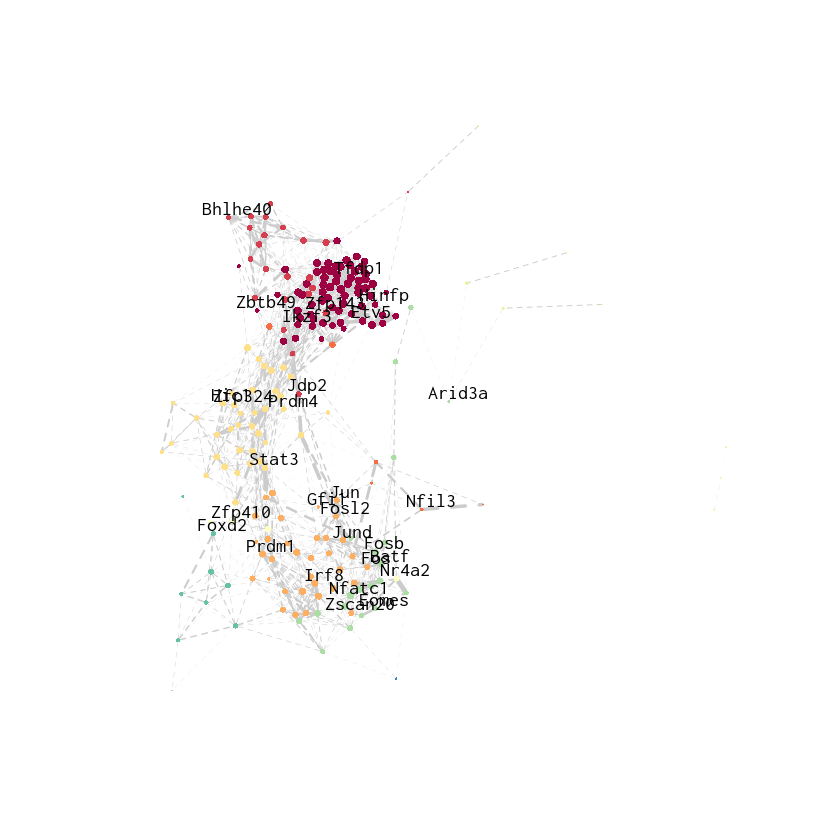

In [124]:
plot(g2)

In [16]:
# color common neighbors as purple and specific as gray
colors <- colorRampPalette(RColorBrewer::brewer.pal(11,"Spectral"))(length(clustering))
V(g2)$color <- colors[V(g2)$cluster]
V(g2)$label.color <- "black"


# V(g2)$label <- V(g2)$name
V(g2)$frame.color <- "NA"

# bold label if important, color if specific
V(g2)$label <- V(g2)$name


## size is non-linearly proportional to node degree
V(g2)$size <- 3*log2(degree(g2))
V(g2)$label.cex <- 2

# set distance of label
V(g2)$label.dist <- 0.6

# set edge color
E(g2)$color <- "gray80"
E(g2)$width <- 10*(-E(g2)$corr)
E(g2)$lty <- 1


# # set the within-module edges to some large weight, and the between module edges to some small weight
# # and then choose 'layout_with_fr' to make the grouped layout 
# edge.weights <- function(community, network, weight.within = 1.2, weight.between = 1) {
#     bridges <- crossing(communities = community, graph = network)
#     weights <- ifelse(test = bridges, yes = weight.between, no = weight.within)
#     return(weights) 
# }
# E(g2)$weight <- edge.weights(clustering, g2)

In [19]:
set.seed(132)
pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_",sample,"_sub_sub_network.pdf"), width = 15, height = 15)
plot(g2, layout=layout_with_fr)
# layouts = c("layout_with_fr", "layout_with_kk", "layout_with_dh", "layout_with_gem", "layout_as_star", "layout_as_tree", "layout_in_circle", "layout_on_grid")
# for(layout in layouts){
#   l=do.call(layout, list(g2))
#   plot(g2, layout=l)
# }
dev.off()

png 
  2

# compare TRM and TexTerm graphs

In [99]:
# load the TRM and TexTerm graphs separately
setwd('/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare/')
print(getwd())
sparsity = 0.05
func <- 'shrinkage'
res = 1.8
colors <- c("#8AAA75", "#009051")

print("Loading graph and clustering...done")
g1 <- readRDS(paste0("graph_",func,'_res',res,"_sparsity_",sparsity,"_TexTerm.rds"))
g11 <- induced_subgraph(g1, candidates)
g111 <- induced_subgraph(g1, label_targets)

g2 <- readRDS(paste0("graph_",func,'_res',res,"_sparsity_",sparsity,"_TRM.rds"))
g22 <- induced_subgraph(g2, candidates)
g222 <- induced_subgraph(g2, label_targets)



[1] "/new-stg/home/cong/Taiji/mouse_immune/mouse11_allcombn/output/post-analysis/network_analysis/compare"
[1] "Loading graph and clustering...done"


In [211]:
write.graph(g1 %s% g2, "common_edgelist.txt", "ncol")
write.graph(g1 %m% g2, "texterm_candidates_edgelist.txt", "ncol")
write.graph(g2 %m% g1, "trm_specific_edgelist.txt", "ncol")

In [190]:
# calculate
E(g1 %s% g2)
E(g1 %m% g2)
E(g2 %m% g1)

+ 11286/11286 edges from 61477ab (vertex names):
 [1] Zscan4d--Zscan4f Zscan4c--Zscan4f Zscan4c--Zscan4d Zscan4b--Zscan4f
 [5] Zscan4b--Zscan4d Zscan4b--Zscan4c Zkscan1--Zscan4f Zkscan1--Zscan4d
 [9] Zkscan1--Zscan4c Zkscan1--Zscan4b Zfp653 --Zscan4f Zfp653 --Zscan4d
[13] Zfp653 --Zscan4c Zfp653 --Zscan4b Zfp932 --Zscan4f Zfp932 --Zscan4d
[17] Zfp932 --Zscan4c Zfp932 --Zscan4b Zfp879 --Zkscan2 Zfp296 --Zscan4f
[21] Zfp296 --Zscan4d Zfp296 --Zscan4c Zfp296 --Zscan4b Zik1   --Zkscan1
[25] Zic4   --Zic5    Zic3   --Zic4    Zic2   --Zic4    Zic2   --Zic3   
[29] Zic1   --Zic4    Zic1   --Zic3    Zic1   --Zic2    Zfx    --Zic5   
[33] Zfx    --Zic4    Zfx    --Zic2    Zfx    --Zic1    Zfp740 --Zic5   
[37] Zfp740 --Zic1    Zfp90  --Zkscan5 Zfp90  --Zscan4c Zfp90  --Zscan4b
+ ... omitted several edges

+ 9787/9787 edges from 91f03d3 (vertex names):
 [1] Nfil3--Mef2d   Nfil3--Mef2c   Nfil3--Lcorl   Nfil3--Lcor    Nfil3--Gata6  
 [6] Nfil3--Hoxb6   Nfil3--Hdx     Nfil3--Gata4   Nfil3--Foxa3   Nfil3--Fosl1  
[11] Nfil3--Bach1   Jdp2 --Tet3    Jdp2 --Zfp282  Jdp2 --Trp53   Jdp2 --Srebf1 
[16] Jdp2 --Rest    Jdp2 --Rorb    Jdp2 --Rfx6    Jdp2 --Rbpj    Jdp2 --Prdm16 
[21] Jdp2 --Npas2   Jdp2 --Nr5a1   Jdp2 --Nr1d1   Jdp2 --Cxxc5   Jdp2 --Gli2   
[26] Jdp2 --Esr1    Jdp2 --Cxxc4   Jdp2 --Crebl2  Prdm1--Zscan4f Prdm1--Zscan4d
[31] Prdm1--Zscan4c Prdm1--Zscan4b Prdm1--Zfp69   Prdm1--Zfp653  Prdm1--Zfp422 
[36] Prdm1--Zbtb45  Prdm1--Zbtb26  Prdm1--Zbtb22  Prdm1--Tbx20   Prdm1--Tbx18  
[41] Prdm1--Srf     Prdm1--Stat1   Prdm1--Sox6    Prdm1--Six4    Prdm1--Scrt1  
[46] Prdm1--Ovol1   Prdm1--Nr1i2   Prdm1--Neurod2 Prdm1--Neurod1 Prdm1--Lef1   
+ ... omitted several edges

+ 10306/10306 edges from f874d8c (vertex names):
 [1] Egr1   --Zic5    Egr1   --Zfp777  Egr1   --Zfp740  Egr1   --Zfp42  
 [5] Egr1   --Zfp213  Egr1   --Zbtb7b  Egr1   --Zbtb7a  Egr1   --Zbtb1  
 [9] Egr1   --Tfdp2   Egr1   --Sohlh2  Egr1   --Pax8    Egr1   --Nhlh1  
[13] Egr1   --Mbd2    Egr1   --Lin28b  Egr1   --Lin28a  Egr1   --Kmt2a  
[17] Egr1   --Ctcfl   Egr1   --E2f2    Egr1   --Crem    Egr1   --Tfdp1  
[21] Egr1   --Hinfp   Egr1   --Zfp143  Egr1   --Mxd1    Bhlhe40--Zfp42  
[25] Bhlhe40--Hey1    Bhlhe40--Hes1    Bhlhe40--Elk3    Bhlhe40--Cenpb  
[29] Nfil3  --Zfp248  Nfil3  --Zfp24   Nfil3  --Stat5b  Nfil3  --Stat5a 
[33] Nfil3  --Rhox11  Nfil3  --Ovol1   Nfil3  --Dpf3    Nfil3  --Gfi1b  
[37] Nfil3  --Fosl2   Nfil3  --Bcl6b   Nfil3  --Cebpe   Nfil3  --Cebpd  
+ ... omitted several edges

In [198]:
# calculate
E(g11 %s% g22)
E(g11 %m% g22)
E(g22 %m% g11)

+ 1479/1479 edges from 7631dbb (vertex names):
 [1] Zfp64 --Zfx    Zfp422--Zfp653 Zfp276--Zfp653 Zfp566--Zfx    Zfp566--Zfp64 
 [6] Zfp398--Zfp768 Zfp341--Zfx    Zfp341--Zfp740 Zfp341--Zfp64  Zfp341--Zfp566
[11] Zfp341--Zfp398 Zfp335--Zfp398 Zfp281--Zfx    Zfp281--Zfp740 Zfp281--Zfp566
[16] Zfp281--Zfp398 Zfp281--Zfp341 Zfp287--Zfp422 Zfp212--Zfp768 Zfp263--Zfp398
[21] Zfp263--Zfp281 Zfp260--Zfp398 Zfp260--Zfp341 Zfp260--Zfp335 Zfp260--Zfp281
[26] Zfp213--Zfx    Zfp213--Zfp740 Zfp213--Zfp566 Zfp213--Zfp341 Zbtb33--Zfp64 
[31] Zbtb43--Zfp768 Zbtb3 --Zfp768 Zbtb3 --Zfp212 Zbtb17--Zfx    Zbtb17--Zfp740
[36] Zbtb17--Zfp64  Zbtb17--Zfp566 Zbtb17--Zfp341 Zbtb17--Zfp281 Zbtb17--Zfp213
[41] Zbtb14--Zfp64  Zbtb14--Zfp566 Zbtb14--Zfp341 Zbtb14--Zfp281 Zbtb14--Zbtb17
[46] Wt1   --Zfx    Wt1   --Zfp740 Wt1   --Zfp64  Wt1   --Zfp566 Wt1   --Zfp341
+ ... omitted several edges

+ 737/737 edges from 9cabc7a (vertex names):
 [1] Jdp2   --Trp53   Jdp2   --Srebf1  Jdp2   --Rbpj    Jdp2   --Prdm16 
 [5] Prdm1  --Zfp653  Prdm1  --Zfp422  Prdm1  --Srf     Prdm1  --Stat1  
 [9] Prdm1  --Foxo1   Prdm1  --Foxn3   Prdm1  --Ctcf    Zscan20--Nr3c1  
[13] Zscan20--Nr1d2   Zscan20--Mafk    Zscan20--Irf8    Zscan20--Gata3  
[17] Zscan20--Irf4    Zscan20--Nr4a1   Hsf2   --Zscan20 Etv3   --Zfp523 
[21] Etv3   --Tfdp1   Etv3   --Taf1    Etv3   --Pbx3    Etv3   --Mecp2  
[25] Tfdp1  --Zfp341  Myc    --Zfp341  Mbd2   --Zfp341  Klf4   --Zfp341 
[29] Zfp692 --Zfp335  Zfp692 --Zfp143  Zfp692 --Zbtb49  Zfp692 --Zbtb14 
[33] Zfp692 --Thap11  Zfp692 --Sp110   Zfp692 --Rfx1    Zfp692 --Rbak   
[37] Zfp692 --Prdm16  Zfp692 --Klf10   Zfp692 --Elk3    Egr1   --Zfp692 
+ ... omitted several edges

+ 769/769 edges from e3fbd8e (vertex names):
 [1] Egr1   --Zfp740 Egr1   --Zfp213 Egr1   --Mbd2   Egr1   --Crem  
 [5] Egr1   --Tfdp1  Egr1   --Hinfp  Egr1   --Zfp143 Egr1   --Mxd1  
 [9] Bhlhe40--Elk3   Nfil3  --Stat5b Nfil3  --Fosl2  Prdm1  --Zfp768
[13] Prdm1  --Zbtb3  Prdm1  --Stat6  Prdm1  --Smad3  Prdm1  --Relb  
[17] Prdm1  --Rela   Prdm1  --Nr1d2  Prdm1  --Ikzf1  Prdm1  --Etv6  
[21] Prdm1  --Gfi1   Jdp2   --Prdm1  Prdm1  --Pbx4   Atf4   --Gmeb1 
[25] Zfp692 --Zfp566 Zfp692 --Zfp263 Zfp692 --Zfp213 Zfp692 --Srebf2
[29] Zfp692 --Klf13  Zfp692 --Gabpa  Zfp692 --Elf1   Zfp692 --E2f1  
[33] Zfp692 --E2f6   Zfp692 --Nrf1   Zfp692 --E2f4   Pbx4   --Usf2  
[37] Pbx4   --Usf1   Pbx4   --Trp53  Pbx4   --Tfe3   Pbx4   --Rora  
+ ... omitted several edges

In [212]:
write.graph(g11 %s% g22, "common_candidates_edgelist.txt", "ncol")
write.graph(g11 %m% g22, "texterm_specific_candidates_edgelist.txt", "ncol")
write.graph(g22 %m% g11, "trm_specific_candidates_edgelist.txt", "ncol")

## plot true differential network

### 210 TFs: all the important and specific TFs

In [115]:
# sub_network: 210 TFs 
g_tex_s <- g11 %m% g22
g_trm_s <- g22 %m% g11
g_shared <- g11 %s% g22

g_shared
g_tex_s
g_trm_s

IGRAPH 8860fe8 UN-- 210 1479 -- 
+ attr: group_1 (v/c), group_2 (v/c), cluster_1 (v/n), cluster_2 (v/n),
| color_1 (v/c), color_2 (v/c), frame.color_1 (v/c), frame.color_2
| (v/c), size_1 (v/n), size_2 (v/n), label_1 (v/c), label_2 (v/c),
| label.color_1 (v/c), label.color_2 (v/c), label.cex_1 (v/n),
| label.cex_2 (v/n), label.dist_1 (v/n), label.dist_2 (v/n), name
| (v/c), corr_1 (e/n), corr_2 (e/n), color_1 (e/c), color_2 (e/c),
| weight_1 (e/n), weight_2 (e/n), width_1 (e/n), width_2 (e/n), lty_1
| (e/n), lty_2 (e/n), size (e/n)
+ edges from 8860fe8 (vertex names):
[1] Zfp64 --Zfx    Zfp422--Zfp653 Zfp276--Zfp653 Zfp566--Zfx    Zfp566--Zfp64 
+ ... omitted several edges

IGRAPH e05c9f0 UNW- 210 737 -- 
+ attr: name (v/c), group (v/c), cluster (v/n), color (v/c),
| frame.color (v/c), size (v/n), label (v/c), label.color (v/c),
| label.cex (v/n), label.dist (v/n), corr (e/n), color (e/c), weight
| (e/n), width (e/n), lty (e/n)
+ edges from e05c9f0 (vertex names):
 [1] Jdp2   --Trp53   Jdp2   --Srebf1  Jdp2   --Rbpj    Jdp2   --Prdm16 
 [5] Prdm1  --Zfp653  Prdm1  --Zfp422  Prdm1  --Srf     Prdm1  --Stat1  
 [9] Prdm1  --Foxo1   Prdm1  --Foxn3   Prdm1  --Ctcf    Zscan20--Nr3c1  
[13] Zscan20--Nr1d2   Zscan20--Mafk    Zscan20--Irf8    Zscan20--Gata3  
[17] Zscan20--Irf4    Zscan20--Nr4a1   Hsf2   --Zscan20 Etv3   --Zfp523 
+ ... omitted several edges

IGRAPH 57a7744 UNW- 210 769 -- 
+ attr: name (v/c), group (v/c), cluster (v/n), color (v/c),
| label.color (v/c), frame.color (v/c), size (v/n), label.cex (v/n),
| label (v/c), label.dist (v/n), corr (e/n), color (e/c), size (e/n),
| lty (e/n), weight (e/n), width (e/n)
+ edges from 57a7744 (vertex names):
 [1] Egr1   --Zfp740 Egr1   --Zfp213 Egr1   --Mbd2   Egr1   --Crem  
 [5] Egr1   --Tfdp1  Egr1   --Hinfp  Egr1   --Zfp143 Egr1   --Mxd1  
 [9] Bhlhe40--Elk3   Nfil3  --Stat5b Nfil3  --Fosl2  Prdm1  --Zfp768
[13] Prdm1  --Zbtb3  Prdm1  --Stat6  Prdm1  --Smad3  Prdm1  --Relb  
[17] Prdm1  --Rela   Prdm1  --Nr1d2  Prdm1  --Ikzf1  Prdm1  --Etv6  
+ ... omitted several edges

In [122]:
modify_meta <- function(g2){
    # color common neighbors as purple and specific as gray
#     V(g2)$color <- colors[V(g2)$cluster]
    # V(g2)$label.color <- ifelse(V(g2)$group=="other",colors[V(g2)$cluster],"black")
    V(g2)$label.color <- "black"
    V(g2)$frame.color <- "NA"

    # bold label if important, color if specific
    # V(g2)$label.font <- ifelse(V(g2)$name %in% important_TFs[[sample]], 2, 1) # 2 for bold, 1 for plain
    # V(g2)$label.color <- ifelse(V(g2)$name %in% specific_TFs[[sample]], colors[sample][[1]], "#000000")
    V(g2)$label <- ifelse(V(g2)$name %in% label_targets,V(g2)$name, NA)
#     V(g2)$label <- V(g2)$name


    ## size is non-linearly proportional to node degree
    V(g2)$size <- 0.8*log2(degree(g2))
    V(g2)$label.cex <- 0.6

    # set distance of label
    V(g2)$label.dist <- 0.3

    # set edge color
    E(g2)$color <- "gray80"
#     E(g2)$width <- 10*(-E(g2)$corr)
    E(g2)$lty <- 1

    # lty=0 means that the edge won't be shown, default is 1
    # only shows the interaction between target and other neighbors
    # E(g2)$lty <- unlist(lapply(E(g2), function(x) {
    #     ifelse(ends(g2, x)[1] %in% label_targets | ends(g2, x)[2] %in% label_targets, 2, 0)
    # }))

    # #only shows the interaction between label-target
    # E(g2)$lty <- unlist(lapply(E(g2), function(x) {
    #     ifelse(ends(g2, x)[1] %in% label_targets & ends(g2, x)[2] %in% label_targets, 1, 0)
    # }))


    # set the within-module edges to some large weight, and the between module edges to some small weight
    # and then choose 'layout_with_fr' to make the grouped layout 
    edge.weights <- function(community, network, weight.within = 10, weight.between = 1) {
        bridges <- crossing(communities = community, graph = network)
        weights <- ifelse(test = bridges, yes = weight.between, no = weight.within)
        return(weights) 
    }
    E(g2)$weight <- edge.weights(clustering, g2)
    return(g2)
}

In [123]:
g_shared <- modify_meta(g_shared)
set.seed(132)
pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_shared_sub_network.pdf"), width = 12, height = 12)
plot(g_shared, layout=layout_with_fr)
dev.off()

png 
  2

In [124]:
g_trm_s <- modify_meta(g_trm_s)
set.seed(132)
pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_TRM_specific_sub_network.pdf"), width = 12, height = 12)
plot(g_trm_s, layout=layout_with_fr)
dev.off()

png 
  2

In [125]:
g_tex_s <- modify_meta(g_tex_s)
set.seed(132)
pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_TexTerm_specific_sub_network.pdf"), width = 12, height = 12)
plot(g_tex_s, layout=layout_with_fr)
dev.off()

png 
  2

### 30 TFs: tested targets and known targets

In [102]:
# sub_network: 30 targets
g_tex_s <- g111 %m% g222
g_trm_s <- g222 %m% g111
g_shared <- g111 %s% g222


In [112]:
modify_meta <- function(g2){
    # color common neighbors as purple and specific as gray
#     V(g2)$color <- colors[V(g2)$cluster]
    # V(g2)$label.color <- ifelse(V(g2)$group=="other",colors[V(g2)$cluster],"black")
    V(g2)$label.color <- "black"
    V(g2)$frame.color <- "NA"

    # bold label if important, color if specific
    # V(g2)$label.font <- ifelse(V(g2)$name %in% important_TFs[[sample]], 2, 1) # 2 for bold, 1 for plain
    # V(g2)$label.color <- ifelse(V(g2)$name %in% specific_TFs[[sample]], colors[sample][[1]], "#000000")
    V(g2)$label <- ifelse(V(g2)$name %in% label_targets,V(g2)$name, NA)
#     V(g2)$label <- V(g2)$name


    ## size is non-linearly proportional to node degree
    V(g2)$size <- 10*log2(degree(g2))
    V(g2)$label.cex <- 1.5

    # set distance of label
    V(g2)$label.dist <- 0.6

    # set edge color
    E(g2)$color <- "gray80"
    E(g2)$width <- 10*(-E(g2)$corr)
    E(g2)$lty <- 2

    # lty=0 means that the edge won't be shown, default is 1
    # only shows the interaction between target and other neighbors
    # E(g2)$lty <- unlist(lapply(E(g2), function(x) {
    #     ifelse(ends(g2, x)[1] %in% label_targets | ends(g2, x)[2] %in% label_targets, 2, 0)
    # }))

    # #only shows the interaction between label-target
    # E(g2)$lty <- unlist(lapply(E(g2), function(x) {
    #     ifelse(ends(g2, x)[1] %in% label_targets & ends(g2, x)[2] %in% label_targets, 1, 0)
    # }))


    # set the within-module edges to some large weight, and the between module edges to some small weight
    # and then choose 'layout_with_fr' to make the grouped layout 
#     edge.weights <- function(community, network, weight.within = 10, weight.between = 1) {
#         bridges <- crossing(communities = community, graph = network)
#         weights <- ifelse(test = bridges, yes = weight.between, no = weight.within)
#         return(weights) 
#     }
#     E(g2)$weight <- edge.weights(clustering, g2)
    return(g2)
}

In [113]:
g_tex_s <- modify_meta(g_tex_s)
set.seed(132)
pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_TexTerm_specific_sub_sub_network.pdf"), width = 10, height = 10)
plot(g_tex_s, layout=layout_with_fr)
dev.off()

png 
  2

In [114]:
g_trm_s <- modify_meta(g_trm_s)
set.seed(132)
pdf(paste0("graph_copula_",func,"_res",res,"_s", sparsity,"_TRM_specific_sub_sub_network.pdf"), width = 10, height = 10)
plot(g_trm_s, layout=layout_with_fr)
dev.off()

png 
  2

In [203]:
# find max cliques for two graphs
cliques <- max_cliques(g1, min=3)
cliques <- lapply(cliques, function(x) V(g1)$name[x])
output <- sapply(cliques, paste, collapse = " ")
writeLines(output,paste0('cliques_TexTerm_copula_',func,'_s',sparsity,'_name.txt'))
                  
cliques <- max_cliques(g2, min=3)
cliques <- lapply(cliques, function(x) V(g2)$name[x])
output <- sapply(cliques, paste, collapse = " ")
writeLines(output,paste0('cliques_TRM_copula_',func,'_s',sparsity,'_name.txt'))
                  

In [204]:
# cliques with cell-type-specific edge will be cell-type-specific clique
